## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../03_input_data/input_CHM_&_spectral_data_site2020.xlsx'
df = pd.read_excel(site_data, sheet_name='input')
df.head()

Site #        S_m2    WGS84 N   WGS 84 E Origin Dominant_specias  \
0      1  500.343869  51.435741  30.107979      n            Birch   
1      2   99.932806  51.434093  30.108523      a             Pine   
2      3   99.932806  51.434163  30.109196      a             Pine   
3      4  500.343869  51.434217  30.110484      a             Pine   
4      5  249.965218  51.434056  30.111980      a             Pine   

   Cs_wood_Bq/kg  ln_Cs_wood  Sr_wood_Bq/kg  ln_Sr_wood  ...  idm_g_Q25  \
0            920       6.824          10300       9.240  ...   0.042167   
1           3600       8.189          15100       9.622  ...   0.040919   
2           4360       8.380          14600       9.589  ...   0.042397   
3           3420       8.137          12700       9.449  ...   0.043719   
4           2200       7.696          12100       9.401  ...   0.040659   

   idm_g_Q50  idm_g_Q75  idm_b_MIN idm_b_MAX  idm_b_MEAN  idm_b_STD  \
0   0.050549   0.062270   0.017730  0.408966    0.059749   0.030217   
1   0.048889   0.060698   0.020078  0.258602    0.057223   0.025515   
2   0.050463   0.060603   0.020761  0.156265    0.056571   0.016629   
3   0.052974   0.066027   0.017239  0.327465    0.060880   0.023964   
4   0.049303   0.061803   0.014276  0.274420    0.057902   0.024283   

   idm_b_Q25  idm_b_Q50  idm_b_Q75  
0   0.043539   0.052312   0.064544  
1   0.043035   0.050941   0.062608  
2   0.045142   0.053495   0.064635  
3   0.046111   0.055601   0.069182  
4   0.043045   0.051566   0.065078  

[5 rows x 164 columns]

# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth', 'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2', 'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2', '%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'mf_chm_MIN', 'r_MIN', 'b_STD', 'contr_r_STD', 'corr_r_Q25', 'corr_r_MIN'])
            
# Show the first five columns
select.head()

ln_Cs_wood  ln_Sr_wood  Cs_2021_kBq_m  Sr_2021_kBq_m  ln_Tag_Cs  ln_Tag_Sr  \
0       6.824       9.240           1912            784     -0.731      2.576   
1       8.189       9.622           2005            818      0.585      2.915   
2       8.380       9.589           2001            818      0.779      2.882   
3       8.137       9.449           2040            833      0.517      2.724   
4       7.696       9.401           1758            717      0.224      2.826   

   AEDR_mean  mf_chm_MIN  r_MIN      b_STD  contr_r_STD  corr_r_Q25  \
0       2.33    0.445070     13  35.145074   360.273487    0.488754   
1       2.47   12.465903     24  36.135511   323.958625    0.501683   
2       2.44   13.028298     18  35.938764   299.438354    0.540056   
3       2.55    2.128231     15  35.908361   319.773395    0.480991   
4       2.14   12.171553      8  38.062522   353.104284    0.505257   

   corr_r_MIN  
0    0.072792  
1    0.098347  
2    0.187811  
3    0.020686  
4    0.106549

# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   mf_chm_MIN     103 non-null    float64
 8   r_MIN          103 non-null    int64  
 9   b_STD          103 non-null    float64
 10  contr_r_STD    103 non-null    float64
 11  corr_r_Q25     103 non-null    float64
 12  corr_r_MIN     103 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 10.6 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["ln_Cs_wood", "ln_Sr_wood"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_Cs_wood                                                 \
                      count       mean       std     min      25%      50%   
Dominant_specias                                                             
Alder                   4.0   7.305000  1.427622   5.886   6.6765   7.0235   
Aspen                   1.0  11.367000       NaN  11.367  11.3670  11.3670   
Birch                  23.0   7.304652  1.533182   4.533   6.3365   7.2150   
Oak                     3.0   7.430333  1.260072   6.040   6.8970   7.7540   
Pine                   71.0   6.901690  1.650166   3.526   6.3790   6.9470   
Spruce                  1.0   5.176000       NaN   5.176   5.1760   5.1760   

                                  ln_Sr_wood                               \
                      75%     max      count       mean       std     min   
Dominant_specias                                                            
Alder              7.6520   9.287        4.0   7.206000  0.650057   6.265   
Aspen             11.3670  11.367        1.0  11.090000       NaN  11.090   
Birch              8.0320  10.332       23.0   9.345478  1.626360   7.139   
Oak                8.1255   8.497        3.0   7.483667  0.815040   6.565   
Pine               7.6960  10.469       71.0   8.542592  1.359020   6.075   
Spruce             5.1760   5.176        1.0   7.783000       NaN   7.783   

                                                     
                      25%      50%      75%     max  
Dominant_specias                                     
Alder              7.0255   7.4545   7.6350   7.650  
Aspen             11.0900  11.0900  11.0900  11.090  
Birch              8.4000   8.9910   9.9365  13.864  
Oak                7.1655   7.7660   7.9430   8.120  
Pine               7.6450   8.4720   9.3710  12.687  
Spruce             7.7830   7.7830   7.7830   7.783

In [6]:
# Descriptive statistics of main parameters
select.describe()

ln_Cs_wood  ln_Sr_wood  Cs_2021_kBq_m  Sr_2021_kBq_m   ln_Tag_Cs  \
count   103.00000  103.000000     103.000000     103.000000  103.000000   
mean      7.04933    8.656485    3014.359223    1136.436893   -0.252563   
std       1.64946    1.472424    4988.505540    2019.773384    1.104610   
min       3.52600    6.075000     423.000000      98.000000   -3.033000   
25%       6.31900    7.664000     635.500000     199.500000   -0.727500   
50%       6.95700    8.472000    1145.000000     362.000000   -0.025000   
75%       7.91350    9.421000    2423.500000     966.000000    0.516500   
max      11.36700   13.864000   25173.000000   10477.000000    1.652000   

        ln_Tag_Sr   AEDR_mean  mf_chm_MIN       r_MIN       b_STD  \
count  103.000000  103.000000  103.000000  103.000000  103.000000   
mean     2.464709    3.570291    3.368496   11.378641   35.164575   
std      0.904675    6.089170    4.845054    9.139568    5.338700   
min      0.391000    0.480000   -0.018586    2.000000   20.570709   
25%      1.803000    0.710000    0.482279    5.000000   31.746440   
50%      2.603000    1.290000    0.642883    8.000000   36.135511   
75%      3.159000    2.960000    3.921804   15.000000   39.139044   
max      4.659000   36.590000   17.862923   56.000000   45.825416   

       contr_r_STD  corr_r_Q25  corr_r_MIN  
count   103.000000  103.000000  103.000000  
mean    327.115078    0.393571    0.073579  
std     167.617957    0.151801    0.056017  
min       0.091058    0.033797   -0.062450  
25%     283.887328    0.407228    0.027204  
50%     353.034542    0.449670    0.063714  
75%     448.017711    0.476635    0.110983  
max     652.546648    0.555648    0.241284

# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_Sr_wood"
indep_variables = ['Sr_2021_kBq_m']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     ln_Cs_wood  ln_Sr_wood  Cs_2021_kBq_m  Sr_2021_kBq_m  ln_Tag_Cs  \
0         6.824       9.240           1912            784     -0.731   
1         8.189       9.622           2005            818      0.585   
2         8.380       9.589           2001            818      0.779   
3         8.137       9.449           2040            833      0.517   
4         7.696       9.401           1758            717      0.224   
..          ...         ...            ...            ...        ...   
98        8.071       8.434           2548           1012      0.228   
99        7.993      10.042           2267            908      0.266   
100       8.343      10.488           2441            975      0.543   
101       3.638       6.399            632            269     -2.811   
102       4.787       6.877            676            292     -1.728   

     ln_Tag_Sr  AEDR_mean  mf_chm_MIN  r_MIN      b_STD  contr_r_STD  \
0        2.576       2.33    0.445070     13  35.145074   360.2

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

Sr_2021_kBq_m
0            784
1            818
2            818
3            833
4            717

In [11]:
# Columns in "y" data collections
y.head()

ln_Sr_wood
0       9.240
1       9.622
2       9.589
3       9.449
4       9.401

# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.3195214244399045, 0.43859594906691035, 0.4801080652307831]
    Mean: 0.413
    Std: 0.068

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.97229299 0.97650725 1.16601941]
    Mean: 1.038
    Std: 0.090

 --------------------
Mean absolute error (MAE): 

    Scores: [0.8450896742684504, 0.8002396722681381, 0.7023353832469266]
    Mean: 0.783
    Std: 0.060

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.567640749675812                   # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.07387036752295428                  # gamma
print('Gamma: ' + str(p2))

p3 = 0.11447010678160813                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 2            # max_depth
print('Max_depth: ' + str(p4))

p5 = 90           # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.7983544034380838                   # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.567640749675812
Gamma: 0.07387036752295428
Learning_rate: 0.11447010678160813
Max_depth: 2
N_estimators: 90
Subsample: 0.7983544034380838


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:7.42663	validation_1-rmse:7.20750
[1]	validation_0-rmse:6.62888	validation_1-rmse:6.43508
[2]	validation_0-rmse:5.91702	validation_1-rmse:5.74698
[3]	validation_0-rmse:5.27676	validation_1-rmse:5.12242
[4]	validation_0-rmse:4.71688	validation_1-rmse:4.58364
[5]	validation_0-rmse:4.21867	validation_1-rmse:4.10870
[6]	validation_0-rmse:3.79359	validation_1-rmse:3.69766
[7]	validation_0-rmse:3.40365	validation_1-rmse:3.32857
[8]	validation_0-rmse:3.05188	validation_1-rmse:2.99551


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:2.74728	validation_1-rmse:2.70449
[10]	validation_0-rmse:2.48462	validation_1-rmse:2.43551
[11]	validation_0-rmse:2.24825	validation_1-rmse:2.21073
[12]	validation_0-rmse:2.03284	validation_1-rmse:2.00944
[13]	validation_0-rmse:1.84221	validation_1-rmse:1.82391
[14]	validation_0-rmse:1.67488	validation_1-rmse:1.67078
[15]	validation_0-rmse:1.53525	validation_1-rmse:1.53972
[16]	validation_0-rmse:1.41403	validation_1-rmse:1.43551
[17]	validation_0-rmse:1.30753	validation_1-rmse:1.33505
[18]	validation_0-rmse:1.20621	validation_1-rmse:1.23363
[19]	validation_0-rmse:1.13078	validation_1-rmse:1.14704
[20]	validation_0-rmse:1.06902	validation_1-rmse:1.09372
[21]	validation_0-rmse:1.00681	validation_1-rmse:1.03920
[22]	validation_0-rmse:0.94971	validation_1-rmse:0.95835
[23]	validation_0-rmse:0.90787	validation_1-rmse:0.92504
[24]	validation_0-rmse:0.87214	validation_1-rmse:0.89973
[25]	validation_0-rmse:0.84260	validation_1-rmse:0.87779
[26]	validation_0-rmse:0.81422	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:7.26050	validation_1-rmse:7.90021
[1]	validation_0-rmse:6.47981	validation_1-rmse:7.12814
[2]	validation_0-rmse:5.77388	validation_1-rmse:6.43101
[3]	validation_0-rmse:5.15077	validation_1-rmse:5.81194
[4]	validation_0-rmse:4.60077	validation_1-rmse:5.27006
[5]	validation_0-rmse:4.09673	validation_1-rmse:4.77759
[6]	validation_0-rmse:3.66670	validation_1-rmse:4.35490


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.28186	validation_1-rmse:3.98136
[8]	validation_0-rmse:2.94669	validation_1-rmse:3.60559
[9]	validation_0-rmse:2.65070	validation_1-rmse:3.27667
[10]	validation_0-rmse:2.39313	validation_1-rmse:3.02336
[11]	validation_0-rmse:2.15769	validation_1-rmse:2.75518
[12]	validation_0-rmse:1.94935	validation_1-rmse:2.51939
[13]	validation_0-rmse:1.77632	validation_1-rmse:2.34568
[14]	validation_0-rmse:1.62162	validation_1-rmse:2.16750
[15]	validation_0-rmse:1.47850	validation_1-rmse:1.99833
[16]	validation_0-rmse:1.36581	validation_1-rmse:1.86999
[17]	validation_0-rmse:1.25910	validation_1-rmse:1.74843
[18]	validation_0-rmse:1.17170	validation_1-rmse:1.64485
[19]	validation_0-rmse:1.09217	validation_1-rmse:1.54618
[20]	validation_0-rmse:1.03580	validation_1-rmse:1.46504
[21]	validation_0-rmse:0.98209	validation_1-rmse:1.39061
[22]	validation_0-rmse:0.93146	validation_1-rmse:1.34342
[23]	validation_0-rmse:0.89100	validation_1-rmse:1.28671
[24]	validation_0-rmse:0.85710	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.39648	validation_1-rmse:7.27637
[1]	validation_0-rmse:6.61135	validation_1-rmse:6.49349
[2]	validation_0-rmse:5.89371	validation_1-rmse:5.77423
[3]	validation_0-rmse:5.26457	validation_1-rmse:5.13504
[4]	validation_0-rmse:4.70319	validation_1-rmse:4.55983
[5]	validation_0-rmse:4.21372	validation_1-rmse:4.06869
[6]	validation_0-rmse:3.76309	validation_1-rmse:3.60579
[7]	validation_0-rmse:3.38488	validation_1-rmse:3.22114
[8]	validation_0-rmse:3.03317	validation_1-rmse:2.85832
[9]	validation_0-rmse:2.72363	validation_1-rmse:2.54658
[10]	validation_0-rmse:2.45156	validation_1-rmse:2.27994
[11]	validation_0-rmse:2.21913	validation_1-rmse:2.04516
[12]	validation_0-rmse:2.00633	validation_1-rmse:1.82694
[13]	validation_0-rmse:1.82437	validation_1-rmse:1.63624
[14]	validation_0-rmse:1.66742	validation_1-rmse:1.47779
[15]	validation_0-rmse:1.53027	validation_1-rmse:1.33915
[16]	validation_0-rmse:1.40415	validation_1-rmse:1.21114
[17]	validation_0-rmse:1.30904	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.92749	validation_1-rmse:5.52080
[3]	validation_0-rmse:5.28431	validation_1-rmse:4.92009
[4]	validation_0-rmse:4.72396	validation_1-rmse:4.39044
[5]	validation_0-rmse:4.21833	validation_1-rmse:3.92959
[6]	validation_0-rmse:3.77499	validation_1-rmse:3.52568
[7]	validation_0-rmse:3.37857	validation_1-rmse:3.15872
[8]	validation_0-rmse:3.03548	validation_1-rmse:2.83845
[9]	validation_0-rmse:2.73376	validation_1-rmse:2.56430
[10]	validation_0-rmse:2.45887	validation_1-rmse:2.31460
[11]	validation_0-rmse:2.21549	validation_1-rmse:2.09434
[12]	validation_0-rmse:2.00508	validation_1-rmse:1.90788
[13]	validation_0-rmse:1.82927	validation_1-rmse:1.75519
[14]	validation_0-rmse:1.67166	validation_1-rmse:1.61742
[15]	validation_0-rmse:1.52492	validation_1-rmse:1.49446
[16]	validation_0-rmse:1.40586	validation_1-rmse:1.38428
[17]	validation_0-rmse:1.29736	validation_1-rmse:1.29353
[18]	validation_0-rmse:1.21285	validation_1-rmse:1.21910
[19]	validation_0-rmse:1.13099	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.57204	validation_1-rmse:6.54841
[2]	validation_0-rmse:5.85922	validation_1-rmse:5.84760
[3]	validation_0-rmse:5.24083	validation_1-rmse:5.23802
[4]	validation_0-rmse:4.68031	validation_1-rmse:4.67728
[5]	validation_0-rmse:4.19078	validation_1-rmse:4.19664
[6]	validation_0-rmse:3.75471	validation_1-rmse:3.76265
[7]	validation_0-rmse:3.36503	validation_1-rmse:3.37266
[8]	validation_0-rmse:3.01429	validation_1-rmse:3.01926
[9]	validation_0-rmse:2.71246	validation_1-rmse:2.72138
[10]	validation_0-rmse:2.45707	validation_1-rmse:2.47242
[11]	validation_0-rmse:2.22769	validation_1-rmse:2.24733
[12]	validation_0-rmse:2.02260	validation_1-rmse:2.03989
[13]	validation_0-rmse:1.83225	validation_1-rmse:1.85274
[14]	validation_0-rmse:1.67255	validation_1-rmse:1.70258
[15]	validation_0-rmse:1.53391	validation_1-rmse:1.56083
[16]	validation_0-rmse:1.40693	validation_1-rmse:1.44638
[17]	validation_0-rmse:1.29819	validation_1-rmse:1.34534
[18]	validation_0-rmse:1.22282	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.59738	validation_1-rmse:6.50579
[2]	validation_0-rmse:5.88087	validation_1-rmse:5.78065
[3]	validation_0-rmse:5.23676	validation_1-rmse:5.13922
[4]	validation_0-rmse:4.68153	validation_1-rmse:4.57763
[5]	validation_0-rmse:4.17937	validation_1-rmse:4.07380
[6]	validation_0-rmse:3.73831	validation_1-rmse:3.63365
[7]	validation_0-rmse:3.35629	validation_1-rmse:3.25883
[8]	validation_0-rmse:3.01161	validation_1-rmse:2.91919
[9]	validation_0-rmse:2.70554	validation_1-rmse:2.61457
[10]	validation_0-rmse:2.42599	validation_1-rmse:2.33616
[11]	validation_0-rmse:2.19857	validation_1-rmse:2.11395
[12]	validation_0-rmse:1.98778	validation_1-rmse:1.90292
[13]	validation_0-rmse:1.81299	validation_1-rmse:1.72925
[14]	validation_0-rmse:1.65727	validation_1-rmse:1.58322
[15]	validation_0-rmse:1.51823	validation_1-rmse:1.44582
[16]	validation_0-rmse:1.39684	validation_1-rmse:1.32815
[17]	validation_0-rmse:1.29166	validation_1-rmse:1.22710
[18]	validation_0-rmse:1.20040	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.62900	validation_1-rmse:6.43809
[2]	validation_0-rmse:5.91407	validation_1-rmse:5.75859
[3]	validation_0-rmse:5.28396	validation_1-rmse:5.15641
[4]	validation_0-rmse:4.72897	validation_1-rmse:4.61200
[5]	validation_0-rmse:4.23544	validation_1-rmse:4.12822
[6]	validation_0-rmse:3.79469	validation_1-rmse:3.70884
[7]	validation_0-rmse:3.41254	validation_1-rmse:3.33120
[8]	validation_0-rmse:3.06483	validation_1-rmse:2.98595
[9]	validation_0-rmse:2.75527	validation_1-rmse:2.67654
[10]	validation_0-rmse:2.47481	validation_1-rmse:2.39820
[11]	validation_0-rmse:2.24533	validation_1-rmse:2.17132
[12]	validation_0-rmse:2.03084	validation_1-rmse:1.96517
[13]	validation_0-rmse:1.85338	validation_1-rmse:1.79374
[14]	validation_0-rmse:1.69430	validation_1-rmse:1.62765
[15]	validation_0-rmse:1.55422	validation_1-rmse:1.48161
[16]	validation_0-rmse:1.43350	validation_1-rmse:1.36888
[17]	validation_0-rmse:1.32235	validation_1-rmse:1.27102
[18]	validation_0-rmse:1.22997	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.40040	validation_1-rmse:7.31388
[1]	validation_0-rmse:6.59640	validation_1-rmse:6.51163
[2]	validation_0-rmse:5.87911	validation_1-rmse:5.80115
[3]	validation_0-rmse:5.24388	validation_1-rmse:5.17326
[4]	validation_0-rmse:4.68091	validation_1-rmse:4.61802
[5]	validation_0-rmse:4.18674	validation_1-rmse:4.13132
[6]	validation_0-rmse:3.74687	validation_1-rmse:3.69879
[7]	validation_0-rmse:3.35700	validation_1-rmse:3.30830
[8]	validation_0-rmse:3.01664	validation_1-rmse:2.96733
[9]	validation_0-rmse:2.71568	validation_1-rmse:2.67120
[10]	validation_0-rmse:2.43999	validation_1-rmse:2.39391
[11]	validation_0-rmse:2.20916	validation_1-rmse:2.16919
[12]	validation_0-rmse:2.00684	validation_1-rmse:1.97329
[13]	validation_0-rmse:1.83006	validation_1-rmse:1.80107
[14]	validation_0-rmse:1.66742	validation_1-rmse:1.65503
[15]	validation_0-rmse:1.52595	validation_1-rmse:1.52227
[16]	validation_0-rmse:1.40682	validation_1-rmse:1.41529
[17]	validation_0-rmse:1.30037	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.48780	validation_1-rmse:7.05250
[2]	validation_0-rmse:5.78130	validation_1-rmse:6.34872
[3]	validation_0-rmse:5.17132	validation_1-rmse:5.74745
[4]	validation_0-rmse:4.61708	validation_1-rmse:5.20202
[5]	validation_0-rmse:4.12328	validation_1-rmse:4.71709
[6]	validation_0-rmse:3.70162	validation_1-rmse:4.30734
[7]	validation_0-rmse:3.31027	validation_1-rmse:3.91963
[8]	validation_0-rmse:2.96466	validation_1-rmse:3.56388
[9]	validation_0-rmse:2.66124	validation_1-rmse:3.24896
[10]	validation_0-rmse:2.39587	validation_1-rmse:2.97216
[11]	validation_0-rmse:2.15576	validation_1-rmse:2.74143
[12]	validation_0-rmse:1.94925	validation_1-rmse:2.54390
[13]	validation_0-rmse:1.77053	validation_1-rmse:2.35183
[14]	validation_0-rmse:1.61943	validation_1-rmse:2.18774
[15]	validation_0-rmse:1.47608	validation_1-rmse:2.03770
[16]	validation_0-rmse:1.35480	validation_1-rmse:1.90483
[17]	validation_0-rmse:1.25382	validation_1-rmse:1.79039
[18]	validation_0-rmse:1.16771	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.39299	validation_1-rmse:7.33058
[1]	validation_0-rmse:6.60365	validation_1-rmse:6.54909
[2]	validation_0-rmse:5.88328	validation_1-rmse:5.85095
[3]	validation_0-rmse:5.24222	validation_1-rmse:5.23291
[4]	validation_0-rmse:4.68796	validation_1-rmse:4.69961
[5]	validation_0-rmse:4.19789	validation_1-rmse:4.22067
[6]	validation_0-rmse:3.74462	validation_1-rmse:3.78712
[7]	validation_0-rmse:3.35291	validation_1-rmse:3.41188
[8]	validation_0-rmse:3.00338	validation_1-rmse:3.07615
[9]	validation_0-rmse:2.69320	validation_1-rmse:2.79102
[10]	validation_0-rmse:2.43303	validation_1-rmse:2.54582
[11]	validation_0-rmse:2.18867	validation_1-rmse:2.31803
[12]	validation_0-rmse:1.97717	validation_1-rmse:2.12796
[13]	validation_0-rmse:1.78673	validation_1-rmse:1.95176
[14]	validation_0-rmse:1.63632	validation_1-rmse:1.80593
[15]	validation_0-rmse:1.48863	validation_1-rmse:1.66764
[16]	validation_0-rmse:1.37392	validation_1-rmse:1.57795
[17]	validation_0-rmse:1.27355	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:7.49061	validation_1-rmse:6.88396
[1]	validation_0-rmse:6.67767	validation_1-rmse:6.13701
[2]	validation_0-rmse:5.94489	validation_1-rmse:5.46925
[3]	validation_0-rmse:5.30585	validation_1-rmse:4.88130
[4]	validation_0-rmse:4.74715	validation_1-rmse:4.35875
[5]	validation_0-rmse:4.23762	validation_1-rmse:3.86900
[6]	validation_0-rmse:3.79527	validation_1-rmse:3.44647
[7]	validation_0-rmse:3.39864	validation_1-rmse:3.06825
[8]	validation_0-rmse:3.04952	validation_1-rmse:2.73627


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:2.74625	validation_1-rmse:2.47824
[10]	validation_0-rmse:2.48880	validation_1-rmse:2.24605
[11]	validation_0-rmse:2.25337	validation_1-rmse:2.02537
[12]	validation_0-rmse:2.04282	validation_1-rmse:1.84779
[13]	validation_0-rmse:1.84820	validation_1-rmse:1.67235
[14]	validation_0-rmse:1.67875	validation_1-rmse:1.53838
[15]	validation_0-rmse:1.53030	validation_1-rmse:1.40516
[16]	validation_0-rmse:1.40490	validation_1-rmse:1.30813
[17]	validation_0-rmse:1.30054	validation_1-rmse:1.22297
[18]	validation_0-rmse:1.20662	validation_1-rmse:1.15341
[19]	validation_0-rmse:1.12571	validation_1-rmse:1.09644
[20]	validation_0-rmse:1.06313	validation_1-rmse:1.04327
[21]	validation_0-rmse:1.00446	validation_1-rmse:0.99837
[22]	validation_0-rmse:0.95290	validation_1-rmse:0.96769
[23]	validation_0-rmse:0.91237	validation_1-rmse:0.94682
[24]	validation_0-rmse:0.88021	validation_1-rmse:0.92081
[25]	validation_0-rmse:0.84539	validation_1-rmse:0.89256
[26]	validation_0-rmse:0.82045	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.39767	validation_1-rmse:7.28645


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.60248	validation_1-rmse:6.49119
[2]	validation_0-rmse:5.87913	validation_1-rmse:5.73298
[3]	validation_0-rmse:5.26557	validation_1-rmse:5.12014
[4]	validation_0-rmse:4.69267	validation_1-rmse:4.52041
[5]	validation_0-rmse:4.20670	validation_1-rmse:4.00720
[6]	validation_0-rmse:3.76459	validation_1-rmse:3.55882
[7]	validation_0-rmse:3.37390	validation_1-rmse:3.16818
[8]	validation_0-rmse:3.02783	validation_1-rmse:2.82220
[9]	validation_0-rmse:2.71767	validation_1-rmse:2.51052
[10]	validation_0-rmse:2.45646	validation_1-rmse:2.23266
[11]	validation_0-rmse:2.21734	validation_1-rmse:1.97388
[12]	validation_0-rmse:2.00921	validation_1-rmse:1.76469
[13]	validation_0-rmse:1.83010	validation_1-rmse:1.58806
[14]	validation_0-rmse:1.68457	validation_1-rmse:1.43562
[15]	validation_0-rmse:1.55158	validation_1-rmse:1.31411
[16]	validation_0-rmse:1.43191	validation_1-rmse:1.18738
[17]	validation_0-rmse:1.32885	validation_1-rmse:1.08098
[18]	validation_0-rmse:1.24278	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.38448	validation_1-rmse:7.34138


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.58034	validation_1-rmse:6.56625
[2]	validation_0-rmse:5.85528	validation_1-rmse:5.87103
[3]	validation_0-rmse:5.23185	validation_1-rmse:5.25139
[4]	validation_0-rmse:4.66353	validation_1-rmse:4.67985
[5]	validation_0-rmse:4.17197	validation_1-rmse:4.18144
[6]	validation_0-rmse:3.72951	validation_1-rmse:3.76730
[7]	validation_0-rmse:3.34131	validation_1-rmse:3.37456
[8]	validation_0-rmse:2.98995	validation_1-rmse:3.01486
[9]	validation_0-rmse:2.69009	validation_1-rmse:2.73849
[10]	validation_0-rmse:2.43680	validation_1-rmse:2.50583
[11]	validation_0-rmse:2.20183	validation_1-rmse:2.27209
[12]	validation_0-rmse:1.99064	validation_1-rmse:2.06322
[13]	validation_0-rmse:1.81282	validation_1-rmse:1.89500
[14]	validation_0-rmse:1.64513	validation_1-rmse:1.72970
[15]	validation_0-rmse:1.50384	validation_1-rmse:1.58725
[16]	validation_0-rmse:1.38080	validation_1-rmse:1.47762
[17]	validation_0-rmse:1.27861	validation_1-rmse:1.38948
[18]	validation_0-rmse:1.18883	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.45050	validation_1-rmse:7.08591
[1]	validation_0-rmse:6.63049	validation_1-rmse:6.30027
[2]	validation_0-rmse:5.91189	validation_1-rmse:5.61111
[3]	validation_0-rmse:5.27801	validation_1-rmse:5.00662
[4]	validation_0-rmse:4.72184	validation_1-rmse:4.47872
[5]	validation_0-rmse:4.22313	validation_1-rmse:4.00573
[6]	validation_0-rmse:3.77037	validation_1-rmse:3.57027
[7]	validation_0-rmse:3.39608	validation_1-rmse:3.21179
[8]	validation_0-rmse:3.05457	validation_1-rmse:2.88775
[9]	validation_0-rmse:2.74681	validation_1-rmse:2.60249
[10]	validation_0-rmse:2.46415	validation_1-rmse:2.33466
[11]	validation_0-rmse:2.23156	validation_1-rmse:2.11810
[12]	validation_0-rmse:2.02892	validation_1-rmse:1.93321
[13]	validation_0-rmse:1.84649	validation_1-rmse:1.76458
[14]	validation_0-rmse:1.68707	validation_1-rmse:1.61269
[15]	validation_0-rmse:1.54110	validation_1-rmse:1.47567
[16]	validation_0-rmse:1.41532	validation_1-rmse:1.36539
[17]	validation_0-rmse:1.30489	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.40201	validation_1-rmse:7.31612
[1]	validation_0-rmse:6.59360	validation_1-rmse:6.52610


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.88224	validation_1-rmse:5.82430
[3]	validation_0-rmse:5.25438	validation_1-rmse:5.20953
[4]	validation_0-rmse:4.68698	validation_1-rmse:4.64985
[5]	validation_0-rmse:4.19489	validation_1-rmse:4.16901
[6]	validation_0-rmse:3.76194	validation_1-rmse:3.74657
[7]	validation_0-rmse:3.37085	validation_1-rmse:3.36585
[8]	validation_0-rmse:3.02238	validation_1-rmse:3.02976
[9]	validation_0-rmse:2.71258	validation_1-rmse:2.73622
[10]	validation_0-rmse:2.44627	validation_1-rmse:2.48538
[11]	validation_0-rmse:2.21891	validation_1-rmse:2.26842
[12]	validation_0-rmse:2.00540	validation_1-rmse:2.06216
[13]	validation_0-rmse:1.81797	validation_1-rmse:1.88234
[14]	validation_0-rmse:1.65693	validation_1-rmse:1.73910
[15]	validation_0-rmse:1.51962	validation_1-rmse:1.60897
[16]	validation_0-rmse:1.38935	validation_1-rmse:1.48125
[17]	validation_0-rmse:1.28729	validation_1-rmse:1.38775
[18]	validation_0-rmse:1.19793	validation_1-rmse:1.30579
[19]	validation_0-rmse:1.11972	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.36884	validation_1-rmse:7.45867
[1]	validation_0-rmse:6.57029	validation_1-rmse:6.64806


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.85394	validation_1-rmse:5.92042
[3]	validation_0-rmse:5.22231	validation_1-rmse:5.28976
[4]	validation_0-rmse:4.66389	validation_1-rmse:4.73435
[5]	validation_0-rmse:4.17497	validation_1-rmse:4.24434
[6]	validation_0-rmse:3.73977	validation_1-rmse:3.80003
[7]	validation_0-rmse:3.35650	validation_1-rmse:3.40733
[8]	validation_0-rmse:3.00926	validation_1-rmse:3.05865
[9]	validation_0-rmse:2.70273	validation_1-rmse:2.74623
[10]	validation_0-rmse:2.44109	validation_1-rmse:2.48208
[11]	validation_0-rmse:2.20401	validation_1-rmse:2.24555
[12]	validation_0-rmse:2.00290	validation_1-rmse:2.03015
[13]	validation_0-rmse:1.82112	validation_1-rmse:1.84960
[14]	validation_0-rmse:1.67235	validation_1-rmse:1.69614
[15]	validation_0-rmse:1.52923	validation_1-rmse:1.54308
[16]	validation_0-rmse:1.41163	validation_1-rmse:1.42663
[17]	validation_0-rmse:1.30229	validation_1-rmse:1.32082
[18]	validation_0-rmse:1.20137	validation_1-rmse:1.21941
[19]	validation_0-rmse:1.11686	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.40851	validation_1-rmse:7.28726


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.60062	validation_1-rmse:6.49578
[2]	validation_0-rmse:5.88672	validation_1-rmse:5.79434
[3]	validation_0-rmse:5.24933	validation_1-rmse:5.17158
[4]	validation_0-rmse:4.69922	validation_1-rmse:4.61664
[5]	validation_0-rmse:4.20571	validation_1-rmse:4.13185
[6]	validation_0-rmse:3.76134	validation_1-rmse:3.68367
[7]	validation_0-rmse:3.36717	validation_1-rmse:3.28405
[8]	validation_0-rmse:3.02393	validation_1-rmse:2.93637
[9]	validation_0-rmse:2.71948	validation_1-rmse:2.63862
[10]	validation_0-rmse:2.45222	validation_1-rmse:2.38722
[11]	validation_0-rmse:2.21253	validation_1-rmse:2.14552
[12]	validation_0-rmse:2.00597	validation_1-rmse:1.95649
[13]	validation_0-rmse:1.82107	validation_1-rmse:1.77123
[14]	validation_0-rmse:1.66143	validation_1-rmse:1.62109
[15]	validation_0-rmse:1.52418	validation_1-rmse:1.50203
[16]	validation_0-rmse:1.39667	validation_1-rmse:1.39189
[17]	validation_0-rmse:1.28997	validation_1-rmse:1.29909
[18]	validation_0-rmse:1.19588	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.48454	validation_1-rmse:6.86332


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.67145	validation_1-rmse:6.06976
[2]	validation_0-rmse:5.95252	validation_1-rmse:5.36757
[3]	validation_0-rmse:5.30517	validation_1-rmse:4.73675
[4]	validation_0-rmse:4.74223	validation_1-rmse:4.18983
[5]	validation_0-rmse:4.23547	validation_1-rmse:3.69751
[6]	validation_0-rmse:3.78282	validation_1-rmse:3.26640
[7]	validation_0-rmse:3.39912	validation_1-rmse:2.90277
[8]	validation_0-rmse:3.05692	validation_1-rmse:2.57729
[9]	validation_0-rmse:2.75062	validation_1-rmse:2.28649
[10]	validation_0-rmse:2.47376	validation_1-rmse:2.02626
[11]	validation_0-rmse:2.22849	validation_1-rmse:1.79837
[12]	validation_0-rmse:2.01713	validation_1-rmse:1.60696
[13]	validation_0-rmse:1.83169	validation_1-rmse:1.46083
[14]	validation_0-rmse:1.66645	validation_1-rmse:1.32449
[15]	validation_0-rmse:1.52475	validation_1-rmse:1.22043
[16]	validation_0-rmse:1.39804	validation_1-rmse:1.12041
[17]	validation_0-rmse:1.28615	validation_1-rmse:1.04702
[18]	validation_0-rmse:1.19315	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.38133	validation_1-rmse:7.40692
[1]	validation_0-rmse:6.57397	validation_1-rmse:6.61035


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.86846	validation_1-rmse:5.91703
[3]	validation_0-rmse:5.23454	validation_1-rmse:5.27986
[4]	validation_0-rmse:4.67998	validation_1-rmse:4.73751
[5]	validation_0-rmse:4.18421	validation_1-rmse:4.23905
[6]	validation_0-rmse:3.75255	validation_1-rmse:3.80765
[7]	validation_0-rmse:3.36233	validation_1-rmse:3.42511
[8]	validation_0-rmse:3.01475	validation_1-rmse:3.07288
[9]	validation_0-rmse:2.71354	validation_1-rmse:2.78202
[10]	validation_0-rmse:2.43951	validation_1-rmse:2.51526
[11]	validation_0-rmse:2.20315	validation_1-rmse:2.28278
[12]	validation_0-rmse:1.99676	validation_1-rmse:2.07186
[13]	validation_0-rmse:1.82152	validation_1-rmse:1.89535
[14]	validation_0-rmse:1.66941	validation_1-rmse:1.73974
[15]	validation_0-rmse:1.53000	validation_1-rmse:1.59924
[16]	validation_0-rmse:1.40119	validation_1-rmse:1.48260
[17]	validation_0-rmse:1.29912	validation_1-rmse:1.38628
[18]	validation_0-rmse:1.20438	validation_1-rmse:1.29594
[19]	validation_0-rmse:1.12665	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37936	validation_1-rmse:7.36283


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.57418	validation_1-rmse:6.53279
[2]	validation_0-rmse:5.87576	validation_1-rmse:5.81230
[3]	validation_0-rmse:5.23841	validation_1-rmse:5.15895
[4]	validation_0-rmse:4.68715	validation_1-rmse:4.59758
[5]	validation_0-rmse:4.19337	validation_1-rmse:4.09117
[6]	validation_0-rmse:3.75242	validation_1-rmse:3.64404
[7]	validation_0-rmse:3.36742	validation_1-rmse:3.25462
[8]	validation_0-rmse:3.02305	validation_1-rmse:2.91455
[9]	validation_0-rmse:2.71589	validation_1-rmse:2.61956
[10]	validation_0-rmse:2.43817	validation_1-rmse:2.33691
[11]	validation_0-rmse:2.20503	validation_1-rmse:2.10293
[12]	validation_0-rmse:1.99794	validation_1-rmse:1.89685
[13]	validation_0-rmse:1.82003	validation_1-rmse:1.71794
[14]	validation_0-rmse:1.67024	validation_1-rmse:1.56573
[15]	validation_0-rmse:1.54001	validation_1-rmse:1.44076
[16]	validation_0-rmse:1.41799	validation_1-rmse:1.33629
[17]	validation_0-rmse:1.31012	validation_1-rmse:1.23914
[18]	validation_0-rmse:1.22302	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.47716	validation_1-rmse:6.94810


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.66551	validation_1-rmse:6.16259
[2]	validation_0-rmse:5.93860	validation_1-rmse:5.46540
[3]	validation_0-rmse:5.29427	validation_1-rmse:4.84317
[4]	validation_0-rmse:4.72622	validation_1-rmse:4.27812
[5]	validation_0-rmse:4.22633	validation_1-rmse:3.79816
[6]	validation_0-rmse:3.78594	validation_1-rmse:3.38819
[7]	validation_0-rmse:3.38967	validation_1-rmse:3.01467
[8]	validation_0-rmse:3.03680	validation_1-rmse:2.68171
[9]	validation_0-rmse:2.73328	validation_1-rmse:2.40441
[10]	validation_0-rmse:2.46629	validation_1-rmse:2.16044
[11]	validation_0-rmse:2.22285	validation_1-rmse:1.94081
[12]	validation_0-rmse:2.01203	validation_1-rmse:1.75567
[13]	validation_0-rmse:1.82926	validation_1-rmse:1.59554
[14]	validation_0-rmse:1.66689	validation_1-rmse:1.45521
[15]	validation_0-rmse:1.52303	validation_1-rmse:1.33481
[16]	validation_0-rmse:1.39963	validation_1-rmse:1.22966
[17]	validation_0-rmse:1.29464	validation_1-rmse:1.14974
[18]	validation_0-rmse:1.20451	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.24078	validation_1-rmse:7.95228


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.45503	validation_1-rmse:7.17692
[2]	validation_0-rmse:5.75702	validation_1-rmse:6.46881
[3]	validation_0-rmse:5.14901	validation_1-rmse:5.84591
[4]	validation_0-rmse:4.58869	validation_1-rmse:5.27926
[5]	validation_0-rmse:4.11361	validation_1-rmse:4.79547
[6]	validation_0-rmse:3.68541	validation_1-rmse:4.36247
[7]	validation_0-rmse:3.30538	validation_1-rmse:3.97611
[8]	validation_0-rmse:2.97497	validation_1-rmse:3.63802
[9]	validation_0-rmse:2.66908	validation_1-rmse:3.28884
[10]	validation_0-rmse:2.39878	validation_1-rmse:2.98746
[11]	validation_0-rmse:2.16472	validation_1-rmse:2.73255
[12]	validation_0-rmse:1.95654	validation_1-rmse:2.49525
[13]	validation_0-rmse:1.77573	validation_1-rmse:2.28048
[14]	validation_0-rmse:1.62107	validation_1-rmse:2.09975
[15]	validation_0-rmse:1.48609	validation_1-rmse:1.93596
[16]	validation_0-rmse:1.36888	validation_1-rmse:1.81822
[17]	validation_0-rmse:1.27166	validation_1-rmse:1.69071
[18]	validation_0-rmse:1.18271	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.31552	validation_1-rmse:7.68999


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.51641	validation_1-rmse:6.88689
[2]	validation_0-rmse:5.80927	validation_1-rmse:6.17900
[3]	validation_0-rmse:5.17862	validation_1-rmse:5.54908
[4]	validation_0-rmse:4.62659	validation_1-rmse:4.99112
[5]	validation_0-rmse:4.13698	validation_1-rmse:4.48826
[6]	validation_0-rmse:3.70651	validation_1-rmse:4.05443
[7]	validation_0-rmse:3.31781	validation_1-rmse:3.65508
[8]	validation_0-rmse:2.97647	validation_1-rmse:3.30342
[9]	validation_0-rmse:2.67494	validation_1-rmse:2.99346
[10]	validation_0-rmse:2.40736	validation_1-rmse:2.74694
[11]	validation_0-rmse:2.17431	validation_1-rmse:2.51013
[12]	validation_0-rmse:1.96717	validation_1-rmse:2.32059
[13]	validation_0-rmse:1.77921	validation_1-rmse:2.15080
[14]	validation_0-rmse:1.61993	validation_1-rmse:1.98937
[15]	validation_0-rmse:1.47825	validation_1-rmse:1.84185
[16]	validation_0-rmse:1.36330	validation_1-rmse:1.72279
[17]	validation_0-rmse:1.25955	validation_1-rmse:1.62830
[18]	validation_0-rmse:1.17492	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.30551	validation_1-rmse:7.80591


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.51448	validation_1-rmse:6.96731
[2]	validation_0-rmse:5.80980	validation_1-rmse:6.21572
[3]	validation_0-rmse:5.19133	validation_1-rmse:5.55815
[4]	validation_0-rmse:4.63849	validation_1-rmse:4.96712
[5]	validation_0-rmse:4.15033	validation_1-rmse:4.45370
[6]	validation_0-rmse:3.71463	validation_1-rmse:3.99131
[7]	validation_0-rmse:3.32431	validation_1-rmse:3.57303
[8]	validation_0-rmse:2.97700	validation_1-rmse:3.20273
[9]	validation_0-rmse:2.67702	validation_1-rmse:2.87396
[10]	validation_0-rmse:2.41870	validation_1-rmse:2.59593
[11]	validation_0-rmse:2.18718	validation_1-rmse:2.32901
[12]	validation_0-rmse:1.98686	validation_1-rmse:2.11213
[13]	validation_0-rmse:1.80382	validation_1-rmse:1.89979
[14]	validation_0-rmse:1.64625	validation_1-rmse:1.73594
[15]	validation_0-rmse:1.51001	validation_1-rmse:1.58034
[16]	validation_0-rmse:1.39388	validation_1-rmse:1.45222
[17]	validation_0-rmse:1.29196	validation_1-rmse:1.33599
[18]	validation_0-rmse:1.19746	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.36485	validation_1-rmse:7.42654


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.58731	validation_1-rmse:6.64642
[2]	validation_0-rmse:5.87736	validation_1-rmse:5.91448
[3]	validation_0-rmse:5.25559	validation_1-rmse:5.27448
[4]	validation_0-rmse:4.69348	validation_1-rmse:4.69857
[5]	validation_0-rmse:4.19674	validation_1-rmse:4.18700
[6]	validation_0-rmse:3.76730	validation_1-rmse:3.76460
[7]	validation_0-rmse:3.40407	validation_1-rmse:3.39726
[8]	validation_0-rmse:3.06148	validation_1-rmse:3.04711
[9]	validation_0-rmse:2.73917	validation_1-rmse:2.71957
[10]	validation_0-rmse:2.47351	validation_1-rmse:2.44870
[11]	validation_0-rmse:2.23539	validation_1-rmse:2.20250
[12]	validation_0-rmse:2.02558	validation_1-rmse:1.98767
[13]	validation_0-rmse:1.84640	validation_1-rmse:1.80005
[14]	validation_0-rmse:1.67629	validation_1-rmse:1.61272
[15]	validation_0-rmse:1.53424	validation_1-rmse:1.45377
[16]	validation_0-rmse:1.40873	validation_1-rmse:1.33125
[17]	validation_0-rmse:1.30021	validation_1-rmse:1.21207
[18]	validation_0-rmse:1.20024	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.45156	validation_1-rmse:7.06761
[1]	validation_0-rmse:6.64192	validation_1-rmse:6.28013


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.91925	validation_1-rmse:5.58129
[3]	validation_0-rmse:5.28856	validation_1-rmse:4.96649
[4]	validation_0-rmse:4.73156	validation_1-rmse:4.42705
[5]	validation_0-rmse:4.22193	validation_1-rmse:3.92940
[6]	validation_0-rmse:3.77651	validation_1-rmse:3.49362
[7]	validation_0-rmse:3.38429	validation_1-rmse:3.11113
[8]	validation_0-rmse:3.03848	validation_1-rmse:2.78275
[9]	validation_0-rmse:2.72483	validation_1-rmse:2.48401
[10]	validation_0-rmse:2.46667	validation_1-rmse:2.23670
[11]	validation_0-rmse:2.22515	validation_1-rmse:2.00423
[12]	validation_0-rmse:2.02093	validation_1-rmse:1.80795
[13]	validation_0-rmse:1.82983	validation_1-rmse:1.62580
[14]	validation_0-rmse:1.67801	validation_1-rmse:1.49233
[15]	validation_0-rmse:1.54190	validation_1-rmse:1.35672
[16]	validation_0-rmse:1.41639	validation_1-rmse:1.23891
[17]	validation_0-rmse:1.31388	validation_1-rmse:1.15128
[18]	validation_0-rmse:1.23018	validation_1-rmse:1.08721
[19]	validation_0-rmse:1.15154	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.42614	validation_1-rmse:7.12973


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.61203	validation_1-rmse:6.30698
[2]	validation_0-rmse:5.88878	validation_1-rmse:5.57666
[3]	validation_0-rmse:5.24926	validation_1-rmse:4.93998
[4]	validation_0-rmse:4.69168	validation_1-rmse:4.37730
[5]	validation_0-rmse:4.19099	validation_1-rmse:3.88787
[6]	validation_0-rmse:3.75385	validation_1-rmse:3.45734
[7]	validation_0-rmse:3.35829	validation_1-rmse:3.07159
[8]	validation_0-rmse:3.01235	validation_1-rmse:2.72394
[9]	validation_0-rmse:2.70983	validation_1-rmse:2.43240
[10]	validation_0-rmse:2.45622	validation_1-rmse:2.18834
[11]	validation_0-rmse:2.21039	validation_1-rmse:1.95058
[12]	validation_0-rmse:2.00007	validation_1-rmse:1.75829
[13]	validation_0-rmse:1.81940	validation_1-rmse:1.59580
[14]	validation_0-rmse:1.65925	validation_1-rmse:1.44840
[15]	validation_0-rmse:1.51127	validation_1-rmse:1.31734
[16]	validation_0-rmse:1.38415	validation_1-rmse:1.20835
[17]	validation_0-rmse:1.28415	validation_1-rmse:1.12058
[18]	validation_0-rmse:1.19472	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.32882	validation_1-rmse:7.63912


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.53234	validation_1-rmse:6.83558
[2]	validation_0-rmse:5.82707	validation_1-rmse:6.12398
[3]	validation_0-rmse:5.21069	validation_1-rmse:5.49622
[4]	validation_0-rmse:4.65554	validation_1-rmse:4.93546
[5]	validation_0-rmse:4.16685	validation_1-rmse:4.43421
[6]	validation_0-rmse:3.73435	validation_1-rmse:3.98244
[7]	validation_0-rmse:3.34887	validation_1-rmse:3.58006
[8]	validation_0-rmse:2.99965	validation_1-rmse:3.22537
[9]	validation_0-rmse:2.69970	validation_1-rmse:2.91306
[10]	validation_0-rmse:2.42809	validation_1-rmse:2.63179
[11]	validation_0-rmse:2.19618	validation_1-rmse:2.38646
[12]	validation_0-rmse:1.98463	validation_1-rmse:2.17122
[13]	validation_0-rmse:1.80232	validation_1-rmse:1.97396
[14]	validation_0-rmse:1.63986	validation_1-rmse:1.81436
[15]	validation_0-rmse:1.50517	validation_1-rmse:1.67138
[16]	validation_0-rmse:1.38378	validation_1-rmse:1.54652
[17]	validation_0-rmse:1.28184	validation_1-rmse:1.43498
[18]	validation_0-rmse:1.18980	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.35181	validation_1-rmse:7.53646
[1]	validation_0-rmse:6.54751	validation_1-rmse:6.75998


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.82670	validation_1-rmse:6.06628
[3]	validation_0-rmse:5.19254	validation_1-rmse:5.45890
[4]	validation_0-rmse:4.62290	validation_1-rmse:4.91497
[5]	validation_0-rmse:4.12326	validation_1-rmse:4.44070
[6]	validation_0-rmse:3.69420	validation_1-rmse:4.03576
[7]	validation_0-rmse:3.30250	validation_1-rmse:3.64831
[8]	validation_0-rmse:2.95595	validation_1-rmse:3.30016
[9]	validation_0-rmse:2.65625	validation_1-rmse:3.00218
[10]	validation_0-rmse:2.39814	validation_1-rmse:2.74311
[11]	validation_0-rmse:2.15341	validation_1-rmse:2.52352
[12]	validation_0-rmse:1.94883	validation_1-rmse:2.32025
[13]	validation_0-rmse:1.76755	validation_1-rmse:2.15027
[14]	validation_0-rmse:1.60378	validation_1-rmse:1.98842
[15]	validation_0-rmse:1.46745	validation_1-rmse:1.87365
[16]	validation_0-rmse:1.33979	validation_1-rmse:1.74948
[17]	validation_0-rmse:1.23738	validation_1-rmse:1.65349
[18]	validation_0-rmse:1.14286	validation_1-rmse:1.55839
[19]	validation_0-rmse:1.06846	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:7.42712	validation_1-rmse:7.15571
[1]	validation_0-rmse:6.65118	validation_1-rmse:6.37502
[2]	validation_0-rmse:5.92198	validation_1-rmse:5.61612
[3]	validation_0-rmse:5.28720	validation_1-rmse:5.00215


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.72132	validation_1-rmse:4.44357
[5]	validation_0-rmse:4.22163	validation_1-rmse:3.93065
[6]	validation_0-rmse:3.77925	validation_1-rmse:3.47529
[7]	validation_0-rmse:3.38258	validation_1-rmse:3.10063
[8]	validation_0-rmse:3.03009	validation_1-rmse:2.77013
[9]	validation_0-rmse:2.72823	validation_1-rmse:2.46542
[10]	validation_0-rmse:2.46469	validation_1-rmse:2.22214
[11]	validation_0-rmse:2.22566	validation_1-rmse:2.00850
[12]	validation_0-rmse:2.01197	validation_1-rmse:1.83167
[13]	validation_0-rmse:1.83255	validation_1-rmse:1.65872
[14]	validation_0-rmse:1.66317	validation_1-rmse:1.52226
[15]	validation_0-rmse:1.51928	validation_1-rmse:1.40068
[16]	validation_0-rmse:1.39265	validation_1-rmse:1.30006
[17]	validation_0-rmse:1.28246	validation_1-rmse:1.22268
[18]	validation_0-rmse:1.17753	validation_1-rmse:1.15140
[19]	validation_0-rmse:1.09431	validation_1-rmse:1.09561
[20]	validation_0-rmse:1.02573	validation_1-rmse:1.05751
[21]	validation_0-rmse:0.96564	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.26905	validation_1-rmse:7.90203


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.47655	validation_1-rmse:7.10372
[2]	validation_0-rmse:5.77646	validation_1-rmse:6.39842
[3]	validation_0-rmse:5.15636	validation_1-rmse:5.77384
[4]	validation_0-rmse:4.61195	validation_1-rmse:5.22617
[5]	validation_0-rmse:4.11549	validation_1-rmse:4.70329
[6]	validation_0-rmse:3.68080	validation_1-rmse:4.23732
[7]	validation_0-rmse:3.30027	validation_1-rmse:3.85196
[8]	validation_0-rmse:2.95895	validation_1-rmse:3.48329
[9]	validation_0-rmse:2.65443	validation_1-rmse:3.15384
[10]	validation_0-rmse:2.40179	validation_1-rmse:2.90324
[11]	validation_0-rmse:2.17596	validation_1-rmse:2.67927
[12]	validation_0-rmse:1.95964	validation_1-rmse:2.45190
[13]	validation_0-rmse:1.78906	validation_1-rmse:2.27427
[14]	validation_0-rmse:1.63440	validation_1-rmse:2.10525
[15]	validation_0-rmse:1.50216	validation_1-rmse:1.94276
[16]	validation_0-rmse:1.37885	validation_1-rmse:1.79650
[17]	validation_0-rmse:1.27941	validation_1-rmse:1.68032
[18]	validation_0-rmse:1.19022	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.36815	validation_1-rmse:7.48688


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.56134	validation_1-rmse:6.68194
[2]	validation_0-rmse:5.85339	validation_1-rmse:5.97471
[3]	validation_0-rmse:5.22170	validation_1-rmse:5.34279
[4]	validation_0-rmse:4.67029	validation_1-rmse:4.78964
[5]	validation_0-rmse:4.18180	validation_1-rmse:4.27370
[6]	validation_0-rmse:3.74827	validation_1-rmse:3.84177
[7]	validation_0-rmse:3.36464	validation_1-rmse:3.43582
[8]	validation_0-rmse:3.01879	validation_1-rmse:3.07284
[9]	validation_0-rmse:2.71945	validation_1-rmse:2.75385
[10]	validation_0-rmse:2.45836	validation_1-rmse:2.47828
[11]	validation_0-rmse:2.22560	validation_1-rmse:2.23296
[12]	validation_0-rmse:2.01079	validation_1-rmse:2.01409
[13]	validation_0-rmse:1.83264	validation_1-rmse:1.81943
[14]	validation_0-rmse:1.67405	validation_1-rmse:1.67675
[15]	validation_0-rmse:1.53604	validation_1-rmse:1.52423
[16]	validation_0-rmse:1.41829	validation_1-rmse:1.41823
[17]	validation_0-rmse:1.30656	validation_1-rmse:1.30739
[18]	validation_0-rmse:1.22047	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.34645	validation_1-rmse:7.56886


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.56337	validation_1-rmse:6.78115
[2]	validation_0-rmse:5.85046	validation_1-rmse:6.08215
[3]	validation_0-rmse:5.22613	validation_1-rmse:5.46912
[4]	validation_0-rmse:4.68385	validation_1-rmse:4.93312
[5]	validation_0-rmse:4.19063	validation_1-rmse:4.39680
[6]	validation_0-rmse:3.75053	validation_1-rmse:3.91724
[7]	validation_0-rmse:3.35580	validation_1-rmse:3.48452
[8]	validation_0-rmse:3.01061	validation_1-rmse:3.13939
[9]	validation_0-rmse:2.71257	validation_1-rmse:2.80571
[10]	validation_0-rmse:2.45631	validation_1-rmse:2.55652
[11]	validation_0-rmse:2.21955	validation_1-rmse:2.29484
[12]	validation_0-rmse:2.01519	validation_1-rmse:2.08115
[13]	validation_0-rmse:1.83873	validation_1-rmse:1.88025
[14]	validation_0-rmse:1.68166	validation_1-rmse:1.71993
[15]	validation_0-rmse:1.54041	validation_1-rmse:1.56894
[16]	validation_0-rmse:1.41842	validation_1-rmse:1.44158
[17]	validation_0-rmse:1.31302	validation_1-rmse:1.33437
[18]	validation_0-rmse:1.22132	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.39022	validation_1-rmse:7.37275


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.58991	validation_1-rmse:6.55146
[2]	validation_0-rmse:5.87983	validation_1-rmse:5.82488
[3]	validation_0-rmse:5.24464	validation_1-rmse:5.17468
[4]	validation_0-rmse:4.68828	validation_1-rmse:4.59759
[5]	validation_0-rmse:4.18708	validation_1-rmse:4.06547
[6]	validation_0-rmse:3.73608	validation_1-rmse:3.60169
[7]	validation_0-rmse:3.33758	validation_1-rmse:3.19344
[8]	validation_0-rmse:2.99397	validation_1-rmse:2.84043
[9]	validation_0-rmse:2.68839	validation_1-rmse:2.51877
[10]	validation_0-rmse:2.41533	validation_1-rmse:2.24429
[11]	validation_0-rmse:2.17822	validation_1-rmse:2.00337
[12]	validation_0-rmse:1.97800	validation_1-rmse:1.80503
[13]	validation_0-rmse:1.79501	validation_1-rmse:1.63646
[14]	validation_0-rmse:1.63708	validation_1-rmse:1.48138
[15]	validation_0-rmse:1.50306	validation_1-rmse:1.35899
[16]	validation_0-rmse:1.38335	validation_1-rmse:1.25467
[17]	validation_0-rmse:1.28427	validation_1-rmse:1.16728
[18]	validation_0-rmse:1.18732	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.34240	validation_1-rmse:7.60165
[1]	validation_0-rmse:6.54840	validation_1-rmse:6.81098


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.83918	validation_1-rmse:6.10433
[3]	validation_0-rmse:5.21618	validation_1-rmse:5.47908
[4]	validation_0-rmse:4.65645	validation_1-rmse:4.92071
[5]	validation_0-rmse:4.16542	validation_1-rmse:4.40849
[6]	validation_0-rmse:3.73401	validation_1-rmse:3.95938
[7]	validation_0-rmse:3.34302	validation_1-rmse:3.56737
[8]	validation_0-rmse:3.00087	validation_1-rmse:3.20555
[9]	validation_0-rmse:2.70056	validation_1-rmse:2.89255
[10]	validation_0-rmse:2.43434	validation_1-rmse:2.61915
[11]	validation_0-rmse:2.19734	validation_1-rmse:2.36592
[12]	validation_0-rmse:1.99536	validation_1-rmse:2.16327
[13]	validation_0-rmse:1.82320	validation_1-rmse:1.97457
[14]	validation_0-rmse:1.67229	validation_1-rmse:1.81913
[15]	validation_0-rmse:1.53824	validation_1-rmse:1.66792
[16]	validation_0-rmse:1.41739	validation_1-rmse:1.53255
[17]	validation_0-rmse:1.31238	validation_1-rmse:1.40631
[18]	validation_0-rmse:1.22430	validation_1-rmse:1.31265
[19]	validation_0-rmse:1.14458	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.41348	validation_1-rmse:7.23257
[1]	validation_0-rmse:6.60374	validation_1-rmse:6.42765


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.88444	validation_1-rmse:5.71252
[3]	validation_0-rmse:5.25459	validation_1-rmse:5.09733
[4]	validation_0-rmse:4.69011	validation_1-rmse:4.55159
[5]	validation_0-rmse:4.19646	validation_1-rmse:4.07215
[6]	validation_0-rmse:3.74654	validation_1-rmse:3.62774
[7]	validation_0-rmse:3.35895	validation_1-rmse:3.25267
[8]	validation_0-rmse:3.01086	validation_1-rmse:2.91274
[9]	validation_0-rmse:2.70683	validation_1-rmse:2.62081
[10]	validation_0-rmse:2.43028	validation_1-rmse:2.36854
[11]	validation_0-rmse:2.19041	validation_1-rmse:2.14889
[12]	validation_0-rmse:1.98579	validation_1-rmse:1.95863
[13]	validation_0-rmse:1.80512	validation_1-rmse:1.79342
[14]	validation_0-rmse:1.64748	validation_1-rmse:1.67313
[15]	validation_0-rmse:1.49670	validation_1-rmse:1.51535
[16]	validation_0-rmse:1.37557	validation_1-rmse:1.40363
[17]	validation_0-rmse:1.25860	validation_1-rmse:1.30036
[18]	validation_0-rmse:1.16617	validation_1-rmse:1.22649
[19]	validation_0-rmse:1.08531	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.34002	validation_1-rmse:7.58287


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.54510	validation_1-rmse:6.76413
[2]	validation_0-rmse:5.83985	validation_1-rmse:6.04171
[3]	validation_0-rmse:5.21320	validation_1-rmse:5.38082
[4]	validation_0-rmse:4.65726	validation_1-rmse:4.80181
[5]	validation_0-rmse:4.16520	validation_1-rmse:4.27832
[6]	validation_0-rmse:3.73021	validation_1-rmse:3.83713
[7]	validation_0-rmse:3.34452	validation_1-rmse:3.40540
[8]	validation_0-rmse:3.00287	validation_1-rmse:3.03713
[9]	validation_0-rmse:2.70290	validation_1-rmse:2.71359
[10]	validation_0-rmse:2.43390	validation_1-rmse:2.43402
[11]	validation_0-rmse:2.20460	validation_1-rmse:2.18583
[12]	validation_0-rmse:2.00043	validation_1-rmse:1.96599
[13]	validation_0-rmse:1.82033	validation_1-rmse:1.76822
[14]	validation_0-rmse:1.65388	validation_1-rmse:1.58991
[15]	validation_0-rmse:1.52051	validation_1-rmse:1.44579
[16]	validation_0-rmse:1.39975	validation_1-rmse:1.32361
[17]	validation_0-rmse:1.28813	validation_1-rmse:1.21361
[18]	validation_0-rmse:1.19276	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.47536	validation_1-rmse:6.92153


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.68270	validation_1-rmse:6.12192
[2]	validation_0-rmse:5.95545	validation_1-rmse:5.44273
[3]	validation_0-rmse:5.31904	validation_1-rmse:4.80833
[4]	validation_0-rmse:4.75181	validation_1-rmse:4.29450
[5]	validation_0-rmse:4.25124	validation_1-rmse:3.80070
[6]	validation_0-rmse:3.80060	validation_1-rmse:3.39552
[7]	validation_0-rmse:3.40513	validation_1-rmse:2.99592
[8]	validation_0-rmse:3.05155	validation_1-rmse:2.68234
[9]	validation_0-rmse:2.74168	validation_1-rmse:2.41301
[10]	validation_0-rmse:2.47963	validation_1-rmse:2.16021
[11]	validation_0-rmse:2.23460	validation_1-rmse:1.94744
[12]	validation_0-rmse:2.02949	validation_1-rmse:1.79307
[13]	validation_0-rmse:1.84592	validation_1-rmse:1.63732
[14]	validation_0-rmse:1.68929	validation_1-rmse:1.48790
[15]	validation_0-rmse:1.55267	validation_1-rmse:1.37663
[16]	validation_0-rmse:1.43208	validation_1-rmse:1.27723
[17]	validation_0-rmse:1.31497	validation_1-rmse:1.19303
[18]	validation_0-rmse:1.22037	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.44951	validation_1-rmse:7.10923


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.64779	validation_1-rmse:6.33732
[2]	validation_0-rmse:5.93272	validation_1-rmse:5.65497
[3]	validation_0-rmse:5.29006	validation_1-rmse:5.04430
[4]	validation_0-rmse:4.72530	validation_1-rmse:4.50805
[5]	validation_0-rmse:4.21961	validation_1-rmse:4.03326
[6]	validation_0-rmse:3.77771	validation_1-rmse:3.61321
[7]	validation_0-rmse:3.37906	validation_1-rmse:3.23496
[8]	validation_0-rmse:3.02762	validation_1-rmse:2.90550
[9]	validation_0-rmse:2.72571	validation_1-rmse:2.61361
[10]	validation_0-rmse:2.45633	validation_1-rmse:2.36659
[11]	validation_0-rmse:2.21841	validation_1-rmse:2.14604
[12]	validation_0-rmse:2.00702	validation_1-rmse:1.94841
[13]	validation_0-rmse:1.81133	validation_1-rmse:1.76696
[14]	validation_0-rmse:1.64830	validation_1-rmse:1.61651
[15]	validation_0-rmse:1.51301	validation_1-rmse:1.49805
[16]	validation_0-rmse:1.39232	validation_1-rmse:1.39804
[17]	validation_0-rmse:1.28578	validation_1-rmse:1.30491
[18]	validation_0-rmse:1.19741	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.35649	validation_1-rmse:7.48152


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.55720	validation_1-rmse:6.72167
[2]	validation_0-rmse:5.84568	validation_1-rmse:6.02080
[3]	validation_0-rmse:5.21156	validation_1-rmse:5.42301
[4]	validation_0-rmse:4.64626	validation_1-rmse:4.87484
[5]	validation_0-rmse:4.16007	validation_1-rmse:4.39843
[6]	validation_0-rmse:3.71446	validation_1-rmse:3.94334
[7]	validation_0-rmse:3.32835	validation_1-rmse:3.55339
[8]	validation_0-rmse:2.97679	validation_1-rmse:3.19318
[9]	validation_0-rmse:2.68349	validation_1-rmse:2.92194
[10]	validation_0-rmse:2.41703	validation_1-rmse:2.67147
[11]	validation_0-rmse:2.17491	validation_1-rmse:2.42099
[12]	validation_0-rmse:1.97638	validation_1-rmse:2.21299
[13]	validation_0-rmse:1.79686	validation_1-rmse:2.03495
[14]	validation_0-rmse:1.64663	validation_1-rmse:1.87533
[15]	validation_0-rmse:1.51169	validation_1-rmse:1.73630
[16]	validation_0-rmse:1.38988	validation_1-rmse:1.60761
[17]	validation_0-rmse:1.28960	validation_1-rmse:1.49885
[18]	validation_0-rmse:1.20011	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.20628	validation_1-rmse:8.10603
[1]	validation_0-rmse:6.42409	validation_1-rmse:7.33477


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.72399	validation_1-rmse:6.60738
[3]	validation_0-rmse:5.11098	validation_1-rmse:5.97656
[4]	validation_0-rmse:4.55367	validation_1-rmse:5.40004
[5]	validation_0-rmse:4.06334	validation_1-rmse:4.89367
[6]	validation_0-rmse:3.63975	validation_1-rmse:4.45590
[7]	validation_0-rmse:3.25834	validation_1-rmse:4.03811
[8]	validation_0-rmse:2.92051	validation_1-rmse:3.66373
[9]	validation_0-rmse:2.62289	validation_1-rmse:3.35556
[10]	validation_0-rmse:2.36191	validation_1-rmse:3.08715
[11]	validation_0-rmse:2.13292	validation_1-rmse:2.83420
[12]	validation_0-rmse:1.92861	validation_1-rmse:2.60212
[13]	validation_0-rmse:1.74578	validation_1-rmse:2.39427
[14]	validation_0-rmse:1.59523	validation_1-rmse:2.24013
[15]	validation_0-rmse:1.46665	validation_1-rmse:2.08212
[16]	validation_0-rmse:1.35109	validation_1-rmse:1.94226
[17]	validation_0-rmse:1.25467	validation_1-rmse:1.83003
[18]	validation_0-rmse:1.16359	validation_1-rmse:1.73086
[19]	validation_0-rmse:1.09385	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.45749	validation_1-rmse:7.03515
[1]	validation_0-rmse:6.65057	validation_1-rmse:6.25994


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.92685	validation_1-rmse:5.53502
[3]	validation_0-rmse:5.28865	validation_1-rmse:4.92481
[4]	validation_0-rmse:4.72888	validation_1-rmse:4.36175
[5]	validation_0-rmse:4.23043	validation_1-rmse:3.87214
[6]	validation_0-rmse:3.77358	validation_1-rmse:3.43836
[7]	validation_0-rmse:3.39097	validation_1-rmse:3.07561
[8]	validation_0-rmse:3.04356	validation_1-rmse:2.72700
[9]	validation_0-rmse:2.73259	validation_1-rmse:2.41557
[10]	validation_0-rmse:2.46485	validation_1-rmse:2.16446
[11]	validation_0-rmse:2.21618	validation_1-rmse:1.92142
[12]	validation_0-rmse:1.99657	validation_1-rmse:1.72134
[13]	validation_0-rmse:1.81881	validation_1-rmse:1.56839
[14]	validation_0-rmse:1.65276	validation_1-rmse:1.41079
[15]	validation_0-rmse:1.50885	validation_1-rmse:1.27961
[16]	validation_0-rmse:1.38949	validation_1-rmse:1.18241
[17]	validation_0-rmse:1.28584	validation_1-rmse:1.10790
[18]	validation_0-rmse:1.19234	validation_1-rmse:1.04164
[19]	validation_0-rmse:1.10920	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.25657	validation_1-rmse:7.98610
[1]	validation_0-rmse:6.47425	validation_1-rmse:7.16514


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.78259	validation_1-rmse:6.48033
[3]	validation_0-rmse:5.15675	validation_1-rmse:5.81511
[4]	validation_0-rmse:4.61285	validation_1-rmse:5.24476
[5]	validation_0-rmse:4.12477	validation_1-rmse:4.72597
[6]	validation_0-rmse:3.70180	validation_1-rmse:4.28581
[7]	validation_0-rmse:3.31021	validation_1-rmse:3.87753
[8]	validation_0-rmse:2.97612	validation_1-rmse:3.52271
[9]	validation_0-rmse:2.67821	validation_1-rmse:3.20674
[10]	validation_0-rmse:2.41018	validation_1-rmse:2.91773
[11]	validation_0-rmse:2.17400	validation_1-rmse:2.66314
[12]	validation_0-rmse:1.97404	validation_1-rmse:2.44682
[13]	validation_0-rmse:1.80208	validation_1-rmse:2.26743
[14]	validation_0-rmse:1.63863	validation_1-rmse:2.09008
[15]	validation_0-rmse:1.49633	validation_1-rmse:1.93187
[16]	validation_0-rmse:1.37822	validation_1-rmse:1.80282
[17]	validation_0-rmse:1.27059	validation_1-rmse:1.68624
[18]	validation_0-rmse:1.17655	validation_1-rmse:1.57330
[19]	validation_0-rmse:1.09653	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37352	validation_1-rmse:7.46233


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.56896	validation_1-rmse:6.65805
[2]	validation_0-rmse:5.85684	validation_1-rmse:5.97227
[3]	validation_0-rmse:5.23228	validation_1-rmse:5.37662
[4]	validation_0-rmse:4.68230	validation_1-rmse:4.84472
[5]	validation_0-rmse:4.17911	validation_1-rmse:4.32575
[6]	validation_0-rmse:3.73214	validation_1-rmse:3.87724
[7]	validation_0-rmse:3.34517	validation_1-rmse:3.47356
[8]	validation_0-rmse:3.01104	validation_1-rmse:3.15161
[9]	validation_0-rmse:2.71342	validation_1-rmse:2.83920
[10]	validation_0-rmse:2.45146	validation_1-rmse:2.56667
[11]	validation_0-rmse:2.22263	validation_1-rmse:2.32856
[12]	validation_0-rmse:2.01312	validation_1-rmse:2.11148
[13]	validation_0-rmse:1.83582	validation_1-rmse:1.94869
[14]	validation_0-rmse:1.67465	validation_1-rmse:1.81085
[15]	validation_0-rmse:1.52405	validation_1-rmse:1.65743
[16]	validation_0-rmse:1.39330	validation_1-rmse:1.52726
[17]	validation_0-rmse:1.28907	validation_1-rmse:1.42357
[18]	validation_0-rmse:1.19793	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.28393	validation_1-rmse:7.80464


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.50203	validation_1-rmse:6.98471
[2]	validation_0-rmse:5.79998	validation_1-rmse:6.25551
[3]	validation_0-rmse:5.18109	validation_1-rmse:5.63399
[4]	validation_0-rmse:4.62541	validation_1-rmse:5.05456
[5]	validation_0-rmse:4.12599	validation_1-rmse:4.54838
[6]	validation_0-rmse:3.71484	validation_1-rmse:4.13280
[7]	validation_0-rmse:3.32835	validation_1-rmse:3.71946
[8]	validation_0-rmse:2.98370	validation_1-rmse:3.36847
[9]	validation_0-rmse:2.67839	validation_1-rmse:3.04287
[10]	validation_0-rmse:2.42223	validation_1-rmse:2.77494
[11]	validation_0-rmse:2.19785	validation_1-rmse:2.52757
[12]	validation_0-rmse:1.98896	validation_1-rmse:2.30481
[13]	validation_0-rmse:1.81537	validation_1-rmse:2.11927
[14]	validation_0-rmse:1.65021	validation_1-rmse:1.92926
[15]	validation_0-rmse:1.51502	validation_1-rmse:1.78251
[16]	validation_0-rmse:1.40454	validation_1-rmse:1.66608
[17]	validation_0-rmse:1.29717	validation_1-rmse:1.53915
[18]	validation_0-rmse:1.22121	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.39938	validation_1-rmse:7.30887
[1]	validation_0-rmse:6.59565	validation_1-rmse:6.50568
[2]	validation_0-rmse:5.87790	validation_1-rmse:5.81259
[3]	validation_0-rmse:5.25040	validation_1-rmse:5.19812
[4]	validation_0-rmse:4.70013	validation_1-rmse:4.64832
[5]	validation_0-rmse:4.20789	validation_1-rmse:4.17242
[6]	validation_0-rmse:3.76703	validation_1-rmse:3.72538
[7]	validation_0-rmse:3.38408	validation_1-rmse:3.35126
[8]	validation_0-rmse:3.04165	validation_1-rmse:3.00391
[9]	validation_0-rmse:2.73454	validation_1-rmse:2.69111
[10]	validation_0-rmse:2.46627	validation_1-rmse:2.42252
[11]	validation_0-rmse:2.23193	validation_1-rmse:2.18878
[12]	validation_0-rmse:2.02171	validation_1-rmse:1.97308
[13]	validation_0-rmse:1.83878	validation_1-rmse:1.78290
[14]	validation_0-rmse:1.68457	validation_1-rmse:1.63389
[15]	validation_0-rmse:1.53775	validation_1-rmse:1.48583
[16]	validation_0-rmse:1.42118	validation_1-rmse:1.36737
[17]	validation_0-rmse:1.32222	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.45869	validation_1-rmse:6.96905
[1]	validation_0-rmse:6.65479	validation_1-rmse:6.18022


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.94051	validation_1-rmse:5.47715
[3]	validation_0-rmse:5.30498	validation_1-rmse:4.87113
[4]	validation_0-rmse:4.73395	validation_1-rmse:4.32920
[5]	validation_0-rmse:4.22309	validation_1-rmse:3.85626
[6]	validation_0-rmse:3.78608	validation_1-rmse:3.42507
[7]	validation_0-rmse:3.39558	validation_1-rmse:3.06019
[8]	validation_0-rmse:3.04321	validation_1-rmse:2.72977
[9]	validation_0-rmse:2.73737	validation_1-rmse:2.44521
[10]	validation_0-rmse:2.46948	validation_1-rmse:2.18195
[11]	validation_0-rmse:2.22565	validation_1-rmse:1.95341
[12]	validation_0-rmse:2.00861	validation_1-rmse:1.76248
[13]	validation_0-rmse:1.82387	validation_1-rmse:1.60313
[14]	validation_0-rmse:1.66463	validation_1-rmse:1.46558
[15]	validation_0-rmse:1.52362	validation_1-rmse:1.34716
[16]	validation_0-rmse:1.39991	validation_1-rmse:1.24127
[17]	validation_0-rmse:1.28633	validation_1-rmse:1.15269
[18]	validation_0-rmse:1.19427	validation_1-rmse:1.07615
[19]	validation_0-rmse:1.11347	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.35427	validation_1-rmse:7.51456
[1]	validation_0-rmse:6.55957	validation_1-rmse:6.72233


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.84140	validation_1-rmse:6.00568
[3]	validation_0-rmse:5.21938	validation_1-rmse:5.38417
[4]	validation_0-rmse:4.66485	validation_1-rmse:4.79920
[5]	validation_0-rmse:4.15776	validation_1-rmse:4.26775
[6]	validation_0-rmse:3.71975	validation_1-rmse:3.81275
[7]	validation_0-rmse:3.33940	validation_1-rmse:3.43203
[8]	validation_0-rmse:3.00465	validation_1-rmse:3.08371
[9]	validation_0-rmse:2.70083	validation_1-rmse:2.76220
[10]	validation_0-rmse:2.44576	validation_1-rmse:2.50400
[11]	validation_0-rmse:2.22215	validation_1-rmse:2.27838
[12]	validation_0-rmse:2.01775	validation_1-rmse:2.06200
[13]	validation_0-rmse:1.82735	validation_1-rmse:1.88248
[14]	validation_0-rmse:1.66588	validation_1-rmse:1.73243
[15]	validation_0-rmse:1.53045	validation_1-rmse:1.60403
[16]	validation_0-rmse:1.40592	validation_1-rmse:1.48824
[17]	validation_0-rmse:1.30817	validation_1-rmse:1.39193
[18]	validation_0-rmse:1.21512	validation_1-rmse:1.30880
[19]	validation_0-rmse:1.13406	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.43531	validation_1-rmse:7.19018


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.63165	validation_1-rmse:6.38803
[2]	validation_0-rmse:5.91064	validation_1-rmse:5.66807
[3]	validation_0-rmse:5.26202	validation_1-rmse:5.03321
[4]	validation_0-rmse:4.70215	validation_1-rmse:4.47290
[5]	validation_0-rmse:4.21582	validation_1-rmse:3.98528
[6]	validation_0-rmse:3.77462	validation_1-rmse:3.55297
[7]	validation_0-rmse:3.38466	validation_1-rmse:3.17093
[8]	validation_0-rmse:3.03846	validation_1-rmse:2.83124
[9]	validation_0-rmse:2.74148	validation_1-rmse:2.52707
[10]	validation_0-rmse:2.46189	validation_1-rmse:2.24852
[11]	validation_0-rmse:2.22749	validation_1-rmse:2.01609
[12]	validation_0-rmse:2.03270	validation_1-rmse:1.82146
[13]	validation_0-rmse:1.85466	validation_1-rmse:1.64112
[14]	validation_0-rmse:1.69730	validation_1-rmse:1.47643
[15]	validation_0-rmse:1.55717	validation_1-rmse:1.33801
[16]	validation_0-rmse:1.43575	validation_1-rmse:1.21319
[17]	validation_0-rmse:1.32380	validation_1-rmse:1.10090
[18]	validation_0-rmse:1.23346	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.30001	validation_1-rmse:7.73734


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.50292	validation_1-rmse:6.88795
[2]	validation_0-rmse:5.80130	validation_1-rmse:6.14052
[3]	validation_0-rmse:5.17452	validation_1-rmse:5.52795
[4]	validation_0-rmse:4.62422	validation_1-rmse:4.99119
[5]	validation_0-rmse:4.13531	validation_1-rmse:4.51574
[6]	validation_0-rmse:3.70310	validation_1-rmse:4.04083
[7]	validation_0-rmse:3.31595	validation_1-rmse:3.62314
[8]	validation_0-rmse:2.96475	validation_1-rmse:3.28640
[9]	validation_0-rmse:2.66850	validation_1-rmse:3.00343
[10]	validation_0-rmse:2.39640	validation_1-rmse:2.74327
[11]	validation_0-rmse:2.16379	validation_1-rmse:2.52245
[12]	validation_0-rmse:1.96524	validation_1-rmse:2.30955
[13]	validation_0-rmse:1.79329	validation_1-rmse:2.13145
[14]	validation_0-rmse:1.63504	validation_1-rmse:1.98182
[15]	validation_0-rmse:1.49508	validation_1-rmse:1.83640
[16]	validation_0-rmse:1.37645	validation_1-rmse:1.71352
[17]	validation_0-rmse:1.27294	validation_1-rmse:1.60307
[18]	validation_0-rmse:1.18260	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.44820	validation_1-rmse:7.10213


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.64271	validation_1-rmse:6.27890
[2]	validation_0-rmse:5.92116	validation_1-rmse:5.54104
[3]	validation_0-rmse:5.29100	validation_1-rmse:4.88798
[4]	validation_0-rmse:4.71712	validation_1-rmse:4.32233
[5]	validation_0-rmse:4.20914	validation_1-rmse:3.84093
[6]	validation_0-rmse:3.76669	validation_1-rmse:3.43825
[7]	validation_0-rmse:3.39667	validation_1-rmse:3.06342
[8]	validation_0-rmse:3.04739	validation_1-rmse:2.75641
[9]	validation_0-rmse:2.73241	validation_1-rmse:2.47840
[10]	validation_0-rmse:2.46757	validation_1-rmse:2.25498
[11]	validation_0-rmse:2.22798	validation_1-rmse:2.02004
[12]	validation_0-rmse:2.01575	validation_1-rmse:1.83876
[13]	validation_0-rmse:1.83450	validation_1-rmse:1.67071
[14]	validation_0-rmse:1.66833	validation_1-rmse:1.52848
[15]	validation_0-rmse:1.52389	validation_1-rmse:1.40779
[16]	validation_0-rmse:1.39707	validation_1-rmse:1.30270
[17]	validation_0-rmse:1.28875	validation_1-rmse:1.21319
[18]	validation_0-rmse:1.18565	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.49173	validation_1-rmse:6.95156
[1]	validation_0-rmse:6.67787	validation_1-rmse:6.19312


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.95589	validation_1-rmse:5.51823
[3]	validation_0-rmse:5.31274	validation_1-rmse:4.91928
[4]	validation_0-rmse:4.74567	validation_1-rmse:4.38910
[5]	validation_0-rmse:4.25306	validation_1-rmse:3.88687
[6]	validation_0-rmse:3.81039	validation_1-rmse:3.48173
[7]	validation_0-rmse:3.41625	validation_1-rmse:3.12815
[8]	validation_0-rmse:3.06247	validation_1-rmse:2.81414
[9]	validation_0-rmse:2.75069	validation_1-rmse:2.53748
[10]	validation_0-rmse:2.47697	validation_1-rmse:2.28606
[11]	validation_0-rmse:2.23642	validation_1-rmse:2.07478
[12]	validation_0-rmse:2.02990	validation_1-rmse:1.88840
[13]	validation_0-rmse:1.83792	validation_1-rmse:1.72873
[14]	validation_0-rmse:1.67675	validation_1-rmse:1.59221
[15]	validation_0-rmse:1.53843	validation_1-rmse:1.47380
[16]	validation_0-rmse:1.41400	validation_1-rmse:1.36461
[17]	validation_0-rmse:1.30260	validation_1-rmse:1.27843
[18]	validation_0-rmse:1.20813	validation_1-rmse:1.20622
[19]	validation_0-rmse:1.12386	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.47465	validation_1-rmse:6.89794


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.67781	validation_1-rmse:6.10050
[2]	validation_0-rmse:5.96219	validation_1-rmse:5.38988
[3]	validation_0-rmse:5.31725	validation_1-rmse:4.76520
[4]	validation_0-rmse:4.74310	validation_1-rmse:4.22264
[5]	validation_0-rmse:4.24458	validation_1-rmse:3.73031
[6]	validation_0-rmse:3.80197	validation_1-rmse:3.29524
[7]	validation_0-rmse:3.40872	validation_1-rmse:2.93472
[8]	validation_0-rmse:3.05696	validation_1-rmse:2.61067
[9]	validation_0-rmse:2.73310	validation_1-rmse:2.30173
[10]	validation_0-rmse:2.47014	validation_1-rmse:2.05034
[11]	validation_0-rmse:2.23370	validation_1-rmse:1.84339
[12]	validation_0-rmse:2.01534	validation_1-rmse:1.65263
[13]	validation_0-rmse:1.82353	validation_1-rmse:1.48741
[14]	validation_0-rmse:1.66081	validation_1-rmse:1.35516
[15]	validation_0-rmse:1.52943	validation_1-rmse:1.25015
[16]	validation_0-rmse:1.40973	validation_1-rmse:1.16000
[17]	validation_0-rmse:1.30345	validation_1-rmse:1.08715
[18]	validation_0-rmse:1.21097	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.31344	validation_1-rmse:7.65277


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.53480	validation_1-rmse:6.87978
[2]	validation_0-rmse:5.82593	validation_1-rmse:6.15071
[3]	validation_0-rmse:5.21040	validation_1-rmse:5.51812
[4]	validation_0-rmse:4.64426	validation_1-rmse:4.92368
[5]	validation_0-rmse:4.15697	validation_1-rmse:4.42347
[6]	validation_0-rmse:3.72685	validation_1-rmse:3.98037
[7]	validation_0-rmse:3.35192	validation_1-rmse:3.61136
[8]	validation_0-rmse:3.00438	validation_1-rmse:3.23792
[9]	validation_0-rmse:2.69540	validation_1-rmse:2.90657
[10]	validation_0-rmse:2.42796	validation_1-rmse:2.62638
[11]	validation_0-rmse:2.20047	validation_1-rmse:2.38212
[12]	validation_0-rmse:1.98794	validation_1-rmse:2.15584
[13]	validation_0-rmse:1.80087	validation_1-rmse:1.96308
[14]	validation_0-rmse:1.63996	validation_1-rmse:1.79133
[15]	validation_0-rmse:1.50345	validation_1-rmse:1.63870
[16]	validation_0-rmse:1.38700	validation_1-rmse:1.51215
[17]	validation_0-rmse:1.28799	validation_1-rmse:1.40995
[18]	validation_0-rmse:1.19268	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.43456	validation_1-rmse:7.15338
[1]	validation_0-rmse:6.63109	validation_1-rmse:6.38048


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.91285	validation_1-rmse:5.68788
[3]	validation_0-rmse:5.27878	validation_1-rmse:5.07456
[4]	validation_0-rmse:4.71063	validation_1-rmse:4.52681
[5]	validation_0-rmse:4.21218	validation_1-rmse:4.04922
[6]	validation_0-rmse:3.76721	validation_1-rmse:3.62013
[7]	validation_0-rmse:3.37044	validation_1-rmse:3.24845
[8]	validation_0-rmse:3.02190	validation_1-rmse:2.91389
[9]	validation_0-rmse:2.72822	validation_1-rmse:2.63228
[10]	validation_0-rmse:2.45532	validation_1-rmse:2.36862
[11]	validation_0-rmse:2.21543	validation_1-rmse:2.14123
[12]	validation_0-rmse:2.00213	validation_1-rmse:1.94352
[13]	validation_0-rmse:1.82348	validation_1-rmse:1.77979
[14]	validation_0-rmse:1.66747	validation_1-rmse:1.62972
[15]	validation_0-rmse:1.52799	validation_1-rmse:1.50976
[16]	validation_0-rmse:1.40402	validation_1-rmse:1.40145
[17]	validation_0-rmse:1.30507	validation_1-rmse:1.30426
[18]	validation_0-rmse:1.21747	validation_1-rmse:1.22797
[19]	validation_0-rmse:1.13889	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.43978	validation_1-rmse:7.17530


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.62790	validation_1-rmse:6.34273
[2]	validation_0-rmse:5.90298	validation_1-rmse:5.59811
[3]	validation_0-rmse:5.27160	validation_1-rmse:4.94646
[4]	validation_0-rmse:4.69899	validation_1-rmse:4.34692
[5]	validation_0-rmse:4.19925	validation_1-rmse:3.84661
[6]	validation_0-rmse:3.75903	validation_1-rmse:3.39560
[7]	validation_0-rmse:3.37399	validation_1-rmse:3.00431
[8]	validation_0-rmse:3.02950	validation_1-rmse:2.66157
[9]	validation_0-rmse:2.72372	validation_1-rmse:2.34517
[10]	validation_0-rmse:2.45904	validation_1-rmse:2.07977
[11]	validation_0-rmse:2.22137	validation_1-rmse:1.84833
[12]	validation_0-rmse:2.00830	validation_1-rmse:1.64221
[13]	validation_0-rmse:1.82511	validation_1-rmse:1.47396
[14]	validation_0-rmse:1.66103	validation_1-rmse:1.32919
[15]	validation_0-rmse:1.51787	validation_1-rmse:1.20144
[16]	validation_0-rmse:1.39335	validation_1-rmse:1.11188
[17]	validation_0-rmse:1.28145	validation_1-rmse:1.02372
[18]	validation_0-rmse:1.19814	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.44850	validation_1-rmse:7.08969


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.64176	validation_1-rmse:6.29745
[2]	validation_0-rmse:5.91827	validation_1-rmse:5.61113
[3]	validation_0-rmse:5.28448	validation_1-rmse:4.99050
[4]	validation_0-rmse:4.71141	validation_1-rmse:4.45034
[5]	validation_0-rmse:4.21517	validation_1-rmse:3.96616
[6]	validation_0-rmse:3.76988	validation_1-rmse:3.56146
[7]	validation_0-rmse:3.39256	validation_1-rmse:3.19277
[8]	validation_0-rmse:3.04150	validation_1-rmse:2.86809
[9]	validation_0-rmse:2.73005	validation_1-rmse:2.58589
[10]	validation_0-rmse:2.45355	validation_1-rmse:2.33321
[11]	validation_0-rmse:2.21165	validation_1-rmse:2.11816
[12]	validation_0-rmse:2.01284	validation_1-rmse:1.92468
[13]	validation_0-rmse:1.83034	validation_1-rmse:1.76378
[14]	validation_0-rmse:1.66958	validation_1-rmse:1.62438
[15]	validation_0-rmse:1.53341	validation_1-rmse:1.50750
[16]	validation_0-rmse:1.41230	validation_1-rmse:1.40634
[17]	validation_0-rmse:1.30329	validation_1-rmse:1.31263
[18]	validation_0-rmse:1.20237	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.43497	validation_1-rmse:7.15512


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.63276	validation_1-rmse:6.36855
[2]	validation_0-rmse:5.91001	validation_1-rmse:5.64694
[3]	validation_0-rmse:5.28499	validation_1-rmse:5.03370
[4]	validation_0-rmse:4.73029	validation_1-rmse:4.48586
[5]	validation_0-rmse:4.21754	validation_1-rmse:3.97469
[6]	validation_0-rmse:3.77354	validation_1-rmse:3.54094
[7]	validation_0-rmse:3.38658	validation_1-rmse:3.16414
[8]	validation_0-rmse:3.03853	validation_1-rmse:2.81999
[9]	validation_0-rmse:2.72369	validation_1-rmse:2.50805
[10]	validation_0-rmse:2.44734	validation_1-rmse:2.24329
[11]	validation_0-rmse:2.20521	validation_1-rmse:2.00849
[12]	validation_0-rmse:1.99446	validation_1-rmse:1.80376
[13]	validation_0-rmse:1.81251	validation_1-rmse:1.63074
[14]	validation_0-rmse:1.65891	validation_1-rmse:1.48571
[15]	validation_0-rmse:1.52002	validation_1-rmse:1.35684
[16]	validation_0-rmse:1.39407	validation_1-rmse:1.24183
[17]	validation_0-rmse:1.28412	validation_1-rmse:1.14786
[18]	validation_0-rmse:1.19424	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.33296	validation_1-rmse:7.58866


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.53183	validation_1-rmse:6.78291
[2]	validation_0-rmse:5.82298	validation_1-rmse:6.07080
[3]	validation_0-rmse:5.19019	validation_1-rmse:5.43584
[4]	validation_0-rmse:4.62684	validation_1-rmse:4.85434
[5]	validation_0-rmse:4.13694	validation_1-rmse:4.34608
[6]	validation_0-rmse:3.69799	validation_1-rmse:3.90368
[7]	validation_0-rmse:3.31748	validation_1-rmse:3.51273
[8]	validation_0-rmse:2.97481	validation_1-rmse:3.17111
[9]	validation_0-rmse:2.67664	validation_1-rmse:2.85974
[10]	validation_0-rmse:2.41394	validation_1-rmse:2.57899
[11]	validation_0-rmse:2.17963	validation_1-rmse:2.33265
[12]	validation_0-rmse:1.98422	validation_1-rmse:2.12255
[13]	validation_0-rmse:1.79979	validation_1-rmse:1.94832
[14]	validation_0-rmse:1.62894	validation_1-rmse:1.78026
[15]	validation_0-rmse:1.49773	validation_1-rmse:1.64211
[16]	validation_0-rmse:1.38200	validation_1-rmse:1.51176
[17]	validation_0-rmse:1.27796	validation_1-rmse:1.40618
[18]	validation_0-rmse:1.19159	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.41859	validation_1-rmse:7.11916


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.60703	validation_1-rmse:6.33628
[2]	validation_0-rmse:5.89633	validation_1-rmse:5.58791
[3]	validation_0-rmse:5.26016	validation_1-rmse:4.97900
[4]	validation_0-rmse:4.70003	validation_1-rmse:4.38756
[5]	validation_0-rmse:4.20509	validation_1-rmse:3.91856
[6]	validation_0-rmse:3.76657	validation_1-rmse:3.45349
[7]	validation_0-rmse:3.37278	validation_1-rmse:3.08446
[8]	validation_0-rmse:3.03055	validation_1-rmse:2.76505
[9]	validation_0-rmse:2.72744	validation_1-rmse:2.43966
[10]	validation_0-rmse:2.45682	validation_1-rmse:2.18751
[11]	validation_0-rmse:2.21509	validation_1-rmse:1.96002
[12]	validation_0-rmse:2.00219	validation_1-rmse:1.72644
[13]	validation_0-rmse:1.82004	validation_1-rmse:1.54831
[14]	validation_0-rmse:1.66065	validation_1-rmse:1.39282
[15]	validation_0-rmse:1.52447	validation_1-rmse:1.27314
[16]	validation_0-rmse:1.40606	validation_1-rmse:1.16807
[17]	validation_0-rmse:1.30438	validation_1-rmse:1.08811
[18]	validation_0-rmse:1.21395	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.47332	validation_1-rmse:6.95561
[1]	validation_0-rmse:6.67482	validation_1-rmse:6.17750


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.94221	validation_1-rmse:5.45951
[3]	validation_0-rmse:5.30034	validation_1-rmse:4.85297
[4]	validation_0-rmse:4.72524	validation_1-rmse:4.31669
[5]	validation_0-rmse:4.23287	validation_1-rmse:3.83360
[6]	validation_0-rmse:3.79086	validation_1-rmse:3.41961
[7]	validation_0-rmse:3.40147	validation_1-rmse:3.05226
[8]	validation_0-rmse:3.05032	validation_1-rmse:2.72613
[9]	validation_0-rmse:2.74080	validation_1-rmse:2.42387
[10]	validation_0-rmse:2.45720	validation_1-rmse:2.15748
[11]	validation_0-rmse:2.22438	validation_1-rmse:1.94999
[12]	validation_0-rmse:2.01404	validation_1-rmse:1.76455
[13]	validation_0-rmse:1.82187	validation_1-rmse:1.58916
[14]	validation_0-rmse:1.65450	validation_1-rmse:1.44262
[15]	validation_0-rmse:1.50558	validation_1-rmse:1.31882
[16]	validation_0-rmse:1.39077	validation_1-rmse:1.22502
[17]	validation_0-rmse:1.28534	validation_1-rmse:1.13372
[18]	validation_0-rmse:1.19208	validation_1-rmse:1.05897
[19]	validation_0-rmse:1.11271	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.32185	validation_1-rmse:7.68249


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.50704	validation_1-rmse:6.85246
[2]	validation_0-rmse:5.80270	validation_1-rmse:6.13513
[3]	validation_0-rmse:5.18397	validation_1-rmse:5.49681
[4]	validation_0-rmse:4.63461	validation_1-rmse:4.93631
[5]	validation_0-rmse:4.14615	validation_1-rmse:4.45097
[6]	validation_0-rmse:3.71563	validation_1-rmse:4.02202
[7]	validation_0-rmse:3.32524	validation_1-rmse:3.62286
[8]	validation_0-rmse:2.97528	validation_1-rmse:3.26655
[9]	validation_0-rmse:2.67510	validation_1-rmse:2.94541
[10]	validation_0-rmse:2.41920	validation_1-rmse:2.68272
[11]	validation_0-rmse:2.18343	validation_1-rmse:2.43661
[12]	validation_0-rmse:1.97443	validation_1-rmse:2.21608
[13]	validation_0-rmse:1.79590	validation_1-rmse:2.02573
[14]	validation_0-rmse:1.63978	validation_1-rmse:1.86007
[15]	validation_0-rmse:1.50036	validation_1-rmse:1.70917
[16]	validation_0-rmse:1.38661	validation_1-rmse:1.58516
[17]	validation_0-rmse:1.28991	validation_1-rmse:1.47578
[18]	validation_0-rmse:1.20443	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.41215	validation_1-rmse:7.31172


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.60645	validation_1-rmse:6.55116
[2]	validation_0-rmse:5.90132	validation_1-rmse:5.84103
[3]	validation_0-rmse:5.26827	validation_1-rmse:5.24348
[4]	validation_0-rmse:4.70903	validation_1-rmse:4.69175
[5]	validation_0-rmse:4.21225	validation_1-rmse:4.20689
[6]	validation_0-rmse:3.77230	validation_1-rmse:3.79176
[7]	validation_0-rmse:3.37888	validation_1-rmse:3.41245
[8]	validation_0-rmse:3.02664	validation_1-rmse:3.06550
[9]	validation_0-rmse:2.72017	validation_1-rmse:2.76068
[10]	validation_0-rmse:2.45144	validation_1-rmse:2.51079
[11]	validation_0-rmse:2.21874	validation_1-rmse:2.28759
[12]	validation_0-rmse:2.00615	validation_1-rmse:2.08108
[13]	validation_0-rmse:1.82928	validation_1-rmse:1.91023
[14]	validation_0-rmse:1.67220	validation_1-rmse:1.77444
[15]	validation_0-rmse:1.53067	validation_1-rmse:1.64209
[16]	validation_0-rmse:1.40975	validation_1-rmse:1.52539
[17]	validation_0-rmse:1.30661	validation_1-rmse:1.42916
[18]	validation_0-rmse:1.22577	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.27437	validation_1-rmse:7.91069
[1]	validation_0-rmse:6.48542	validation_1-rmse:7.09860
[2]	validation_0-rmse:5.78795	validation_1-rmse:6.38329
[3]	validation_0-rmse:5.17524	validation_1-rmse:5.75177
[4]	validation_0-rmse:4.61067	validation_1-rmse:5.17537
[5]	validation_0-rmse:4.12405	validation_1-rmse:4.65960
[6]	validation_0-rmse:3.70935	validation_1-rmse:4.23025
[7]	validation_0-rmse:3.33683	validation_1-rmse:3.82181
[8]	validation_0-rmse:2.99346	validation_1-rmse:3.44726
[9]	validation_0-rmse:2.68445	validation_1-rmse:3.10847
[10]	validation_0-rmse:2.41570	validation_1-rmse:2.82026
[11]	validation_0-rmse:2.18949	validation_1-rmse:2.56833
[12]	validation_0-rmse:1.98261	validation_1-rmse:2.33836
[13]	validation_0-rmse:1.81639	validation_1-rmse:2.15293
[14]	validation_0-rmse:1.65728	validation_1-rmse:1.98065
[15]	validation_0-rmse:1.51815	validation_1-rmse:1.81629
[16]	validation_0-rmse:1.39832	validation_1-rmse:1.67172
[17]	validation_0-rmse:1.30002	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.29427	validation_1-rmse:7.84917


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.49492	validation_1-rmse:6.97455
[2]	validation_0-rmse:5.78482	validation_1-rmse:6.19923
[3]	validation_0-rmse:5.15596	validation_1-rmse:5.51574
[4]	validation_0-rmse:4.60768	validation_1-rmse:4.95180
[5]	validation_0-rmse:4.12704	validation_1-rmse:4.47300
[6]	validation_0-rmse:3.69494	validation_1-rmse:3.99598
[7]	validation_0-rmse:3.33137	validation_1-rmse:3.63460
[8]	validation_0-rmse:2.98970	validation_1-rmse:3.26955
[9]	validation_0-rmse:2.69489	validation_1-rmse:2.94442
[10]	validation_0-rmse:2.42328	validation_1-rmse:2.65743
[11]	validation_0-rmse:2.18996	validation_1-rmse:2.40430
[12]	validation_0-rmse:1.98977	validation_1-rmse:2.18473
[13]	validation_0-rmse:1.81104	validation_1-rmse:1.98925
[14]	validation_0-rmse:1.65779	validation_1-rmse:1.80701
[15]	validation_0-rmse:1.51425	validation_1-rmse:1.64916
[16]	validation_0-rmse:1.39473	validation_1-rmse:1.49303
[17]	validation_0-rmse:1.29805	validation_1-rmse:1.38634
[18]	validation_0-rmse:1.20999	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:7.31332	validation_1-rmse:7.65190
[1]	validation_0-rmse:6.51187	validation_1-rmse:6.83856


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.80156	validation_1-rmse:6.14064
[3]	validation_0-rmse:5.17354	validation_1-rmse:5.50640
[4]	validation_0-rmse:4.61641	validation_1-rmse:4.96367
[5]	validation_0-rmse:4.13027	validation_1-rmse:4.47266
[6]	validation_0-rmse:3.69301	validation_1-rmse:4.03335
[7]	validation_0-rmse:3.32005	validation_1-rmse:3.66324
[8]	validation_0-rmse:2.97660	validation_1-rmse:3.32179
[9]	validation_0-rmse:2.66363	validation_1-rmse:3.00593
[10]	validation_0-rmse:2.39570	validation_1-rmse:2.73698
[11]	validation_0-rmse:2.16362	validation_1-rmse:2.50528
[12]	validation_0-rmse:1.95538	validation_1-rmse:2.29999
[13]	validation_0-rmse:1.78023	validation_1-rmse:2.12477
[14]	validation_0-rmse:1.61643	validation_1-rmse:1.97319
[15]	validation_0-rmse:1.48191	validation_1-rmse:1.84163
[16]	validation_0-rmse:1.35352	validation_1-rmse:1.73168
[17]	validation_0-rmse:1.24602	validation_1-rmse:1.63412
[18]	validation_0-rmse:1.14581	validation_1-rmse:1.54402
[19]	validation_0-rmse:1.06851	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.40027	validation_1-rmse:7.32508
[1]	validation_0-rmse:6.59463	validation_1-rmse:6.55627


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.87306	validation_1-rmse:5.86739
[3]	validation_0-rmse:5.22917	validation_1-rmse:5.25149
[4]	validation_0-rmse:4.67268	validation_1-rmse:4.72417
[5]	validation_0-rmse:4.17880	validation_1-rmse:4.26926
[6]	validation_0-rmse:3.73983	validation_1-rmse:3.86712
[7]	validation_0-rmse:3.35244	validation_1-rmse:3.50962
[8]	validation_0-rmse:3.00245	validation_1-rmse:3.18690
[9]	validation_0-rmse:2.69938	validation_1-rmse:2.90655
[10]	validation_0-rmse:2.41622	validation_1-rmse:2.64425
[11]	validation_0-rmse:2.17237	validation_1-rmse:2.42710
[12]	validation_0-rmse:1.96323	validation_1-rmse:2.24870
[13]	validation_0-rmse:1.77919	validation_1-rmse:2.09396
[14]	validation_0-rmse:1.62060	validation_1-rmse:1.95317
[15]	validation_0-rmse:1.47848	validation_1-rmse:1.83546
[16]	validation_0-rmse:1.35336	validation_1-rmse:1.73320
[17]	validation_0-rmse:1.24521	validation_1-rmse:1.64590
[18]	validation_0-rmse:1.15297	validation_1-rmse:1.57212
[19]	validation_0-rmse:1.06903	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.51866	validation_1-rmse:6.82184
[1]	validation_0-rmse:6.70152	validation_1-rmse:6.07675


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.97354	validation_1-rmse:5.39122
[3]	validation_0-rmse:5.34032	validation_1-rmse:4.80549
[4]	validation_0-rmse:4.77274	validation_1-rmse:4.27910
[5]	validation_0-rmse:4.27133	validation_1-rmse:3.82497
[6]	validation_0-rmse:3.83242	validation_1-rmse:3.42832
[7]	validation_0-rmse:3.44625	validation_1-rmse:3.06859
[8]	validation_0-rmse:3.09136	validation_1-rmse:2.75245
[9]	validation_0-rmse:2.76874	validation_1-rmse:2.46592
[10]	validation_0-rmse:2.48813	validation_1-rmse:2.21432
[11]	validation_0-rmse:2.25313	validation_1-rmse:2.00577
[12]	validation_0-rmse:2.04166	validation_1-rmse:1.82309
[13]	validation_0-rmse:1.85358	validation_1-rmse:1.66056
[14]	validation_0-rmse:1.69224	validation_1-rmse:1.52693
[15]	validation_0-rmse:1.54529	validation_1-rmse:1.41439
[16]	validation_0-rmse:1.42123	validation_1-rmse:1.30494
[17]	validation_0-rmse:1.31004	validation_1-rmse:1.21686
[18]	validation_0-rmse:1.21666	validation_1-rmse:1.14164
[19]	validation_0-rmse:1.13447	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.37649	validation_1-rmse:7.46609
[1]	validation_0-rmse:6.55969	validation_1-rmse:6.64743
[2]	validation_0-rmse:5.84704	validation_1-rmse:5.91930
[3]	validation_0-rmse:5.20886	validation_1-rmse:5.26390
[4]	validation_0-rmse:4.66103	validation_1-rmse:4.71898
[5]	validation_0-rmse:4.16827	validation_1-rmse:4.23525
[6]	validation_0-rmse:3.73009	validation_1-rmse:3.79553
[7]	validation_0-rmse:3.33533	validation_1-rmse:3.40539
[8]	validation_0-rmse:2.98835	validation_1-rmse:3.07066
[9]	validation_0-rmse:2.69010	validation_1-rmse:2.77957
[10]	validation_0-rmse:2.41860	validation_1-rmse:2.50917
[11]	validation_0-rmse:2.18175	validation_1-rmse:2.28764
[12]	validation_0-rmse:1.97266	validation_1-rmse:2.09362
[13]	validation_0-rmse:1.79323	validation_1-rmse:1.91833
[14]	validation_0-rmse:1.63527	validation_1-rmse:1.76835
[15]	validation_0-rmse:1.48841	validation_1-rmse:1.63633
[16]	validation_0-rmse:1.36662	validation_1-rmse:1.53432
[17]	validation_0-rmse:1.25990	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.39057	validation_1-rmse:7.36344
[1]	validation_0-rmse:6.60301	validation_1-rmse:6.57150


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.88769	validation_1-rmse:5.82987
[3]	validation_0-rmse:5.25662	validation_1-rmse:5.19973
[4]	validation_0-rmse:4.69954	validation_1-rmse:4.62091
[5]	validation_0-rmse:4.19979	validation_1-rmse:4.13097
[6]	validation_0-rmse:3.75930	validation_1-rmse:3.66932
[7]	validation_0-rmse:3.37377	validation_1-rmse:3.29052
[8]	validation_0-rmse:3.02210	validation_1-rmse:2.94773
[9]	validation_0-rmse:2.72127	validation_1-rmse:2.65403
[10]	validation_0-rmse:2.45735	validation_1-rmse:2.36709
[11]	validation_0-rmse:2.21669	validation_1-rmse:2.13452
[12]	validation_0-rmse:2.00403	validation_1-rmse:1.93530
[13]	validation_0-rmse:1.83145	validation_1-rmse:1.74928
[14]	validation_0-rmse:1.67336	validation_1-rmse:1.60041
[15]	validation_0-rmse:1.52623	validation_1-rmse:1.45621
[16]	validation_0-rmse:1.40372	validation_1-rmse:1.33717
[17]	validation_0-rmse:1.30409	validation_1-rmse:1.22712
[18]	validation_0-rmse:1.21418	validation_1-rmse:1.12998
[19]	validation_0-rmse:1.13315	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.29018	validation_1-rmse:7.72844
[1]	validation_0-rmse:6.49151	validation_1-rmse:6.94057


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.78422	validation_1-rmse:6.23909
[3]	validation_0-rmse:5.16099	validation_1-rmse:5.62665
[4]	validation_0-rmse:4.60460	validation_1-rmse:5.07721
[5]	validation_0-rmse:4.11636	validation_1-rmse:4.59986
[6]	validation_0-rmse:3.69469	validation_1-rmse:4.18716
[7]	validation_0-rmse:3.31716	validation_1-rmse:3.81649
[8]	validation_0-rmse:2.97752	validation_1-rmse:3.47689
[9]	validation_0-rmse:2.67962	validation_1-rmse:3.19048
[10]	validation_0-rmse:2.40255	validation_1-rmse:2.92370
[11]	validation_0-rmse:2.16716	validation_1-rmse:2.68390
[12]	validation_0-rmse:1.96089	validation_1-rmse:2.47442
[13]	validation_0-rmse:1.78406	validation_1-rmse:2.29785
[14]	validation_0-rmse:1.62498	validation_1-rmse:2.13594
[15]	validation_0-rmse:1.48851	validation_1-rmse:1.99323
[16]	validation_0-rmse:1.36943	validation_1-rmse:1.86755
[17]	validation_0-rmse:1.26297	validation_1-rmse:1.75669
[18]	validation_0-rmse:1.16947	validation_1-rmse:1.66829
[19]	validation_0-rmse:1.09791	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.48171	validation_1-rmse:6.97261


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.66747	validation_1-rmse:6.17487
[2]	validation_0-rmse:5.93421	validation_1-rmse:5.47731
[3]	validation_0-rmse:5.29848	validation_1-rmse:4.85359
[4]	validation_0-rmse:4.73021	validation_1-rmse:4.31455
[5]	validation_0-rmse:4.22729	validation_1-rmse:3.84008
[6]	validation_0-rmse:3.79039	validation_1-rmse:3.41055
[7]	validation_0-rmse:3.40125	validation_1-rmse:3.04220
[8]	validation_0-rmse:3.05432	validation_1-rmse:2.71977
[9]	validation_0-rmse:2.74661	validation_1-rmse:2.42979
[10]	validation_0-rmse:2.48023	validation_1-rmse:2.17919
[11]	validation_0-rmse:2.24186	validation_1-rmse:1.95457
[12]	validation_0-rmse:2.02263	validation_1-rmse:1.74721
[13]	validation_0-rmse:1.82936	validation_1-rmse:1.57141
[14]	validation_0-rmse:1.66878	validation_1-rmse:1.43231
[15]	validation_0-rmse:1.52076	validation_1-rmse:1.30261
[16]	validation_0-rmse:1.39575	validation_1-rmse:1.20299
[17]	validation_0-rmse:1.29190	validation_1-rmse:1.12211
[18]	validation_0-rmse:1.20606	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37417	validation_1-rmse:7.38716
[1]	validation_0-rmse:6.57446	validation_1-rmse:6.57481


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.85127	validation_1-rmse:5.84247
[3]	validation_0-rmse:5.21906	validation_1-rmse:5.21617
[4]	validation_0-rmse:4.65280	validation_1-rmse:4.64669
[5]	validation_0-rmse:4.15605	validation_1-rmse:4.15974
[6]	validation_0-rmse:3.71744	validation_1-rmse:3.73305
[7]	validation_0-rmse:3.32595	validation_1-rmse:3.35709
[8]	validation_0-rmse:2.97955	validation_1-rmse:3.01737
[9]	validation_0-rmse:2.66789	validation_1-rmse:2.72410
[10]	validation_0-rmse:2.39999	validation_1-rmse:2.46841
[11]	validation_0-rmse:2.15945	validation_1-rmse:2.24714
[12]	validation_0-rmse:1.95171	validation_1-rmse:2.06289
[13]	validation_0-rmse:1.76330	validation_1-rmse:1.91083
[14]	validation_0-rmse:1.59872	validation_1-rmse:1.76874
[15]	validation_0-rmse:1.46336	validation_1-rmse:1.65882
[16]	validation_0-rmse:1.33782	validation_1-rmse:1.55493
[17]	validation_0-rmse:1.22715	validation_1-rmse:1.47177
[18]	validation_0-rmse:1.12686	validation_1-rmse:1.39340
[19]	validation_0-rmse:1.05011	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.33227	validation_1-rmse:7.59379


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.55806	validation_1-rmse:6.81510
[2]	validation_0-rmse:5.83925	validation_1-rmse:6.07221
[3]	validation_0-rmse:5.21605	validation_1-rmse:5.43035
[4]	validation_0-rmse:4.66808	validation_1-rmse:4.85444
[5]	validation_0-rmse:4.17065	validation_1-rmse:4.33820
[6]	validation_0-rmse:3.73809	validation_1-rmse:3.89051
[7]	validation_0-rmse:3.35130	validation_1-rmse:3.47600
[8]	validation_0-rmse:3.01037	validation_1-rmse:3.10891
[9]	validation_0-rmse:2.70971	validation_1-rmse:2.77926
[10]	validation_0-rmse:2.43880	validation_1-rmse:2.47832
[11]	validation_0-rmse:2.19611	validation_1-rmse:2.22071
[12]	validation_0-rmse:1.99341	validation_1-rmse:1.99854
[13]	validation_0-rmse:1.80372	validation_1-rmse:1.78856
[14]	validation_0-rmse:1.66012	validation_1-rmse:1.63344
[15]	validation_0-rmse:1.51777	validation_1-rmse:1.48150
[16]	validation_0-rmse:1.39629	validation_1-rmse:1.34793
[17]	validation_0-rmse:1.29183	validation_1-rmse:1.23352
[18]	validation_0-rmse:1.20698	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.43595	validation_1-rmse:7.12875


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.62984	validation_1-rmse:6.32259
[2]	validation_0-rmse:5.91886	validation_1-rmse:5.62536
[3]	validation_0-rmse:5.27539	validation_1-rmse:5.00285
[4]	validation_0-rmse:4.71007	validation_1-rmse:4.42880
[5]	validation_0-rmse:4.21340	validation_1-rmse:3.93973
[6]	validation_0-rmse:3.77056	validation_1-rmse:3.48513
[7]	validation_0-rmse:3.37891	validation_1-rmse:3.08353
[8]	validation_0-rmse:3.04714	validation_1-rmse:2.75647
[9]	validation_0-rmse:2.73299	validation_1-rmse:2.44241
[10]	validation_0-rmse:2.46323	validation_1-rmse:2.17003
[11]	validation_0-rmse:2.21676	validation_1-rmse:1.92481
[12]	validation_0-rmse:2.00978	validation_1-rmse:1.71900
[13]	validation_0-rmse:1.82605	validation_1-rmse:1.54188
[14]	validation_0-rmse:1.66350	validation_1-rmse:1.42222
[15]	validation_0-rmse:1.52603	validation_1-rmse:1.30567
[16]	validation_0-rmse:1.40608	validation_1-rmse:1.19556
[17]	validation_0-rmse:1.28664	validation_1-rmse:1.09907
[18]	validation_0-rmse:1.19464	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.32368	validation_1-rmse:7.69148
[1]	validation_0-rmse:6.53308	validation_1-rmse:6.91548
[2]	validation_0-rmse:5.82520	validation_1-rmse:6.21984
[3]	validation_0-rmse:5.19440	validation_1-rmse:5.59932
[4]	validation_0-rmse:4.63971	validation_1-rmse:5.02554
[5]	validation_0-rmse:4.15047	validation_1-rmse:4.54346
[6]	validation_0-rmse:3.71476	validation_1-rmse:4.09818
[7]	validation_0-rmse:3.32349	validation_1-rmse:3.71248
[8]	validation_0-rmse:2.98629	validation_1-rmse:3.36330
[9]	validation_0-rmse:2.68540	validation_1-rmse:3.05202
[10]	validation_0-rmse:2.41891	validation_1-rmse:2.77492
[11]	validation_0-rmse:2.18192	validation_1-rmse:2.52661
[12]	validation_0-rmse:1.97995	validation_1-rmse:2.31296
[13]	validation_0-rmse:1.80997	validation_1-rmse:2.12405
[14]	validation_0-rmse:1.65565	validation_1-rmse:1.96228
[15]	validation_0-rmse:1.52353	validation_1-rmse:1.82425
[16]	validation_0-rmse:1.39953	validation_1-rmse:1.70471
[17]	validation_0-rmse:1.29288	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.36098	validation_1-rmse:7.45185


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.55805	validation_1-rmse:6.66422
[2]	validation_0-rmse:5.85348	validation_1-rmse:5.97234
[3]	validation_0-rmse:5.22714	validation_1-rmse:5.36040
[4]	validation_0-rmse:4.66186	validation_1-rmse:4.77711
[5]	validation_0-rmse:4.16905	validation_1-rmse:4.27272
[6]	validation_0-rmse:3.73971	validation_1-rmse:3.85069
[7]	validation_0-rmse:3.35297	validation_1-rmse:3.45656
[8]	validation_0-rmse:3.00778	validation_1-rmse:3.10407
[9]	validation_0-rmse:2.71194	validation_1-rmse:2.79442
[10]	validation_0-rmse:2.44810	validation_1-rmse:2.53256
[11]	validation_0-rmse:2.20628	validation_1-rmse:2.28144
[12]	validation_0-rmse:2.00152	validation_1-rmse:2.08113
[13]	validation_0-rmse:1.81294	validation_1-rmse:1.90546
[14]	validation_0-rmse:1.64350	validation_1-rmse:1.72784
[15]	validation_0-rmse:1.51173	validation_1-rmse:1.60934
[16]	validation_0-rmse:1.38989	validation_1-rmse:1.49531
[17]	validation_0-rmse:1.28265	validation_1-rmse:1.39557
[18]	validation_0-rmse:1.18534	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.34898	validation_1-rmse:7.54811
[1]	validation_0-rmse:6.54809	validation_1-rmse:6.74919
[2]	validation_0-rmse:5.83066	validation_1-rmse:6.05090
[3]	validation_0-rmse:5.19497	validation_1-rmse:5.43242
[4]	validation_0-rmse:4.64860	validation_1-rmse:4.88814
[5]	validation_0-rmse:4.15555	validation_1-rmse:4.41173
[6]	validation_0-rmse:3.71436	validation_1-rmse:3.98302
[7]	validation_0-rmse:3.32852	validation_1-rmse:3.61289
[8]	validation_0-rmse:2.98037	validation_1-rmse:3.27550
[9]	validation_0-rmse:2.68813	validation_1-rmse:2.99463
[10]	validation_0-rmse:2.42725	validation_1-rmse:2.74096
[11]	validation_0-rmse:2.18725	validation_1-rmse:2.50710
[12]	validation_0-rmse:1.97726	validation_1-rmse:2.30465
[13]	validation_0-rmse:1.78930	validation_1-rmse:2.11577
[14]	validation_0-rmse:1.62848	validation_1-rmse:1.95408
[15]	validation_0-rmse:1.48651	validation_1-rmse:1.80976
[16]	validation_0-rmse:1.36265	validation_1-rmse:1.68040
[17]	validation_0-rmse:1.25867	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.32776	validation_1-rmse:7.58428
[1]	validation_0-rmse:6.53373	validation_1-rmse:6.78731


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.83986	validation_1-rmse:6.04951
[3]	validation_0-rmse:5.21739	validation_1-rmse:5.40998
[4]	validation_0-rmse:4.66803	validation_1-rmse:4.82043
[5]	validation_0-rmse:4.17969	validation_1-rmse:4.31833
[6]	validation_0-rmse:3.74662	validation_1-rmse:3.85340
[7]	validation_0-rmse:3.35794	validation_1-rmse:3.45156
[8]	validation_0-rmse:3.01820	validation_1-rmse:3.09951
[9]	validation_0-rmse:2.71951	validation_1-rmse:2.76668
[10]	validation_0-rmse:2.45988	validation_1-rmse:2.49693
[11]	validation_0-rmse:2.22184	validation_1-rmse:2.25170
[12]	validation_0-rmse:2.00751	validation_1-rmse:2.02357
[13]	validation_0-rmse:1.83420	validation_1-rmse:1.83124
[14]	validation_0-rmse:1.68030	validation_1-rmse:1.65689
[15]	validation_0-rmse:1.53958	validation_1-rmse:1.49755
[16]	validation_0-rmse:1.41249	validation_1-rmse:1.36088
[17]	validation_0-rmse:1.30875	validation_1-rmse:1.27477
[18]	validation_0-rmse:1.21661	validation_1-rmse:1.17960
[19]	validation_0-rmse:1.13709	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.39181	validation_1-rmse:7.38080
[1]	validation_0-rmse:6.57036	validation_1-rmse:6.56313


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.85375	validation_1-rmse:5.84948
[3]	validation_0-rmse:5.22221	validation_1-rmse:5.22977
[4]	validation_0-rmse:4.65666	validation_1-rmse:4.66644
[5]	validation_0-rmse:4.16710	validation_1-rmse:4.18065
[6]	validation_0-rmse:3.73018	validation_1-rmse:3.75502
[7]	validation_0-rmse:3.34105	validation_1-rmse:3.36777
[8]	validation_0-rmse:2.99255	validation_1-rmse:3.02402
[9]	validation_0-rmse:2.68390	validation_1-rmse:2.72422
[10]	validation_0-rmse:2.42582	validation_1-rmse:2.46814
[11]	validation_0-rmse:2.19151	validation_1-rmse:2.24372
[12]	validation_0-rmse:1.98978	validation_1-rmse:2.05202
[13]	validation_0-rmse:1.80653	validation_1-rmse:1.87276
[14]	validation_0-rmse:1.64464	validation_1-rmse:1.70781
[15]	validation_0-rmse:1.50361	validation_1-rmse:1.57081
[16]	validation_0-rmse:1.38626	validation_1-rmse:1.45410
[17]	validation_0-rmse:1.27809	validation_1-rmse:1.35302
[18]	validation_0-rmse:1.18617	validation_1-rmse:1.25481
[19]	validation_0-rmse:1.10538	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.44181	validation_1-rmse:7.10178
[1]	validation_0-rmse:6.62893	validation_1-rmse:6.30667


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.91140	validation_1-rmse:5.60327
[3]	validation_0-rmse:5.27416	validation_1-rmse:4.99610
[4]	validation_0-rmse:4.72553	validation_1-rmse:4.44113
[5]	validation_0-rmse:4.22969	validation_1-rmse:3.95405
[6]	validation_0-rmse:3.78563	validation_1-rmse:3.53548
[7]	validation_0-rmse:3.38156	validation_1-rmse:3.15201
[8]	validation_0-rmse:3.02929	validation_1-rmse:2.82334
[9]	validation_0-rmse:2.72242	validation_1-rmse:2.52422
[10]	validation_0-rmse:2.45585	validation_1-rmse:2.27641
[11]	validation_0-rmse:2.22476	validation_1-rmse:2.06192
[12]	validation_0-rmse:2.01691	validation_1-rmse:1.86751
[13]	validation_0-rmse:1.83188	validation_1-rmse:1.68350
[14]	validation_0-rmse:1.68044	validation_1-rmse:1.54888
[15]	validation_0-rmse:1.54522	validation_1-rmse:1.42695
[16]	validation_0-rmse:1.42057	validation_1-rmse:1.32343
[17]	validation_0-rmse:1.31220	validation_1-rmse:1.23343
[18]	validation_0-rmse:1.22436	validation_1-rmse:1.16525
[19]	validation_0-rmse:1.13796	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.34005	validation_1-rmse:7.53677
[1]	validation_0-rmse:6.54892	validation_1-rmse:6.73750


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.84518	validation_1-rmse:6.02620
[3]	validation_0-rmse:5.21896	validation_1-rmse:5.41665
[4]	validation_0-rmse:4.67762	validation_1-rmse:4.86982
[5]	validation_0-rmse:4.19748	validation_1-rmse:4.41489
[6]	validation_0-rmse:3.76324	validation_1-rmse:4.00218
[7]	validation_0-rmse:3.36618	validation_1-rmse:3.62674
[8]	validation_0-rmse:3.01351	validation_1-rmse:3.29599
[9]	validation_0-rmse:2.70290	validation_1-rmse:3.00203
[10]	validation_0-rmse:2.44123	validation_1-rmse:2.75597
[11]	validation_0-rmse:2.20101	validation_1-rmse:2.50725
[12]	validation_0-rmse:1.98938	validation_1-rmse:2.30288
[13]	validation_0-rmse:1.81187	validation_1-rmse:2.13465
[14]	validation_0-rmse:1.64977	validation_1-rmse:1.97456
[15]	validation_0-rmse:1.50646	validation_1-rmse:1.82363
[16]	validation_0-rmse:1.39201	validation_1-rmse:1.70227
[17]	validation_0-rmse:1.28178	validation_1-rmse:1.59239
[18]	validation_0-rmse:1.19391	validation_1-rmse:1.50153
[19]	validation_0-rmse:1.11151	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.36587	validation_1-rmse:7.51675


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.56103	validation_1-rmse:6.72202
[2]	validation_0-rmse:5.84916	validation_1-rmse:6.01889
[3]	validation_0-rmse:5.23319	validation_1-rmse:5.40504
[4]	validation_0-rmse:4.68022	validation_1-rmse:4.85339
[5]	validation_0-rmse:4.18471	validation_1-rmse:4.34150
[6]	validation_0-rmse:3.74671	validation_1-rmse:3.90932
[7]	validation_0-rmse:3.35682	validation_1-rmse:3.51204
[8]	validation_0-rmse:3.01527	validation_1-rmse:3.15413
[9]	validation_0-rmse:2.70996	validation_1-rmse:2.84130
[10]	validation_0-rmse:2.44446	validation_1-rmse:2.57372
[11]	validation_0-rmse:2.22139	validation_1-rmse:2.34331
[12]	validation_0-rmse:2.01990	validation_1-rmse:2.13350
[13]	validation_0-rmse:1.84147	validation_1-rmse:1.95243
[14]	validation_0-rmse:1.67727	validation_1-rmse:1.77917
[15]	validation_0-rmse:1.54276	validation_1-rmse:1.63450
[16]	validation_0-rmse:1.41830	validation_1-rmse:1.50059
[17]	validation_0-rmse:1.32118	validation_1-rmse:1.39748
[18]	validation_0-rmse:1.22224	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.31618	validation_1-rmse:7.62778
[1]	validation_0-rmse:6.52284	validation_1-rmse:6.83714


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.82443	validation_1-rmse:6.14012
[3]	validation_0-rmse:5.19521	validation_1-rmse:5.49113
[4]	validation_0-rmse:4.64757	validation_1-rmse:4.93969
[5]	validation_0-rmse:4.15267	validation_1-rmse:4.44486
[6]	validation_0-rmse:3.73265	validation_1-rmse:4.02489
[7]	validation_0-rmse:3.35006	validation_1-rmse:3.62327
[8]	validation_0-rmse:3.00394	validation_1-rmse:3.25675
[9]	validation_0-rmse:2.70551	validation_1-rmse:2.93904
[10]	validation_0-rmse:2.45409	validation_1-rmse:2.68153
[11]	validation_0-rmse:2.21504	validation_1-rmse:2.43350
[12]	validation_0-rmse:2.00814	validation_1-rmse:2.22642
[13]	validation_0-rmse:1.82474	validation_1-rmse:2.03224
[14]	validation_0-rmse:1.66543	validation_1-rmse:1.86027
[15]	validation_0-rmse:1.52855	validation_1-rmse:1.71196
[16]	validation_0-rmse:1.40272	validation_1-rmse:1.56961
[17]	validation_0-rmse:1.29992	validation_1-rmse:1.45413
[18]	validation_0-rmse:1.21402	validation_1-rmse:1.37129
[19]	validation_0-rmse:1.13971	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.42275	validation_1-rmse:7.18460


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.62512	validation_1-rmse:6.41989
[2]	validation_0-rmse:5.89887	validation_1-rmse:5.72725
[3]	validation_0-rmse:5.26509	validation_1-rmse:5.12194
[4]	validation_0-rmse:4.70293	validation_1-rmse:4.57402
[5]	validation_0-rmse:4.21073	validation_1-rmse:4.09420
[6]	validation_0-rmse:3.78089	validation_1-rmse:3.68925
[7]	validation_0-rmse:3.39491	validation_1-rmse:3.30337
[8]	validation_0-rmse:3.04635	validation_1-rmse:2.95067
[9]	validation_0-rmse:2.74107	validation_1-rmse:2.66874
[10]	validation_0-rmse:2.46879	validation_1-rmse:2.42227
[11]	validation_0-rmse:2.23289	validation_1-rmse:2.18097
[12]	validation_0-rmse:2.01804	validation_1-rmse:1.97161
[13]	validation_0-rmse:1.83869	validation_1-rmse:1.82485
[14]	validation_0-rmse:1.67711	validation_1-rmse:1.67673
[15]	validation_0-rmse:1.52880	validation_1-rmse:1.55667
[16]	validation_0-rmse:1.40410	validation_1-rmse:1.45301
[17]	validation_0-rmse:1.29091	validation_1-rmse:1.36101
[18]	validation_0-rmse:1.19495	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.17857	validation_1-rmse:8.15862
[1]	validation_0-rmse:6.39282	validation_1-rmse:7.37498


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.70607	validation_1-rmse:6.64433
[3]	validation_0-rmse:5.09022	validation_1-rmse:5.98275
[4]	validation_0-rmse:4.55724	validation_1-rmse:5.45080
[5]	validation_0-rmse:4.07517	validation_1-rmse:4.93736
[6]	validation_0-rmse:3.65364	validation_1-rmse:4.48249
[7]	validation_0-rmse:3.28443	validation_1-rmse:4.06485
[8]	validation_0-rmse:2.94848	validation_1-rmse:3.67448
[9]	validation_0-rmse:2.65792	validation_1-rmse:3.35336
[10]	validation_0-rmse:2.39451	validation_1-rmse:3.04690
[11]	validation_0-rmse:2.16622	validation_1-rmse:2.78273
[12]	validation_0-rmse:1.96808	validation_1-rmse:2.54044
[13]	validation_0-rmse:1.79455	validation_1-rmse:2.34485
[14]	validation_0-rmse:1.62755	validation_1-rmse:2.15493
[15]	validation_0-rmse:1.49690	validation_1-rmse:1.98874
[16]	validation_0-rmse:1.37531	validation_1-rmse:1.84762
[17]	validation_0-rmse:1.27667	validation_1-rmse:1.73048
[18]	validation_0-rmse:1.18902	validation_1-rmse:1.62246
[19]	validation_0-rmse:1.12060	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.40040	validation_1-rmse:7.33049


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.60138	validation_1-rmse:6.54569
[2]	validation_0-rmse:5.88419	validation_1-rmse:5.86091
[3]	validation_0-rmse:5.24660	validation_1-rmse:5.24984
[4]	validation_0-rmse:4.69340	validation_1-rmse:4.70671
[5]	validation_0-rmse:4.20229	validation_1-rmse:4.23470
[6]	validation_0-rmse:3.76460	validation_1-rmse:3.82501
[7]	validation_0-rmse:3.36825	validation_1-rmse:3.44683
[8]	validation_0-rmse:3.02167	validation_1-rmse:3.11538
[9]	validation_0-rmse:2.71544	validation_1-rmse:2.81087
[10]	validation_0-rmse:2.44317	validation_1-rmse:2.55049
[11]	validation_0-rmse:2.20155	validation_1-rmse:2.30982
[12]	validation_0-rmse:1.99385	validation_1-rmse:2.10479
[13]	validation_0-rmse:1.80877	validation_1-rmse:1.92062
[14]	validation_0-rmse:1.65439	validation_1-rmse:1.75557
[15]	validation_0-rmse:1.51463	validation_1-rmse:1.61592
[16]	validation_0-rmse:1.39329	validation_1-rmse:1.51877
[17]	validation_0-rmse:1.29168	validation_1-rmse:1.41237
[18]	validation_0-rmse:1.20465	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.44642	validation_1-rmse:7.13849
[1]	validation_0-rmse:6.65010	validation_1-rmse:6.36817


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.92814	validation_1-rmse:5.68252
[3]	validation_0-rmse:5.28463	validation_1-rmse:5.08289
[4]	validation_0-rmse:4.72141	validation_1-rmse:4.54256
[5]	validation_0-rmse:4.23000	validation_1-rmse:4.06270
[6]	validation_0-rmse:3.77531	validation_1-rmse:3.63826
[7]	validation_0-rmse:3.38708	validation_1-rmse:3.26493
[8]	validation_0-rmse:3.04068	validation_1-rmse:2.94204
[9]	validation_0-rmse:2.73194	validation_1-rmse:2.65625
[10]	validation_0-rmse:2.45675	validation_1-rmse:2.40014
[11]	validation_0-rmse:2.21145	validation_1-rmse:2.15806
[12]	validation_0-rmse:2.00863	validation_1-rmse:1.97145
[13]	validation_0-rmse:1.82703	validation_1-rmse:1.80135
[14]	validation_0-rmse:1.66599	validation_1-rmse:1.64180
[15]	validation_0-rmse:1.53141	validation_1-rmse:1.50976
[16]	validation_0-rmse:1.40819	validation_1-rmse:1.39686
[17]	validation_0-rmse:1.30398	validation_1-rmse:1.29780
[18]	validation_0-rmse:1.21158	validation_1-rmse:1.20557
[19]	validation_0-rmse:1.12815	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.26283	validation_1-rmse:7.92110
[1]	validation_0-rmse:6.48543	validation_1-rmse:7.12122


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.78292	validation_1-rmse:6.39726
[3]	validation_0-rmse:5.14820	validation_1-rmse:5.74268
[4]	validation_0-rmse:4.60748	validation_1-rmse:5.17516
[5]	validation_0-rmse:4.13094	validation_1-rmse:4.69853
[6]	validation_0-rmse:3.70260	validation_1-rmse:4.23342
[7]	validation_0-rmse:3.32305	validation_1-rmse:3.82746
[8]	validation_0-rmse:2.98660	validation_1-rmse:3.47074
[9]	validation_0-rmse:2.68332	validation_1-rmse:3.13669
[10]	validation_0-rmse:2.41362	validation_1-rmse:2.83949
[11]	validation_0-rmse:2.18454	validation_1-rmse:2.58165
[12]	validation_0-rmse:1.97778	validation_1-rmse:2.35692
[13]	validation_0-rmse:1.80020	validation_1-rmse:2.15631
[14]	validation_0-rmse:1.63867	validation_1-rmse:1.96863
[15]	validation_0-rmse:1.50117	validation_1-rmse:1.80651
[16]	validation_0-rmse:1.38066	validation_1-rmse:1.66418
[17]	validation_0-rmse:1.27407	validation_1-rmse:1.54259
[18]	validation_0-rmse:1.19038	validation_1-rmse:1.43821
[19]	validation_0-rmse:1.11279	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.39236	validation_1-rmse:7.38501
[1]	validation_0-rmse:6.58941	validation_1-rmse:6.56232


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.87329	validation_1-rmse:5.82888
[3]	validation_0-rmse:5.24401	validation_1-rmse:5.20153
[4]	validation_0-rmse:4.68971	validation_1-rmse:4.63353
[5]	validation_0-rmse:4.18663	validation_1-rmse:4.13675
[6]	validation_0-rmse:3.73558	validation_1-rmse:3.68839
[7]	validation_0-rmse:3.34067	validation_1-rmse:3.30340
[8]	validation_0-rmse:2.99817	validation_1-rmse:2.97048
[9]	validation_0-rmse:2.69090	validation_1-rmse:2.66578
[10]	validation_0-rmse:2.42720	validation_1-rmse:2.39967
[11]	validation_0-rmse:2.19181	validation_1-rmse:2.16930
[12]	validation_0-rmse:1.97970	validation_1-rmse:1.96492
[13]	validation_0-rmse:1.80733	validation_1-rmse:1.79512
[14]	validation_0-rmse:1.64898	validation_1-rmse:1.64505
[15]	validation_0-rmse:1.51709	validation_1-rmse:1.51827
[16]	validation_0-rmse:1.38849	validation_1-rmse:1.41283
[17]	validation_0-rmse:1.28761	validation_1-rmse:1.31939
[18]	validation_0-rmse:1.18906	validation_1-rmse:1.24390
[19]	validation_0-rmse:1.10878	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.45466	validation_1-rmse:7.02503
[1]	validation_0-rmse:6.64743	validation_1-rmse:6.24555


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.93692	validation_1-rmse:5.55966
[3]	validation_0-rmse:5.29904	validation_1-rmse:4.94715
[4]	validation_0-rmse:4.73245	validation_1-rmse:4.40304
[5]	validation_0-rmse:4.23509	validation_1-rmse:3.92720
[6]	validation_0-rmse:3.79256	validation_1-rmse:3.50699
[7]	validation_0-rmse:3.39932	validation_1-rmse:3.13289
[8]	validation_0-rmse:3.05013	validation_1-rmse:2.81777
[9]	validation_0-rmse:2.73405	validation_1-rmse:2.52085
[10]	validation_0-rmse:2.46316	validation_1-rmse:2.27943
[11]	validation_0-rmse:2.22523	validation_1-rmse:2.05724
[12]	validation_0-rmse:2.01253	validation_1-rmse:1.85415
[13]	validation_0-rmse:1.83247	validation_1-rmse:1.68356
[14]	validation_0-rmse:1.66489	validation_1-rmse:1.52140
[15]	validation_0-rmse:1.52367	validation_1-rmse:1.38480
[16]	validation_0-rmse:1.41257	validation_1-rmse:1.28231
[17]	validation_0-rmse:1.31190	validation_1-rmse:1.18782
[18]	validation_0-rmse:1.21771	validation_1-rmse:1.09888
[19]	validation_0-rmse:1.13690	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.40770	validation_1-rmse:7.26402
[1]	validation_0-rmse:6.60221	validation_1-rmse:6.45864


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.89369	validation_1-rmse:5.74610
[3]	validation_0-rmse:5.25748	validation_1-rmse:5.11881
[4]	validation_0-rmse:4.70763	validation_1-rmse:4.56334
[5]	validation_0-rmse:4.20359	validation_1-rmse:4.05567
[6]	validation_0-rmse:3.75234	validation_1-rmse:3.60151
[7]	validation_0-rmse:3.36169	validation_1-rmse:3.21200
[8]	validation_0-rmse:3.01071	validation_1-rmse:2.85756
[9]	validation_0-rmse:2.70665	validation_1-rmse:2.55057
[10]	validation_0-rmse:2.44810	validation_1-rmse:2.27666
[11]	validation_0-rmse:2.20911	validation_1-rmse:2.04126
[12]	validation_0-rmse:1.99541	validation_1-rmse:1.82992
[13]	validation_0-rmse:1.81508	validation_1-rmse:1.63412
[14]	validation_0-rmse:1.65326	validation_1-rmse:1.48617
[15]	validation_0-rmse:1.50969	validation_1-rmse:1.34419
[16]	validation_0-rmse:1.39125	validation_1-rmse:1.23850
[17]	validation_0-rmse:1.29118	validation_1-rmse:1.13588
[18]	validation_0-rmse:1.19761	validation_1-rmse:1.05570
[19]	validation_0-rmse:1.12120	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37334	validation_1-rmse:7.51854


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.57791	validation_1-rmse:6.71944
[2]	validation_0-rmse:5.86354	validation_1-rmse:6.00317
[3]	validation_0-rmse:5.23915	validation_1-rmse:5.37390
[4]	validation_0-rmse:4.67824	validation_1-rmse:4.81825
[5]	validation_0-rmse:4.17714	validation_1-rmse:4.31708
[6]	validation_0-rmse:3.75112	validation_1-rmse:3.89407
[7]	validation_0-rmse:3.35630	validation_1-rmse:3.50708
[8]	validation_0-rmse:3.00258	validation_1-rmse:3.15487
[9]	validation_0-rmse:2.68948	validation_1-rmse:2.84917
[10]	validation_0-rmse:2.41622	validation_1-rmse:2.57999
[11]	validation_0-rmse:2.18292	validation_1-rmse:2.34622
[12]	validation_0-rmse:1.97000	validation_1-rmse:2.13575
[13]	validation_0-rmse:1.79051	validation_1-rmse:1.95967
[14]	validation_0-rmse:1.63457	validation_1-rmse:1.80327
[15]	validation_0-rmse:1.49083	validation_1-rmse:1.66387
[16]	validation_0-rmse:1.36403	validation_1-rmse:1.54449
[17]	validation_0-rmse:1.26387	validation_1-rmse:1.44564
[18]	validation_0-rmse:1.16698	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.43992	validation_1-rmse:7.02680


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.64232	validation_1-rmse:6.22628
[2]	validation_0-rmse:5.92614	validation_1-rmse:5.52208
[3]	validation_0-rmse:5.28704	validation_1-rmse:4.90634
[4]	validation_0-rmse:4.73026	validation_1-rmse:4.35705
[5]	validation_0-rmse:4.23219	validation_1-rmse:3.86391
[6]	validation_0-rmse:3.77990	validation_1-rmse:3.43152
[7]	validation_0-rmse:3.39831	validation_1-rmse:3.06156
[8]	validation_0-rmse:3.05155	validation_1-rmse:2.72170
[9]	validation_0-rmse:2.73958	validation_1-rmse:2.42036
[10]	validation_0-rmse:2.48593	validation_1-rmse:2.17003
[11]	validation_0-rmse:2.24926	validation_1-rmse:1.94317
[12]	validation_0-rmse:2.04273	validation_1-rmse:1.74509
[13]	validation_0-rmse:1.86191	validation_1-rmse:1.57823
[14]	validation_0-rmse:1.71049	validation_1-rmse:1.42916
[15]	validation_0-rmse:1.56598	validation_1-rmse:1.29812
[16]	validation_0-rmse:1.43780	validation_1-rmse:1.17855
[17]	validation_0-rmse:1.33372	validation_1-rmse:1.08373
[18]	validation_0-rmse:1.23982	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.39373	validation_1-rmse:7.36044


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.59596	validation_1-rmse:6.55087
[2]	validation_0-rmse:5.88773	validation_1-rmse:5.86515
[3]	validation_0-rmse:5.26945	validation_1-rmse:5.23686
[4]	validation_0-rmse:4.70538	validation_1-rmse:4.69653
[5]	validation_0-rmse:4.21382	validation_1-rmse:4.23298
[6]	validation_0-rmse:3.77352	validation_1-rmse:3.81187
[7]	validation_0-rmse:3.40134	validation_1-rmse:3.43405
[8]	validation_0-rmse:3.05506	validation_1-rmse:3.07834
[9]	validation_0-rmse:2.74234	validation_1-rmse:2.78706
[10]	validation_0-rmse:2.46415	validation_1-rmse:2.50517
[11]	validation_0-rmse:2.23356	validation_1-rmse:2.26205
[12]	validation_0-rmse:2.02236	validation_1-rmse:2.06386
[13]	validation_0-rmse:1.83610	validation_1-rmse:1.88915
[14]	validation_0-rmse:1.67584	validation_1-rmse:1.72551
[15]	validation_0-rmse:1.54884	validation_1-rmse:1.61237
[16]	validation_0-rmse:1.42012	validation_1-rmse:1.49663
[17]	validation_0-rmse:1.31308	validation_1-rmse:1.39771
[18]	validation_0-rmse:1.22379	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.39010	validation_1-rmse:7.41045


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.57546	validation_1-rmse:6.57283
[2]	validation_0-rmse:5.86786	validation_1-rmse:5.84724
[3]	validation_0-rmse:5.23660	validation_1-rmse:5.19858
[4]	validation_0-rmse:4.68971	validation_1-rmse:4.64350
[5]	validation_0-rmse:4.19090	validation_1-rmse:4.15424
[6]	validation_0-rmse:3.75513	validation_1-rmse:3.72692
[7]	validation_0-rmse:3.36123	validation_1-rmse:3.32180
[8]	validation_0-rmse:3.00971	validation_1-rmse:2.97378
[9]	validation_0-rmse:2.70469	validation_1-rmse:2.67641
[10]	validation_0-rmse:2.44226	validation_1-rmse:2.42148
[11]	validation_0-rmse:2.20687	validation_1-rmse:2.18058
[12]	validation_0-rmse:2.00302	validation_1-rmse:1.97120
[13]	validation_0-rmse:1.82868	validation_1-rmse:1.80305
[14]	validation_0-rmse:1.67065	validation_1-rmse:1.65291
[15]	validation_0-rmse:1.52913	validation_1-rmse:1.51444
[16]	validation_0-rmse:1.40074	validation_1-rmse:1.39348
[17]	validation_0-rmse:1.29155	validation_1-rmse:1.29175
[18]	validation_0-rmse:1.19964	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.39819	validation_1-rmse:7.29398
[1]	validation_0-rmse:6.58392	validation_1-rmse:6.50824


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.86780	validation_1-rmse:5.81802
[3]	validation_0-rmse:5.24480	validation_1-rmse:5.19708
[4]	validation_0-rmse:4.68593	validation_1-rmse:4.63381
[5]	validation_0-rmse:4.18861	validation_1-rmse:4.15524
[6]	validation_0-rmse:3.74662	validation_1-rmse:3.71299
[7]	validation_0-rmse:3.36297	validation_1-rmse:3.33200
[8]	validation_0-rmse:3.02658	validation_1-rmse:3.00840
[9]	validation_0-rmse:2.71265	validation_1-rmse:2.69508
[10]	validation_0-rmse:2.43931	validation_1-rmse:2.43601
[11]	validation_0-rmse:2.20787	validation_1-rmse:2.20140
[12]	validation_0-rmse:2.00539	validation_1-rmse:2.00086
[13]	validation_0-rmse:1.81866	validation_1-rmse:1.81868
[14]	validation_0-rmse:1.66567	validation_1-rmse:1.66544
[15]	validation_0-rmse:1.52510	validation_1-rmse:1.54548
[16]	validation_0-rmse:1.40192	validation_1-rmse:1.43557
[17]	validation_0-rmse:1.28880	validation_1-rmse:1.33806
[18]	validation_0-rmse:1.20090	validation_1-rmse:1.26365
[19]	validation_0-rmse:1.12149	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.47139	validation_1-rmse:6.97576
[1]	validation_0-rmse:6.66306	validation_1-rmse:6.17168


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.93862	validation_1-rmse:5.45835
[3]	validation_0-rmse:5.29471	validation_1-rmse:4.85957
[4]	validation_0-rmse:4.73357	validation_1-rmse:4.30792
[5]	validation_0-rmse:4.23056	validation_1-rmse:3.84248
[6]	validation_0-rmse:3.79560	validation_1-rmse:3.41015
[7]	validation_0-rmse:3.39015	validation_1-rmse:3.03273
[8]	validation_0-rmse:3.03958	validation_1-rmse:2.71543
[9]	validation_0-rmse:2.73450	validation_1-rmse:2.43975
[10]	validation_0-rmse:2.46047	validation_1-rmse:2.18393
[11]	validation_0-rmse:2.21694	validation_1-rmse:1.96129
[12]	validation_0-rmse:2.01137	validation_1-rmse:1.77904
[13]	validation_0-rmse:1.82205	validation_1-rmse:1.60830
[14]	validation_0-rmse:1.65637	validation_1-rmse:1.48220
[15]	validation_0-rmse:1.51796	validation_1-rmse:1.37335
[16]	validation_0-rmse:1.39214	validation_1-rmse:1.27236
[17]	validation_0-rmse:1.28218	validation_1-rmse:1.17353
[18]	validation_0-rmse:1.18447	validation_1-rmse:1.09399
[19]	validation_0-rmse:1.10927	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.36106	validation_1-rmse:7.47183


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.55959	validation_1-rmse:6.67351
[2]	validation_0-rmse:5.84205	validation_1-rmse:5.95184
[3]	validation_0-rmse:5.21651	validation_1-rmse:5.33221
[4]	validation_0-rmse:4.66130	validation_1-rmse:4.78191
[5]	validation_0-rmse:4.15666	validation_1-rmse:4.28430
[6]	validation_0-rmse:3.71612	validation_1-rmse:3.84360
[7]	validation_0-rmse:3.32681	validation_1-rmse:3.45742
[8]	validation_0-rmse:2.98300	validation_1-rmse:3.11625
[9]	validation_0-rmse:2.68492	validation_1-rmse:2.81855
[10]	validation_0-rmse:2.42002	validation_1-rmse:2.55490
[11]	validation_0-rmse:2.19024	validation_1-rmse:2.32717
[12]	validation_0-rmse:1.98027	validation_1-rmse:2.11611
[13]	validation_0-rmse:1.79917	validation_1-rmse:1.93635
[14]	validation_0-rmse:1.64442	validation_1-rmse:1.77714
[15]	validation_0-rmse:1.50839	validation_1-rmse:1.64729
[16]	validation_0-rmse:1.39115	validation_1-rmse:1.53670
[17]	validation_0-rmse:1.28259	validation_1-rmse:1.42563
[18]	validation_0-rmse:1.18986	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.45947	validation_1-rmse:7.00961
[1]	validation_0-rmse:6.65366	validation_1-rmse:6.19855


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.92514	validation_1-rmse:5.49668
[3]	validation_0-rmse:5.27081	validation_1-rmse:4.87309
[4]	validation_0-rmse:4.69879	validation_1-rmse:4.32983
[5]	validation_0-rmse:4.19383	validation_1-rmse:3.85018
[6]	validation_0-rmse:3.75301	validation_1-rmse:3.42668
[7]	validation_0-rmse:3.35780	validation_1-rmse:3.05389
[8]	validation_0-rmse:3.02021	validation_1-rmse:2.73751
[9]	validation_0-rmse:2.72282	validation_1-rmse:2.44885
[10]	validation_0-rmse:2.45850	validation_1-rmse:2.19372
[11]	validation_0-rmse:2.21047	validation_1-rmse:1.96155
[12]	validation_0-rmse:1.99677	validation_1-rmse:1.76710
[13]	validation_0-rmse:1.81268	validation_1-rmse:1.59304
[14]	validation_0-rmse:1.66041	validation_1-rmse:1.46037
[15]	validation_0-rmse:1.51787	validation_1-rmse:1.33192
[16]	validation_0-rmse:1.39951	validation_1-rmse:1.22086
[17]	validation_0-rmse:1.29757	validation_1-rmse:1.13306
[18]	validation_0-rmse:1.20312	validation_1-rmse:1.05461
[19]	validation_0-rmse:1.12711	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.41573	validation_1-rmse:7.22696


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.62347	validation_1-rmse:6.42364
[2]	validation_0-rmse:5.90119	validation_1-rmse:5.69024
[3]	validation_0-rmse:5.27652	validation_1-rmse:5.05827
[4]	validation_0-rmse:4.72699	validation_1-rmse:4.52128
[5]	validation_0-rmse:4.23766	validation_1-rmse:4.04262
[6]	validation_0-rmse:3.79240	validation_1-rmse:3.60590
[7]	validation_0-rmse:3.40131	validation_1-rmse:3.22547
[8]	validation_0-rmse:3.05699	validation_1-rmse:2.88730
[9]	validation_0-rmse:2.74957	validation_1-rmse:2.58714
[10]	validation_0-rmse:2.47119	validation_1-rmse:2.30784
[11]	validation_0-rmse:2.23356	validation_1-rmse:2.06022
[12]	validation_0-rmse:2.01983	validation_1-rmse:1.84474
[13]	validation_0-rmse:1.83094	validation_1-rmse:1.65881
[14]	validation_0-rmse:1.66624	validation_1-rmse:1.51073
[15]	validation_0-rmse:1.51948	validation_1-rmse:1.36257
[16]	validation_0-rmse:1.40682	validation_1-rmse:1.26004
[17]	validation_0-rmse:1.30534	validation_1-rmse:1.16441
[18]	validation_0-rmse:1.20570	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.47887	validation_1-rmse:6.98625
[1]	validation_0-rmse:6.66273	validation_1-rmse:6.20286


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.93662	validation_1-rmse:5.50824
[3]	validation_0-rmse:5.29407	validation_1-rmse:4.89100
[4]	validation_0-rmse:4.72814	validation_1-rmse:4.35548
[5]	validation_0-rmse:4.23202	validation_1-rmse:3.88345
[6]	validation_0-rmse:3.78383	validation_1-rmse:3.45616
[7]	validation_0-rmse:3.39642	validation_1-rmse:3.08655
[8]	validation_0-rmse:3.04239	validation_1-rmse:2.75531
[9]	validation_0-rmse:2.73388	validation_1-rmse:2.46552
[10]	validation_0-rmse:2.46781	validation_1-rmse:2.23241
[11]	validation_0-rmse:2.22762	validation_1-rmse:2.01046
[12]	validation_0-rmse:2.02493	validation_1-rmse:1.82887
[13]	validation_0-rmse:1.84446	validation_1-rmse:1.66124
[14]	validation_0-rmse:1.67742	validation_1-rmse:1.51651
[15]	validation_0-rmse:1.53365	validation_1-rmse:1.39907
[16]	validation_0-rmse:1.40527	validation_1-rmse:1.28721
[17]	validation_0-rmse:1.29792	validation_1-rmse:1.19804
[18]	validation_0-rmse:1.20421	validation_1-rmse:1.11994
[19]	validation_0-rmse:1.11538	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.26136	validation_1-rmse:7.86812


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.46059	validation_1-rmse:7.06788
[2]	validation_0-rmse:5.76083	validation_1-rmse:6.37054
[3]	validation_0-rmse:5.13011	validation_1-rmse:5.74350
[4]	validation_0-rmse:4.58220	validation_1-rmse:5.20640
[5]	validation_0-rmse:4.09324	validation_1-rmse:4.69663
[6]	validation_0-rmse:3.65353	validation_1-rmse:4.25711
[7]	validation_0-rmse:3.26560	validation_1-rmse:3.86048
[8]	validation_0-rmse:2.93233	validation_1-rmse:3.53572
[9]	validation_0-rmse:2.64065	validation_1-rmse:3.26660
[10]	validation_0-rmse:2.37303	validation_1-rmse:2.98338
[11]	validation_0-rmse:2.13954	validation_1-rmse:2.73374
[12]	validation_0-rmse:1.93086	validation_1-rmse:2.54349
[13]	validation_0-rmse:1.75429	validation_1-rmse:2.38413
[14]	validation_0-rmse:1.58975	validation_1-rmse:2.23425
[15]	validation_0-rmse:1.44967	validation_1-rmse:2.07817
[16]	validation_0-rmse:1.32377	validation_1-rmse:1.93946
[17]	validation_0-rmse:1.21270	validation_1-rmse:1.82197
[18]	validation_0-rmse:1.11251	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.45327	validation_1-rmse:7.04901


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.64464	validation_1-rmse:6.27313
[2]	validation_0-rmse:5.91966	validation_1-rmse:5.57603
[3]	validation_0-rmse:5.27636	validation_1-rmse:4.93188
[4]	validation_0-rmse:4.72465	validation_1-rmse:4.40942
[5]	validation_0-rmse:4.21695	validation_1-rmse:3.93252
[6]	validation_0-rmse:3.77176	validation_1-rmse:3.52144
[7]	validation_0-rmse:3.37784	validation_1-rmse:3.15603
[8]	validation_0-rmse:3.02635	validation_1-rmse:2.83729
[9]	validation_0-rmse:2.71868	validation_1-rmse:2.55632
[10]	validation_0-rmse:2.44297	validation_1-rmse:2.29930
[11]	validation_0-rmse:2.20259	validation_1-rmse:2.07650
[12]	validation_0-rmse:1.99299	validation_1-rmse:1.88854
[13]	validation_0-rmse:1.81399	validation_1-rmse:1.73366
[14]	validation_0-rmse:1.66384	validation_1-rmse:1.61191
[15]	validation_0-rmse:1.52394	validation_1-rmse:1.48342
[16]	validation_0-rmse:1.40537	validation_1-rmse:1.38245
[17]	validation_0-rmse:1.30113	validation_1-rmse:1.29550
[18]	validation_0-rmse:1.21742	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.46349	validation_1-rmse:7.05626


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.65667	validation_1-rmse:6.25245
[2]	validation_0-rmse:5.93855	validation_1-rmse:5.58870
[3]	validation_0-rmse:5.30566	validation_1-rmse:4.95833
[4]	validation_0-rmse:4.72926	validation_1-rmse:4.39151
[5]	validation_0-rmse:4.22184	validation_1-rmse:3.92989
[6]	validation_0-rmse:3.78640	validation_1-rmse:3.53348
[7]	validation_0-rmse:3.38182	validation_1-rmse:3.16913
[8]	validation_0-rmse:3.02795	validation_1-rmse:2.84711
[9]	validation_0-rmse:2.72182	validation_1-rmse:2.57001
[10]	validation_0-rmse:2.45951	validation_1-rmse:2.31824
[11]	validation_0-rmse:2.22509	validation_1-rmse:2.08725
[12]	validation_0-rmse:2.01105	validation_1-rmse:1.89561
[13]	validation_0-rmse:1.81868	validation_1-rmse:1.72620
[14]	validation_0-rmse:1.65237	validation_1-rmse:1.57257
[15]	validation_0-rmse:1.51250	validation_1-rmse:1.45432
[16]	validation_0-rmse:1.39352	validation_1-rmse:1.35502
[17]	validation_0-rmse:1.29335	validation_1-rmse:1.25495
[18]	validation_0-rmse:1.19640	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.32242	validation_1-rmse:7.78406


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.52597	validation_1-rmse:6.96344
[2]	validation_0-rmse:5.82263	validation_1-rmse:6.23656
[3]	validation_0-rmse:5.19379	validation_1-rmse:5.58779
[4]	validation_0-rmse:4.64493	validation_1-rmse:5.03619
[5]	validation_0-rmse:4.14308	validation_1-rmse:4.52824
[6]	validation_0-rmse:3.72010	validation_1-rmse:4.08835
[7]	validation_0-rmse:3.34466	validation_1-rmse:3.69709
[8]	validation_0-rmse:3.00165	validation_1-rmse:3.34839
[9]	validation_0-rmse:2.69863	validation_1-rmse:3.03672
[10]	validation_0-rmse:2.42857	validation_1-rmse:2.75241
[11]	validation_0-rmse:2.19713	validation_1-rmse:2.50099
[12]	validation_0-rmse:1.99352	validation_1-rmse:2.28515
[13]	validation_0-rmse:1.80864	validation_1-rmse:2.07417
[14]	validation_0-rmse:1.65520	validation_1-rmse:1.90176
[15]	validation_0-rmse:1.51834	validation_1-rmse:1.76081
[16]	validation_0-rmse:1.39310	validation_1-rmse:1.61284
[17]	validation_0-rmse:1.28992	validation_1-rmse:1.48919
[18]	validation_0-rmse:1.20315	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.22124	validation_1-rmse:8.02521


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.44609	validation_1-rmse:7.25643
[2]	validation_0-rmse:5.73806	validation_1-rmse:6.50760
[3]	validation_0-rmse:5.12371	validation_1-rmse:5.85337
[4]	validation_0-rmse:4.56956	validation_1-rmse:5.26702
[5]	validation_0-rmse:4.09595	validation_1-rmse:4.76886
[6]	validation_0-rmse:3.66730	validation_1-rmse:4.31649
[7]	validation_0-rmse:3.30421	validation_1-rmse:3.92949
[8]	validation_0-rmse:2.97028	validation_1-rmse:3.55827
[9]	validation_0-rmse:2.67016	validation_1-rmse:3.20871
[10]	validation_0-rmse:2.40371	validation_1-rmse:2.90521
[11]	validation_0-rmse:2.17100	validation_1-rmse:2.62711
[12]	validation_0-rmse:1.97084	validation_1-rmse:2.40190
[13]	validation_0-rmse:1.79963	validation_1-rmse:2.21334
[14]	validation_0-rmse:1.64828	validation_1-rmse:2.02118
[15]	validation_0-rmse:1.50900	validation_1-rmse:1.84857
[16]	validation_0-rmse:1.39362	validation_1-rmse:1.71281
[17]	validation_0-rmse:1.29046	validation_1-rmse:1.58042
[18]	validation_0-rmse:1.20554	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37320	validation_1-rmse:7.36970


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.56101	validation_1-rmse:6.53319
[2]	validation_0-rmse:5.85086	validation_1-rmse:5.83957
[3]	validation_0-rmse:5.22438	validation_1-rmse:5.22734
[4]	validation_0-rmse:4.67246	validation_1-rmse:4.65730
[5]	validation_0-rmse:4.17812	validation_1-rmse:4.14627
[6]	validation_0-rmse:3.72878	validation_1-rmse:3.72205
[7]	validation_0-rmse:3.34277	validation_1-rmse:3.35771
[8]	validation_0-rmse:2.99517	validation_1-rmse:3.02941
[9]	validation_0-rmse:2.69628	validation_1-rmse:2.72645
[10]	validation_0-rmse:2.42888	validation_1-rmse:2.46596
[11]	validation_0-rmse:2.19345	validation_1-rmse:2.23912
[12]	validation_0-rmse:1.98797	validation_1-rmse:2.04120
[13]	validation_0-rmse:1.80278	validation_1-rmse:1.85644
[14]	validation_0-rmse:1.65494	validation_1-rmse:1.71549
[15]	validation_0-rmse:1.51356	validation_1-rmse:1.58554
[16]	validation_0-rmse:1.39191	validation_1-rmse:1.47238
[17]	validation_0-rmse:1.28554	validation_1-rmse:1.38186
[18]	validation_0-rmse:1.19523	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.40598	validation_1-rmse:7.31787


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.59740	validation_1-rmse:6.52159
[2]	validation_0-rmse:5.88934	validation_1-rmse:5.82180
[3]	validation_0-rmse:5.27168	validation_1-rmse:5.21043
[4]	validation_0-rmse:4.70896	validation_1-rmse:4.63235
[5]	validation_0-rmse:4.20391	validation_1-rmse:4.11218
[6]	validation_0-rmse:3.76658	validation_1-rmse:3.67893
[7]	validation_0-rmse:3.38209	validation_1-rmse:3.29177
[8]	validation_0-rmse:3.03623	validation_1-rmse:2.94457
[9]	validation_0-rmse:2.73317	validation_1-rmse:2.62252
[10]	validation_0-rmse:2.47328	validation_1-rmse:2.33825
[11]	validation_0-rmse:2.24241	validation_1-rmse:2.10581
[12]	validation_0-rmse:2.02959	validation_1-rmse:1.89358
[13]	validation_0-rmse:1.85268	validation_1-rmse:1.72004
[14]	validation_0-rmse:1.69303	validation_1-rmse:1.56544
[15]	validation_0-rmse:1.54951	validation_1-rmse:1.41816
[16]	validation_0-rmse:1.42623	validation_1-rmse:1.28851
[17]	validation_0-rmse:1.32453	validation_1-rmse:1.18313
[18]	validation_0-rmse:1.23981	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37414	validation_1-rmse:7.38382


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.60062	validation_1-rmse:6.60336
[2]	validation_0-rmse:5.89215	validation_1-rmse:5.91318
[3]	validation_0-rmse:5.26027	validation_1-rmse:5.29751
[4]	validation_0-rmse:4.70217	validation_1-rmse:4.74632
[5]	validation_0-rmse:4.20672	validation_1-rmse:4.24549
[6]	validation_0-rmse:3.77870	validation_1-rmse:3.82026
[7]	validation_0-rmse:3.38364	validation_1-rmse:3.42806
[8]	validation_0-rmse:3.04470	validation_1-rmse:3.09501
[9]	validation_0-rmse:2.73564	validation_1-rmse:2.77819
[10]	validation_0-rmse:2.46629	validation_1-rmse:2.49889
[11]	validation_0-rmse:2.23770	validation_1-rmse:2.27014
[12]	validation_0-rmse:2.02850	validation_1-rmse:2.06286
[13]	validation_0-rmse:1.85579	validation_1-rmse:1.89130
[14]	validation_0-rmse:1.68976	validation_1-rmse:1.72042
[15]	validation_0-rmse:1.55746	validation_1-rmse:1.57213
[16]	validation_0-rmse:1.43521	validation_1-rmse:1.45141
[17]	validation_0-rmse:1.32516	validation_1-rmse:1.33884
[18]	validation_0-rmse:1.23819	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.40982	validation_1-rmse:7.27155


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.59890	validation_1-rmse:6.47387
[2]	validation_0-rmse:5.87859	validation_1-rmse:5.79017
[3]	validation_0-rmse:5.23420	validation_1-rmse:5.16344
[4]	validation_0-rmse:4.66756	validation_1-rmse:4.62866
[5]	validation_0-rmse:4.17872	validation_1-rmse:4.16150
[6]	validation_0-rmse:3.74040	validation_1-rmse:3.73406
[7]	validation_0-rmse:3.34252	validation_1-rmse:3.35277
[8]	validation_0-rmse:2.99101	validation_1-rmse:3.01235
[9]	validation_0-rmse:2.68668	validation_1-rmse:2.72545
[10]	validation_0-rmse:2.41561	validation_1-rmse:2.49662
[11]	validation_0-rmse:2.17519	validation_1-rmse:2.27790
[12]	validation_0-rmse:1.96495	validation_1-rmse:2.11200
[13]	validation_0-rmse:1.78446	validation_1-rmse:1.95232
[14]	validation_0-rmse:1.62304	validation_1-rmse:1.83256
[15]	validation_0-rmse:1.48990	validation_1-rmse:1.74071
[16]	validation_0-rmse:1.36469	validation_1-rmse:1.63535
[17]	validation_0-rmse:1.25933	validation_1-rmse:1.55314
[18]	validation_0-rmse:1.15569	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37724	validation_1-rmse:7.42583


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.58789	validation_1-rmse:6.65371
[2]	validation_0-rmse:5.86530	validation_1-rmse:5.93460
[3]	validation_0-rmse:5.24358	validation_1-rmse:5.31537
[4]	validation_0-rmse:4.68631	validation_1-rmse:4.75560
[5]	validation_0-rmse:4.18378	validation_1-rmse:4.26303
[6]	validation_0-rmse:3.74947	validation_1-rmse:3.83941
[7]	validation_0-rmse:3.35484	validation_1-rmse:3.44625
[8]	validation_0-rmse:3.00771	validation_1-rmse:3.10429
[9]	validation_0-rmse:2.70440	validation_1-rmse:2.81278
[10]	validation_0-rmse:2.44261	validation_1-rmse:2.55060
[11]	validation_0-rmse:2.20435	validation_1-rmse:2.31506
[12]	validation_0-rmse:2.00327	validation_1-rmse:2.10814
[13]	validation_0-rmse:1.82713	validation_1-rmse:1.93340
[14]	validation_0-rmse:1.67041	validation_1-rmse:1.78055
[15]	validation_0-rmse:1.53722	validation_1-rmse:1.64794
[16]	validation_0-rmse:1.41412	validation_1-rmse:1.52049
[17]	validation_0-rmse:1.31254	validation_1-rmse:1.40723
[18]	validation_0-rmse:1.22245	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.38398	validation_1-rmse:7.33909


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.57449	validation_1-rmse:6.50581
[2]	validation_0-rmse:5.87296	validation_1-rmse:5.79921
[3]	validation_0-rmse:5.23227	validation_1-rmse:5.13012
[4]	validation_0-rmse:4.69275	validation_1-rmse:4.58493
[5]	validation_0-rmse:4.19161	validation_1-rmse:4.07382
[6]	validation_0-rmse:3.75663	validation_1-rmse:3.63194
[7]	validation_0-rmse:3.37946	validation_1-rmse:3.23823
[8]	validation_0-rmse:3.03275	validation_1-rmse:2.86909
[9]	validation_0-rmse:2.72422	validation_1-rmse:2.55323
[10]	validation_0-rmse:2.45945	validation_1-rmse:2.29088
[11]	validation_0-rmse:2.22557	validation_1-rmse:2.06082
[12]	validation_0-rmse:2.02121	validation_1-rmse:1.85146
[13]	validation_0-rmse:1.83123	validation_1-rmse:1.65892
[14]	validation_0-rmse:1.68154	validation_1-rmse:1.50736
[15]	validation_0-rmse:1.54319	validation_1-rmse:1.36263
[16]	validation_0-rmse:1.41986	validation_1-rmse:1.23881
[17]	validation_0-rmse:1.31556	validation_1-rmse:1.13339
[18]	validation_0-rmse:1.22355	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.32294	validation_1-rmse:7.64889


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.52510	validation_1-rmse:6.84074
[2]	validation_0-rmse:5.81582	validation_1-rmse:6.12880
[3]	validation_0-rmse:5.19578	validation_1-rmse:5.49927
[4]	validation_0-rmse:4.64360	validation_1-rmse:4.93400
[5]	validation_0-rmse:4.15098	validation_1-rmse:4.42369
[6]	validation_0-rmse:3.70795	validation_1-rmse:3.97110
[7]	validation_0-rmse:3.32008	validation_1-rmse:3.57816
[8]	validation_0-rmse:2.97936	validation_1-rmse:3.22703
[9]	validation_0-rmse:2.68292	validation_1-rmse:2.91438
[10]	validation_0-rmse:2.42336	validation_1-rmse:2.64102
[11]	validation_0-rmse:2.19157	validation_1-rmse:2.39976
[12]	validation_0-rmse:1.99742	validation_1-rmse:2.18914
[13]	validation_0-rmse:1.81837	validation_1-rmse:1.99534
[14]	validation_0-rmse:1.65748	validation_1-rmse:1.82082
[15]	validation_0-rmse:1.52044	validation_1-rmse:1.66803
[16]	validation_0-rmse:1.40040	validation_1-rmse:1.53581
[17]	validation_0-rmse:1.29404	validation_1-rmse:1.41712
[18]	validation_0-rmse:1.20619	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.48602	validation_1-rmse:6.93545
[1]	validation_0-rmse:6.65720	validation_1-rmse:6.10483


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.94044	validation_1-rmse:5.42530
[3]	validation_0-rmse:5.30845	validation_1-rmse:4.82872
[4]	validation_0-rmse:4.73645	validation_1-rmse:4.27604
[5]	validation_0-rmse:4.24622	validation_1-rmse:3.78519
[6]	validation_0-rmse:3.81133	validation_1-rmse:3.37773
[7]	validation_0-rmse:3.41762	validation_1-rmse:2.99678
[8]	validation_0-rmse:3.06669	validation_1-rmse:2.65802
[9]	validation_0-rmse:2.75312	validation_1-rmse:2.35539
[10]	validation_0-rmse:2.48019	validation_1-rmse:2.09612
[11]	validation_0-rmse:2.25105	validation_1-rmse:1.88889
[12]	validation_0-rmse:2.03827	validation_1-rmse:1.68600
[13]	validation_0-rmse:1.85199	validation_1-rmse:1.53391
[14]	validation_0-rmse:1.68282	validation_1-rmse:1.39970
[15]	validation_0-rmse:1.54212	validation_1-rmse:1.29570
[16]	validation_0-rmse:1.42496	validation_1-rmse:1.18593
[17]	validation_0-rmse:1.30892	validation_1-rmse:1.09077
[18]	validation_0-rmse:1.21415	validation_1-rmse:1.03389
[19]	validation_0-rmse:1.12791	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.30981	validation_1-rmse:7.66237


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.51076	validation_1-rmse:6.87169
[2]	validation_0-rmse:5.81142	validation_1-rmse:6.16004
[3]	validation_0-rmse:5.19218	validation_1-rmse:5.52464
[4]	validation_0-rmse:4.65647	validation_1-rmse:4.98600
[5]	validation_0-rmse:4.16700	validation_1-rmse:4.49868
[6]	validation_0-rmse:3.73098	validation_1-rmse:4.06371
[7]	validation_0-rmse:3.35076	validation_1-rmse:3.67035
[8]	validation_0-rmse:3.01016	validation_1-rmse:3.32030
[9]	validation_0-rmse:2.70472	validation_1-rmse:2.99715
[10]	validation_0-rmse:2.43286	validation_1-rmse:2.71112
[11]	validation_0-rmse:2.20229	validation_1-rmse:2.46691
[12]	validation_0-rmse:1.99748	validation_1-rmse:2.25108
[13]	validation_0-rmse:1.82188	validation_1-rmse:2.06377
[14]	validation_0-rmse:1.66851	validation_1-rmse:1.89669
[15]	validation_0-rmse:1.53077	validation_1-rmse:1.74340
[16]	validation_0-rmse:1.41752	validation_1-rmse:1.62757
[17]	validation_0-rmse:1.31674	validation_1-rmse:1.52192
[18]	validation_0-rmse:1.22661	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.40211	validation_1-rmse:7.32597
[1]	validation_0-rmse:6.58500	validation_1-rmse:6.51308


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.87329	validation_1-rmse:5.82111
[3]	validation_0-rmse:5.24194	validation_1-rmse:5.18243
[4]	validation_0-rmse:4.68784	validation_1-rmse:4.64559
[5]	validation_0-rmse:4.18240	validation_1-rmse:4.14833
[6]	validation_0-rmse:3.74454	validation_1-rmse:3.71193
[7]	validation_0-rmse:3.35337	validation_1-rmse:3.33837
[8]	validation_0-rmse:3.01484	validation_1-rmse:3.01289
[9]	validation_0-rmse:2.70695	validation_1-rmse:2.71339
[10]	validation_0-rmse:2.43798	validation_1-rmse:2.44859
[11]	validation_0-rmse:2.19679	validation_1-rmse:2.20790
[12]	validation_0-rmse:1.98128	validation_1-rmse:2.01226
[13]	validation_0-rmse:1.80980	validation_1-rmse:1.84488
[14]	validation_0-rmse:1.66580	validation_1-rmse:1.72486
[15]	validation_0-rmse:1.52042	validation_1-rmse:1.58954
[16]	validation_0-rmse:1.39287	validation_1-rmse:1.46730
[17]	validation_0-rmse:1.28740	validation_1-rmse:1.37658
[18]	validation_0-rmse:1.19451	validation_1-rmse:1.29176
[19]	validation_0-rmse:1.11382	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.26760	validation_1-rmse:7.91417


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.47468	validation_1-rmse:7.13749
[2]	validation_0-rmse:5.76855	validation_1-rmse:6.42010
[3]	validation_0-rmse:5.14573	validation_1-rmse:5.78714
[4]	validation_0-rmse:4.59558	validation_1-rmse:5.23166
[5]	validation_0-rmse:4.11874	validation_1-rmse:4.75156
[6]	validation_0-rmse:3.69119	validation_1-rmse:4.28531
[7]	validation_0-rmse:3.30647	validation_1-rmse:3.90059
[8]	validation_0-rmse:2.96082	validation_1-rmse:3.55157
[9]	validation_0-rmse:2.67002	validation_1-rmse:3.26701
[10]	validation_0-rmse:2.40536	validation_1-rmse:3.00293
[11]	validation_0-rmse:2.17035	validation_1-rmse:2.73721
[12]	validation_0-rmse:1.97735	validation_1-rmse:2.54657
[13]	validation_0-rmse:1.79550	validation_1-rmse:2.33559
[14]	validation_0-rmse:1.63304	validation_1-rmse:2.14522
[15]	validation_0-rmse:1.48885	validation_1-rmse:1.97762
[16]	validation_0-rmse:1.36785	validation_1-rmse:1.82702
[17]	validation_0-rmse:1.26528	validation_1-rmse:1.70994
[18]	validation_0-rmse:1.17218	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.40853	validation_1-rmse:7.27281


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.60170	validation_1-rmse:6.49849
[2]	validation_0-rmse:5.88234	validation_1-rmse:5.80726
[3]	validation_0-rmse:5.24138	validation_1-rmse:5.16896
[4]	validation_0-rmse:4.67753	validation_1-rmse:4.60682
[5]	validation_0-rmse:4.17783	validation_1-rmse:4.12935
[6]	validation_0-rmse:3.73765	validation_1-rmse:3.69095
[7]	validation_0-rmse:3.34867	validation_1-rmse:3.32159
[8]	validation_0-rmse:3.00109	validation_1-rmse:2.97600
[9]	validation_0-rmse:2.70045	validation_1-rmse:2.67720
[10]	validation_0-rmse:2.44074	validation_1-rmse:2.43170
[11]	validation_0-rmse:2.19787	validation_1-rmse:2.19330
[12]	validation_0-rmse:1.99216	validation_1-rmse:2.00323
[13]	validation_0-rmse:1.81382	validation_1-rmse:1.83793
[14]	validation_0-rmse:1.65974	validation_1-rmse:1.68629
[15]	validation_0-rmse:1.52070	validation_1-rmse:1.54535
[16]	validation_0-rmse:1.39724	validation_1-rmse:1.43076
[17]	validation_0-rmse:1.28813	validation_1-rmse:1.32826
[18]	validation_0-rmse:1.20068	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.31432	validation_1-rmse:7.69460
[1]	validation_0-rmse:6.53102	validation_1-rmse:6.91083


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.82563	validation_1-rmse:6.18427
[3]	validation_0-rmse:5.20861	validation_1-rmse:5.56210
[4]	validation_0-rmse:4.66130	validation_1-rmse:4.99621
[5]	validation_0-rmse:4.16399	validation_1-rmse:4.47451
[6]	validation_0-rmse:3.74541	validation_1-rmse:4.05300
[7]	validation_0-rmse:3.36435	validation_1-rmse:3.67196
[8]	validation_0-rmse:3.02812	validation_1-rmse:3.30348
[9]	validation_0-rmse:2.72679	validation_1-rmse:2.96621
[10]	validation_0-rmse:2.44924	validation_1-rmse:2.65739
[11]	validation_0-rmse:2.21471	validation_1-rmse:2.41708
[12]	validation_0-rmse:2.00719	validation_1-rmse:2.18874
[13]	validation_0-rmse:1.82576	validation_1-rmse:1.97796
[14]	validation_0-rmse:1.67468	validation_1-rmse:1.79988
[15]	validation_0-rmse:1.54326	validation_1-rmse:1.64767
[16]	validation_0-rmse:1.42306	validation_1-rmse:1.50645
[17]	validation_0-rmse:1.32338	validation_1-rmse:1.38300
[18]	validation_0-rmse:1.24248	validation_1-rmse:1.28776
[19]	validation_0-rmse:1.16589	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.46327	validation_1-rmse:7.02747


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.64893	validation_1-rmse:6.23809
[2]	validation_0-rmse:5.92643	validation_1-rmse:5.55820
[3]	validation_0-rmse:5.28349	validation_1-rmse:4.94731
[4]	validation_0-rmse:4.71573	validation_1-rmse:4.41205
[5]	validation_0-rmse:4.21031	validation_1-rmse:3.94987
[6]	validation_0-rmse:3.76239	validation_1-rmse:3.52754
[7]	validation_0-rmse:3.38801	validation_1-rmse:3.17014
[8]	validation_0-rmse:3.03451	validation_1-rmse:2.85201
[9]	validation_0-rmse:2.73076	validation_1-rmse:2.57187
[10]	validation_0-rmse:2.45583	validation_1-rmse:2.32899
[11]	validation_0-rmse:2.21477	validation_1-rmse:2.12079
[12]	validation_0-rmse:2.00635	validation_1-rmse:1.93840
[13]	validation_0-rmse:1.81919	validation_1-rmse:1.77469
[14]	validation_0-rmse:1.65000	validation_1-rmse:1.62756
[15]	validation_0-rmse:1.50886	validation_1-rmse:1.51293
[16]	validation_0-rmse:1.38039	validation_1-rmse:1.40871
[17]	validation_0-rmse:1.27150	validation_1-rmse:1.32744
[18]	validation_0-rmse:1.17307	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.31437	validation_1-rmse:7.69983


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.51444	validation_1-rmse:6.89788
[2]	validation_0-rmse:5.81823	validation_1-rmse:6.20126
[3]	validation_0-rmse:5.18780	validation_1-rmse:5.57090
[4]	validation_0-rmse:4.62446	validation_1-rmse:5.02379
[5]	validation_0-rmse:4.13023	validation_1-rmse:4.53086
[6]	validation_0-rmse:3.69695	validation_1-rmse:4.06842
[7]	validation_0-rmse:3.31747	validation_1-rmse:3.69580
[8]	validation_0-rmse:2.97576	validation_1-rmse:3.31837
[9]	validation_0-rmse:2.67972	validation_1-rmse:2.99121
[10]	validation_0-rmse:2.41544	validation_1-rmse:2.72919
[11]	validation_0-rmse:2.18266	validation_1-rmse:2.51047
[12]	validation_0-rmse:1.97503	validation_1-rmse:2.27651
[13]	validation_0-rmse:1.79835	validation_1-rmse:2.08282
[14]	validation_0-rmse:1.64541	validation_1-rmse:1.93466
[15]	validation_0-rmse:1.51419	validation_1-rmse:1.77645
[16]	validation_0-rmse:1.38640	validation_1-rmse:1.62860
[17]	validation_0-rmse:1.28779	validation_1-rmse:1.50847
[18]	validation_0-rmse:1.19203	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.39380	validation_1-rmse:7.27975


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.58031	validation_1-rmse:6.43138
[2]	validation_0-rmse:5.87245	validation_1-rmse:5.69649
[3]	validation_0-rmse:5.24737	validation_1-rmse:5.08947
[4]	validation_0-rmse:4.70070	validation_1-rmse:4.54048
[5]	validation_0-rmse:4.20168	validation_1-rmse:4.05385
[6]	validation_0-rmse:3.76677	validation_1-rmse:3.59194
[7]	validation_0-rmse:3.37494	validation_1-rmse:3.20947
[8]	validation_0-rmse:3.03606	validation_1-rmse:2.85735
[9]	validation_0-rmse:2.72893	validation_1-rmse:2.56041
[10]	validation_0-rmse:2.46086	validation_1-rmse:2.27187
[11]	validation_0-rmse:2.22080	validation_1-rmse:2.04021
[12]	validation_0-rmse:2.00861	validation_1-rmse:1.83099
[13]	validation_0-rmse:1.82352	validation_1-rmse:1.65293
[14]	validation_0-rmse:1.66968	validation_1-rmse:1.50779
[15]	validation_0-rmse:1.52678	validation_1-rmse:1.36470
[16]	validation_0-rmse:1.39778	validation_1-rmse:1.24011
[17]	validation_0-rmse:1.28941	validation_1-rmse:1.14452
[18]	validation_0-rmse:1.20042	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.42727	validation_1-rmse:7.13969


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.63244	validation_1-rmse:6.34069
[2]	validation_0-rmse:5.91587	validation_1-rmse:5.62425
[3]	validation_0-rmse:5.28169	validation_1-rmse:5.00902
[4]	validation_0-rmse:4.73881	validation_1-rmse:4.46165
[5]	validation_0-rmse:4.22822	validation_1-rmse:3.94961
[6]	validation_0-rmse:3.78637	validation_1-rmse:3.52214
[7]	validation_0-rmse:3.38890	validation_1-rmse:3.15186
[8]	validation_0-rmse:3.03828	validation_1-rmse:2.82505
[9]	validation_0-rmse:2.73205	validation_1-rmse:2.54043
[10]	validation_0-rmse:2.46484	validation_1-rmse:2.27052
[11]	validation_0-rmse:2.22863	validation_1-rmse:2.05346
[12]	validation_0-rmse:2.02404	validation_1-rmse:1.84554
[13]	validation_0-rmse:1.83869	validation_1-rmse:1.66374
[14]	validation_0-rmse:1.68071	validation_1-rmse:1.51945
[15]	validation_0-rmse:1.53996	validation_1-rmse:1.37506
[16]	validation_0-rmse:1.41436	validation_1-rmse:1.26615
[17]	validation_0-rmse:1.30243	validation_1-rmse:1.16822
[18]	validation_0-rmse:1.21510	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.34169	validation_1-rmse:7.59418


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.54113	validation_1-rmse:6.80518
[2]	validation_0-rmse:5.83219	validation_1-rmse:6.09798
[3]	validation_0-rmse:5.20509	validation_1-rmse:5.47885
[4]	validation_0-rmse:4.65375	validation_1-rmse:4.93365
[5]	validation_0-rmse:4.15103	validation_1-rmse:4.42524
[6]	validation_0-rmse:3.71595	validation_1-rmse:3.98740
[7]	validation_0-rmse:3.33345	validation_1-rmse:3.60347
[8]	validation_0-rmse:2.99118	validation_1-rmse:3.26443
[9]	validation_0-rmse:2.69275	validation_1-rmse:2.95845
[10]	validation_0-rmse:2.42754	validation_1-rmse:2.68997
[11]	validation_0-rmse:2.19257	validation_1-rmse:2.44928
[12]	validation_0-rmse:1.98050	validation_1-rmse:2.23487
[13]	validation_0-rmse:1.80591	validation_1-rmse:2.05619
[14]	validation_0-rmse:1.65524	validation_1-rmse:1.89967
[15]	validation_0-rmse:1.51808	validation_1-rmse:1.75446
[16]	validation_0-rmse:1.39585	validation_1-rmse:1.62951
[17]	validation_0-rmse:1.29955	validation_1-rmse:1.52749
[18]	validation_0-rmse:1.21122	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37369	validation_1-rmse:7.34137


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.56786	validation_1-rmse:6.51207
[2]	validation_0-rmse:5.85022	validation_1-rmse:5.77273
[3]	validation_0-rmse:5.22743	validation_1-rmse:5.14715
[4]	validation_0-rmse:4.66563	validation_1-rmse:4.56724
[5]	validation_0-rmse:4.17683	validation_1-rmse:4.07219
[6]	validation_0-rmse:3.73117	validation_1-rmse:3.61988
[7]	validation_0-rmse:3.35208	validation_1-rmse:3.24250
[8]	validation_0-rmse:3.00629	validation_1-rmse:2.88022
[9]	validation_0-rmse:2.70065	validation_1-rmse:2.56719
[10]	validation_0-rmse:2.43969	validation_1-rmse:2.29171
[11]	validation_0-rmse:2.20806	validation_1-rmse:2.05729
[12]	validation_0-rmse:1.99714	validation_1-rmse:1.84533
[13]	validation_0-rmse:1.81275	validation_1-rmse:1.65593
[14]	validation_0-rmse:1.65588	validation_1-rmse:1.49383
[15]	validation_0-rmse:1.51449	validation_1-rmse:1.35707
[16]	validation_0-rmse:1.40225	validation_1-rmse:1.24397
[17]	validation_0-rmse:1.29826	validation_1-rmse:1.14907
[18]	validation_0-rmse:1.21499	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.26195	validation_1-rmse:7.89751
[1]	validation_0-rmse:6.46866	validation_1-rmse:7.06300


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.77881	validation_1-rmse:6.33212
[3]	validation_0-rmse:5.16002	validation_1-rmse:5.67738
[4]	validation_0-rmse:4.61765	validation_1-rmse:5.13448
[5]	validation_0-rmse:4.13696	validation_1-rmse:4.57962
[6]	validation_0-rmse:3.70257	validation_1-rmse:4.11250
[7]	validation_0-rmse:3.31832	validation_1-rmse:3.67201
[8]	validation_0-rmse:2.98969	validation_1-rmse:3.31784
[9]	validation_0-rmse:2.68959	validation_1-rmse:2.96010
[10]	validation_0-rmse:2.42498	validation_1-rmse:2.66832
[11]	validation_0-rmse:2.19755	validation_1-rmse:2.38911
[12]	validation_0-rmse:2.00379	validation_1-rmse:2.17966
[13]	validation_0-rmse:1.83159	validation_1-rmse:1.96377
[14]	validation_0-rmse:1.68212	validation_1-rmse:1.77768
[15]	validation_0-rmse:1.55946	validation_1-rmse:1.63292
[16]	validation_0-rmse:1.43613	validation_1-rmse:1.49323
[17]	validation_0-rmse:1.33200	validation_1-rmse:1.36012
[18]	validation_0-rmse:1.24821	validation_1-rmse:1.25772
[19]	validation_0-rmse:1.16890	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.48346	validation_1-rmse:6.76427
[1]	validation_0-rmse:6.66964	validation_1-rmse:5.98740


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.94948	validation_1-rmse:5.29450
[3]	validation_0-rmse:5.30350	validation_1-rmse:4.67640
[4]	validation_0-rmse:4.73510	validation_1-rmse:4.14408
[5]	validation_0-rmse:4.23592	validation_1-rmse:3.66858
[6]	validation_0-rmse:3.78691	validation_1-rmse:3.25569
[7]	validation_0-rmse:3.38648	validation_1-rmse:2.88491
[8]	validation_0-rmse:3.03992	validation_1-rmse:2.56138
[9]	validation_0-rmse:2.73255	validation_1-rmse:2.27759
[10]	validation_0-rmse:2.46444	validation_1-rmse:2.03444
[11]	validation_0-rmse:2.22418	validation_1-rmse:1.82328
[12]	validation_0-rmse:2.01369	validation_1-rmse:1.63787
[13]	validation_0-rmse:1.82536	validation_1-rmse:1.49528
[14]	validation_0-rmse:1.65549	validation_1-rmse:1.37532
[15]	validation_0-rmse:1.51531	validation_1-rmse:1.27813
[16]	validation_0-rmse:1.39157	validation_1-rmse:1.18739
[17]	validation_0-rmse:1.28248	validation_1-rmse:1.12458
[18]	validation_0-rmse:1.18074	validation_1-rmse:1.06396
[19]	validation_0-rmse:1.10345	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.43013	validation_1-rmse:7.17797


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.62838	validation_1-rmse:6.37114
[2]	validation_0-rmse:5.91255	validation_1-rmse:5.67827
[3]	validation_0-rmse:5.27467	validation_1-rmse:5.07196
[4]	validation_0-rmse:4.70690	validation_1-rmse:4.50713
[5]	validation_0-rmse:4.21920	validation_1-rmse:4.02204
[6]	validation_0-rmse:3.76533	validation_1-rmse:3.59427
[7]	validation_0-rmse:3.36533	validation_1-rmse:3.22218
[8]	validation_0-rmse:3.01411	validation_1-rmse:2.89374
[9]	validation_0-rmse:2.70352	validation_1-rmse:2.60589
[10]	validation_0-rmse:2.43615	validation_1-rmse:2.35122
[11]	validation_0-rmse:2.19242	validation_1-rmse:2.12332
[12]	validation_0-rmse:1.98103	validation_1-rmse:1.93404
[13]	validation_0-rmse:1.79049	validation_1-rmse:1.76199
[14]	validation_0-rmse:1.63442	validation_1-rmse:1.62295
[15]	validation_0-rmse:1.50231	validation_1-rmse:1.51077
[16]	validation_0-rmse:1.38056	validation_1-rmse:1.40200
[17]	validation_0-rmse:1.27786	validation_1-rmse:1.30890
[18]	validation_0-rmse:1.18735	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.36538	validation_1-rmse:7.46027
[1]	validation_0-rmse:6.56404	validation_1-rmse:6.67130


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.85966	validation_1-rmse:5.97954
[3]	validation_0-rmse:5.22175	validation_1-rmse:5.35261
[4]	validation_0-rmse:4.66190	validation_1-rmse:4.79612
[5]	validation_0-rmse:4.16748	validation_1-rmse:4.31758
[6]	validation_0-rmse:3.73486	validation_1-rmse:3.89326
[7]	validation_0-rmse:3.34126	validation_1-rmse:3.50526
[8]	validation_0-rmse:2.99185	validation_1-rmse:3.16003
[9]	validation_0-rmse:2.69265	validation_1-rmse:2.86306
[10]	validation_0-rmse:2.42220	validation_1-rmse:2.59489
[11]	validation_0-rmse:2.19248	validation_1-rmse:2.36716
[12]	validation_0-rmse:1.98901	validation_1-rmse:2.17440
[13]	validation_0-rmse:1.80900	validation_1-rmse:1.99821
[14]	validation_0-rmse:1.64851	validation_1-rmse:1.84426
[15]	validation_0-rmse:1.51243	validation_1-rmse:1.70626
[16]	validation_0-rmse:1.39653	validation_1-rmse:1.57795
[17]	validation_0-rmse:1.29347	validation_1-rmse:1.48163
[18]	validation_0-rmse:1.19484	validation_1-rmse:1.38204
[19]	validation_0-rmse:1.11776	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.33747	validation_1-rmse:7.63502
[1]	validation_0-rmse:6.54692	validation_1-rmse:6.82121
[2]	validation_0-rmse:5.83877	validation_1-rmse:6.08504
[3]	validation_0-rmse:5.21531	validation_1-rmse:5.44247
[4]	validation_0-rmse:4.67392	validation_1-rmse:4.88008
[5]	validation_0-rmse:4.17106	validation_1-rmse:4.35393
[6]	validation_0-rmse:3.73218	validation_1-rmse:3.89225
[7]	validation_0-rmse:3.33873	validation_1-rmse:3.47894
[8]	validation_0-rmse:2.99935	validation_1-rmse:3.11901
[9]	validation_0-rmse:2.69888	validation_1-rmse:2.80026
[10]	validation_0-rmse:2.44048	validation_1-rmse:2.50962
[11]	validation_0-rmse:2.20539	validation_1-rmse:2.28842
[12]	validation_0-rmse:1.99666	validation_1-rmse:2.08163
[13]	validation_0-rmse:1.81992	validation_1-rmse:1.89391
[14]	validation_0-rmse:1.67013	validation_1-rmse:1.74486
[15]	validation_0-rmse:1.53422	validation_1-rmse:1.60874
[16]	validation_0-rmse:1.41649	validation_1-rmse:1.47870
[17]	validation_0-rmse:1.31020	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.25207	validation_1-rmse:8.01460
[1]	validation_0-rmse:6.46561	validation_1-rmse:7.23706


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.76322	validation_1-rmse:6.48775
[3]	validation_0-rmse:5.14464	validation_1-rmse:5.87903
[4]	validation_0-rmse:4.59270	validation_1-rmse:5.27896
[5]	validation_0-rmse:4.10424	validation_1-rmse:4.74933
[6]	validation_0-rmse:3.67648	validation_1-rmse:4.29112
[7]	validation_0-rmse:3.30513	validation_1-rmse:3.89936
[8]	validation_0-rmse:2.96751	validation_1-rmse:3.49565
[9]	validation_0-rmse:2.67310	validation_1-rmse:3.17647
[10]	validation_0-rmse:2.40768	validation_1-rmse:2.85491
[11]	validation_0-rmse:2.17253	validation_1-rmse:2.57198
[12]	validation_0-rmse:1.97681	validation_1-rmse:2.36825
[13]	validation_0-rmse:1.79991	validation_1-rmse:2.17475
[14]	validation_0-rmse:1.63789	validation_1-rmse:1.99157
[15]	validation_0-rmse:1.50073	validation_1-rmse:1.82311
[16]	validation_0-rmse:1.38308	validation_1-rmse:1.66944
[17]	validation_0-rmse:1.27910	validation_1-rmse:1.54495
[18]	validation_0-rmse:1.19104	validation_1-rmse:1.43183
[19]	validation_0-rmse:1.11253	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.49566	validation_1-rmse:6.92530


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.66300	validation_1-rmse:6.13921
[2]	validation_0-rmse:5.93574	validation_1-rmse:5.44984
[3]	validation_0-rmse:5.29098	validation_1-rmse:4.82149
[4]	validation_0-rmse:4.72430	validation_1-rmse:4.29109
[5]	validation_0-rmse:4.21522	validation_1-rmse:3.80600
[6]	validation_0-rmse:3.76870	validation_1-rmse:3.37353
[7]	validation_0-rmse:3.37783	validation_1-rmse:3.01469
[8]	validation_0-rmse:3.02403	validation_1-rmse:2.68036
[9]	validation_0-rmse:2.71539	validation_1-rmse:2.38957
[10]	validation_0-rmse:2.45187	validation_1-rmse:2.14300
[11]	validation_0-rmse:2.21715	validation_1-rmse:1.93951
[12]	validation_0-rmse:2.01013	validation_1-rmse:1.74752
[13]	validation_0-rmse:1.82287	validation_1-rmse:1.57574
[14]	validation_0-rmse:1.66283	validation_1-rmse:1.44963
[15]	validation_0-rmse:1.51633	validation_1-rmse:1.31970
[16]	validation_0-rmse:1.38814	validation_1-rmse:1.21766
[17]	validation_0-rmse:1.27356	validation_1-rmse:1.12996
[18]	validation_0-rmse:1.18096	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.32013	validation_1-rmse:7.66954


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.53823	validation_1-rmse:6.89697
[2]	validation_0-rmse:5.82180	validation_1-rmse:6.17652
[3]	validation_0-rmse:5.18600	validation_1-rmse:5.53790
[4]	validation_0-rmse:4.63505	validation_1-rmse:4.98535
[5]	validation_0-rmse:4.14743	validation_1-rmse:4.49808
[6]	validation_0-rmse:3.70481	validation_1-rmse:4.05036
[7]	validation_0-rmse:3.32394	validation_1-rmse:3.65870
[8]	validation_0-rmse:2.97951	validation_1-rmse:3.30346
[9]	validation_0-rmse:2.67499	validation_1-rmse:2.99153
[10]	validation_0-rmse:2.40327	validation_1-rmse:2.71131
[11]	validation_0-rmse:2.16000	validation_1-rmse:2.46489
[12]	validation_0-rmse:1.95743	validation_1-rmse:2.26532
[13]	validation_0-rmse:1.78660	validation_1-rmse:2.09346
[14]	validation_0-rmse:1.64069	validation_1-rmse:1.95774
[15]	validation_0-rmse:1.49857	validation_1-rmse:1.81742
[16]	validation_0-rmse:1.37161	validation_1-rmse:1.68537
[17]	validation_0-rmse:1.26767	validation_1-rmse:1.58985
[18]	validation_0-rmse:1.17459	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.47905	validation_1-rmse:6.97992


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.66109	validation_1-rmse:6.18222
[2]	validation_0-rmse:5.93275	validation_1-rmse:5.49360
[3]	validation_0-rmse:5.30085	validation_1-rmse:4.87805
[4]	validation_0-rmse:4.73234	validation_1-rmse:4.35646
[5]	validation_0-rmse:4.22497	validation_1-rmse:3.88252
[6]	validation_0-rmse:3.78224	validation_1-rmse:3.45888
[7]	validation_0-rmse:3.38558	validation_1-rmse:3.09186
[8]	validation_0-rmse:3.03612	validation_1-rmse:2.78271
[9]	validation_0-rmse:2.73460	validation_1-rmse:2.50727
[10]	validation_0-rmse:2.45499	validation_1-rmse:2.25372
[11]	validation_0-rmse:2.20888	validation_1-rmse:2.03489
[12]	validation_0-rmse:1.99938	validation_1-rmse:1.84760
[13]	validation_0-rmse:1.81469	validation_1-rmse:1.69818
[14]	validation_0-rmse:1.66042	validation_1-rmse:1.55317
[15]	validation_0-rmse:1.51559	validation_1-rmse:1.44072
[16]	validation_0-rmse:1.39375	validation_1-rmse:1.33406
[17]	validation_0-rmse:1.28445	validation_1-rmse:1.25357
[18]	validation_0-rmse:1.19354	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.52239	validation_1-rmse:6.79139
[1]	validation_0-rmse:6.69065	validation_1-rmse:6.00067
[2]	validation_0-rmse:5.96125	validation_1-rmse:5.28970
[3]	validation_0-rmse:5.32539	validation_1-rmse:4.66534
[4]	validation_0-rmse:4.76826	validation_1-rmse:4.10936
[5]	validation_0-rmse:4.27345	validation_1-rmse:3.62974
[6]	validation_0-rmse:3.82365	validation_1-rmse:3.20406
[7]	validation_0-rmse:3.42427	validation_1-rmse:2.82153
[8]	validation_0-rmse:3.07588	validation_1-rmse:2.48774
[9]	validation_0-rmse:2.76271	validation_1-rmse:2.19758
[10]	validation_0-rmse:2.48560	validation_1-rmse:1.93158
[11]	validation_0-rmse:2.24844	validation_1-rmse:1.70491
[12]	validation_0-rmse:2.03981	validation_1-rmse:1.51216
[13]	validation_0-rmse:1.85626	validation_1-rmse:1.34691
[14]	validation_0-rmse:1.70074	validation_1-rmse:1.21039
[15]	validation_0-rmse:1.56088	validation_1-rmse:1.09113
[16]	validation_0-rmse:1.43739	validation_1-rmse:0.98921
[17]	validation_0-rmse:1.32946	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.43620	validation_1-rmse:7.10592


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.65455	validation_1-rmse:6.31972
[2]	validation_0-rmse:5.93042	validation_1-rmse:5.63418
[3]	validation_0-rmse:5.27971	validation_1-rmse:4.98739
[4]	validation_0-rmse:4.71354	validation_1-rmse:4.42391
[5]	validation_0-rmse:4.21351	validation_1-rmse:3.92287
[6]	validation_0-rmse:3.76922	validation_1-rmse:3.48244
[7]	validation_0-rmse:3.38049	validation_1-rmse:3.12196
[8]	validation_0-rmse:3.03421	validation_1-rmse:2.79986
[9]	validation_0-rmse:2.72530	validation_1-rmse:2.51145
[10]	validation_0-rmse:2.46649	validation_1-rmse:2.26038
[11]	validation_0-rmse:2.22386	validation_1-rmse:2.04353
[12]	validation_0-rmse:2.01181	validation_1-rmse:1.85054
[13]	validation_0-rmse:1.82019	validation_1-rmse:1.68003
[14]	validation_0-rmse:1.66758	validation_1-rmse:1.54512
[15]	validation_0-rmse:1.52590	validation_1-rmse:1.42016
[16]	validation_0-rmse:1.40269	validation_1-rmse:1.31383
[17]	validation_0-rmse:1.29264	validation_1-rmse:1.21668
[18]	validation_0-rmse:1.20089	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37889	validation_1-rmse:7.36071


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.57468	validation_1-rmse:6.56093
[2]	validation_0-rmse:5.86072	validation_1-rmse:5.85137
[3]	validation_0-rmse:5.23591	validation_1-rmse:5.23046
[4]	validation_0-rmse:4.68175	validation_1-rmse:4.68517
[5]	validation_0-rmse:4.18110	validation_1-rmse:4.18713
[6]	validation_0-rmse:3.74172	validation_1-rmse:3.75288
[7]	validation_0-rmse:3.35269	validation_1-rmse:3.36393
[8]	validation_0-rmse:3.01251	validation_1-rmse:3.02612
[9]	validation_0-rmse:2.70500	validation_1-rmse:2.72368
[10]	validation_0-rmse:2.43790	validation_1-rmse:2.47374
[11]	validation_0-rmse:2.20901	validation_1-rmse:2.24090
[12]	validation_0-rmse:1.99702	validation_1-rmse:2.04287
[13]	validation_0-rmse:1.82358	validation_1-rmse:1.88421
[14]	validation_0-rmse:1.65450	validation_1-rmse:1.73291
[15]	validation_0-rmse:1.51562	validation_1-rmse:1.59995
[16]	validation_0-rmse:1.39292	validation_1-rmse:1.49268
[17]	validation_0-rmse:1.28562	validation_1-rmse:1.40313
[18]	validation_0-rmse:1.19524	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.48095	validation_1-rmse:6.91457


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.66593	validation_1-rmse:6.14091
[2]	validation_0-rmse:5.93933	validation_1-rmse:5.42706
[3]	validation_0-rmse:5.29430	validation_1-rmse:4.79682
[4]	validation_0-rmse:4.72313	validation_1-rmse:4.25357
[5]	validation_0-rmse:4.21325	validation_1-rmse:3.75309
[6]	validation_0-rmse:3.77886	validation_1-rmse:3.33740
[7]	validation_0-rmse:3.38993	validation_1-rmse:2.96214
[8]	validation_0-rmse:3.04399	validation_1-rmse:2.63756
[9]	validation_0-rmse:2.73200	validation_1-rmse:2.34308
[10]	validation_0-rmse:2.47393	validation_1-rmse:2.08769
[11]	validation_0-rmse:2.23245	validation_1-rmse:1.86237
[12]	validation_0-rmse:2.02160	validation_1-rmse:1.66152
[13]	validation_0-rmse:1.82917	validation_1-rmse:1.48915
[14]	validation_0-rmse:1.67142	validation_1-rmse:1.35679
[15]	validation_0-rmse:1.53204	validation_1-rmse:1.24016
[16]	validation_0-rmse:1.41056	validation_1-rmse:1.14197
[17]	validation_0-rmse:1.30882	validation_1-rmse:1.05939
[18]	validation_0-rmse:1.21359	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.35313	validation_1-rmse:7.58503


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.54877	validation_1-rmse:6.76838
[2]	validation_0-rmse:5.83911	validation_1-rmse:6.04597
[3]	validation_0-rmse:5.21393	validation_1-rmse:5.42615
[4]	validation_0-rmse:4.64884	validation_1-rmse:4.84303
[5]	validation_0-rmse:4.16543	validation_1-rmse:4.33553
[6]	validation_0-rmse:3.72550	validation_1-rmse:3.88887
[7]	validation_0-rmse:3.34152	validation_1-rmse:3.48458
[8]	validation_0-rmse:2.99772	validation_1-rmse:3.12725
[9]	validation_0-rmse:2.69183	validation_1-rmse:2.80990
[10]	validation_0-rmse:2.43192	validation_1-rmse:2.54224
[11]	validation_0-rmse:2.19683	validation_1-rmse:2.29741
[12]	validation_0-rmse:1.99308	validation_1-rmse:2.08284
[13]	validation_0-rmse:1.81538	validation_1-rmse:1.88685
[14]	validation_0-rmse:1.65626	validation_1-rmse:1.71228
[15]	validation_0-rmse:1.51624	validation_1-rmse:1.57967
[16]	validation_0-rmse:1.39471	validation_1-rmse:1.44804
[17]	validation_0-rmse:1.29547	validation_1-rmse:1.35285
[18]	validation_0-rmse:1.20882	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.39017	validation_1-rmse:7.31477
[1]	validation_0-rmse:6.58865	validation_1-rmse:6.49252


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.88038	validation_1-rmse:5.76084
[3]	validation_0-rmse:5.26179	validation_1-rmse:5.12742
[4]	validation_0-rmse:4.71835	validation_1-rmse:4.57863
[5]	validation_0-rmse:4.21398	validation_1-rmse:4.07120
[6]	validation_0-rmse:3.78728	validation_1-rmse:3.63192
[7]	validation_0-rmse:3.39401	validation_1-rmse:3.24120
[8]	validation_0-rmse:3.04492	validation_1-rmse:2.88771
[9]	validation_0-rmse:2.72612	validation_1-rmse:2.56643
[10]	validation_0-rmse:2.46270	validation_1-rmse:2.29873
[11]	validation_0-rmse:2.23394	validation_1-rmse:2.05852
[12]	validation_0-rmse:2.02460	validation_1-rmse:1.84458
[13]	validation_0-rmse:1.84043	validation_1-rmse:1.65819
[14]	validation_0-rmse:1.68449	validation_1-rmse:1.50087
[15]	validation_0-rmse:1.54938	validation_1-rmse:1.37453
[16]	validation_0-rmse:1.42138	validation_1-rmse:1.24738
[17]	validation_0-rmse:1.31431	validation_1-rmse:1.16501
[18]	validation_0-rmse:1.22001	validation_1-rmse:1.07655
[19]	validation_0-rmse:1.13709	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.47029	validation_1-rmse:6.95946
[1]	validation_0-rmse:6.66323	validation_1-rmse:6.17364


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.94534	validation_1-rmse:5.48919
[3]	validation_0-rmse:5.30260	validation_1-rmse:4.86757
[4]	validation_0-rmse:4.72456	validation_1-rmse:4.31828
[5]	validation_0-rmse:4.22882	validation_1-rmse:3.85012
[6]	validation_0-rmse:3.78558	validation_1-rmse:3.42385
[7]	validation_0-rmse:3.38749	validation_1-rmse:3.04971
[8]	validation_0-rmse:3.04051	validation_1-rmse:2.72787
[9]	validation_0-rmse:2.73132	validation_1-rmse:2.43776
[10]	validation_0-rmse:2.47811	validation_1-rmse:2.20916
[11]	validation_0-rmse:2.22293	validation_1-rmse:1.98604
[12]	validation_0-rmse:2.00563	validation_1-rmse:1.78425
[13]	validation_0-rmse:1.82392	validation_1-rmse:1.61693
[14]	validation_0-rmse:1.66460	validation_1-rmse:1.46500
[15]	validation_0-rmse:1.52769	validation_1-rmse:1.34268
[16]	validation_0-rmse:1.40558	validation_1-rmse:1.23735
[17]	validation_0-rmse:1.29571	validation_1-rmse:1.13141
[18]	validation_0-rmse:1.20091	validation_1-rmse:1.04783
[19]	validation_0-rmse:1.12260	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.42389	validation_1-rmse:7.16874


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.61560	validation_1-rmse:6.36295
[2]	validation_0-rmse:5.89760	validation_1-rmse:5.67041
[3]	validation_0-rmse:5.25482	validation_1-rmse:5.05495
[4]	validation_0-rmse:4.67956	validation_1-rmse:4.48342
[5]	validation_0-rmse:4.18354	validation_1-rmse:3.99837
[6]	validation_0-rmse:3.74934	validation_1-rmse:3.58046
[7]	validation_0-rmse:3.36304	validation_1-rmse:3.21110
[8]	validation_0-rmse:3.01736	validation_1-rmse:2.88335
[9]	validation_0-rmse:2.70828	validation_1-rmse:2.58805
[10]	validation_0-rmse:2.44349	validation_1-rmse:2.33917
[11]	validation_0-rmse:2.20287	validation_1-rmse:2.11692
[12]	validation_0-rmse:1.99460	validation_1-rmse:1.93236
[13]	validation_0-rmse:1.81055	validation_1-rmse:1.77191
[14]	validation_0-rmse:1.65007	validation_1-rmse:1.62377
[15]	validation_0-rmse:1.50832	validation_1-rmse:1.50672
[16]	validation_0-rmse:1.39106	validation_1-rmse:1.40653
[17]	validation_0-rmse:1.28542	validation_1-rmse:1.32284
[18]	validation_0-rmse:1.19079	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.41685	validation_1-rmse:7.23447
[1]	validation_0-rmse:6.60737	validation_1-rmse:6.45155


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.89237	validation_1-rmse:5.75944
[3]	validation_0-rmse:5.26685	validation_1-rmse:5.12867
[4]	validation_0-rmse:4.70050	validation_1-rmse:4.57825
[5]	validation_0-rmse:4.20585	validation_1-rmse:4.07811
[6]	validation_0-rmse:3.76604	validation_1-rmse:3.64342
[7]	validation_0-rmse:3.37276	validation_1-rmse:3.25440
[8]	validation_0-rmse:3.03042	validation_1-rmse:2.90859
[9]	validation_0-rmse:2.72185	validation_1-rmse:2.59421
[10]	validation_0-rmse:2.45432	validation_1-rmse:2.34076
[11]	validation_0-rmse:2.21223	validation_1-rmse:2.11523
[12]	validation_0-rmse:2.00433	validation_1-rmse:1.90161
[13]	validation_0-rmse:1.81420	validation_1-rmse:1.71143
[14]	validation_0-rmse:1.65624	validation_1-rmse:1.56643
[15]	validation_0-rmse:1.52202	validation_1-rmse:1.43890
[16]	validation_0-rmse:1.40475	validation_1-rmse:1.32626
[17]	validation_0-rmse:1.29666	validation_1-rmse:1.22175
[18]	validation_0-rmse:1.20231	validation_1-rmse:1.12322
[19]	validation_0-rmse:1.12405	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.33060	validation_1-rmse:7.69270
[1]	validation_0-rmse:6.53350	validation_1-rmse:6.89066


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.82906	validation_1-rmse:6.18343
[3]	validation_0-rmse:5.20043	validation_1-rmse:5.55301
[4]	validation_0-rmse:4.63875	validation_1-rmse:4.99045
[5]	validation_0-rmse:4.14290	validation_1-rmse:4.46370
[6]	validation_0-rmse:3.71591	validation_1-rmse:4.03891
[7]	validation_0-rmse:3.32408	validation_1-rmse:3.63098
[8]	validation_0-rmse:2.97950	validation_1-rmse:3.27225
[9]	validation_0-rmse:2.68201	validation_1-rmse:2.97619
[10]	validation_0-rmse:2.42426	validation_1-rmse:2.70646
[11]	validation_0-rmse:2.18766	validation_1-rmse:2.45657
[12]	validation_0-rmse:1.97985	validation_1-rmse:2.25626
[13]	validation_0-rmse:1.79973	validation_1-rmse:2.06538
[14]	validation_0-rmse:1.64596	validation_1-rmse:1.90044
[15]	validation_0-rmse:1.50855	validation_1-rmse:1.74320
[16]	validation_0-rmse:1.38847	validation_1-rmse:1.61635
[17]	validation_0-rmse:1.28129	validation_1-rmse:1.49292
[18]	validation_0-rmse:1.19575	validation_1-rmse:1.39223
[19]	validation_0-rmse:1.12004	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.39652	validation_1-rmse:7.42140
[1]	validation_0-rmse:6.59131	validation_1-rmse:6.63875


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.88247	validation_1-rmse:5.94461
[3]	validation_0-rmse:5.25782	validation_1-rmse:5.30884
[4]	validation_0-rmse:4.70336	validation_1-rmse:4.77309
[5]	validation_0-rmse:4.20600	validation_1-rmse:4.26926
[6]	validation_0-rmse:3.75207	validation_1-rmse:3.83180
[7]	validation_0-rmse:3.35742	validation_1-rmse:3.43243
[8]	validation_0-rmse:3.01327	validation_1-rmse:3.09067
[9]	validation_0-rmse:2.71097	validation_1-rmse:2.78557
[10]	validation_0-rmse:2.44647	validation_1-rmse:2.51632
[11]	validation_0-rmse:2.20333	validation_1-rmse:2.27782
[12]	validation_0-rmse:1.99670	validation_1-rmse:2.06049
[13]	validation_0-rmse:1.81142	validation_1-rmse:1.86825
[14]	validation_0-rmse:1.65298	validation_1-rmse:1.71347
[15]	validation_0-rmse:1.51254	validation_1-rmse:1.56809
[16]	validation_0-rmse:1.38703	validation_1-rmse:1.43682
[17]	validation_0-rmse:1.28688	validation_1-rmse:1.33577
[18]	validation_0-rmse:1.19927	validation_1-rmse:1.24337
[19]	validation_0-rmse:1.12031	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.35840	validation_1-rmse:7.45384


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.57929	validation_1-rmse:6.66933
[2]	validation_0-rmse:5.86962	validation_1-rmse:5.94793
[3]	validation_0-rmse:5.24139	validation_1-rmse:5.30014
[4]	validation_0-rmse:4.67872	validation_1-rmse:4.73007
[5]	validation_0-rmse:4.16739	validation_1-rmse:4.21570
[6]	validation_0-rmse:3.72840	validation_1-rmse:3.77069
[7]	validation_0-rmse:3.33254	validation_1-rmse:3.37677
[8]	validation_0-rmse:2.99302	validation_1-rmse:3.03686
[9]	validation_0-rmse:2.68281	validation_1-rmse:2.74151
[10]	validation_0-rmse:2.42375	validation_1-rmse:2.49705
[11]	validation_0-rmse:2.19275	validation_1-rmse:2.27615
[12]	validation_0-rmse:1.98012	validation_1-rmse:2.06902
[13]	validation_0-rmse:1.79325	validation_1-rmse:1.88590
[14]	validation_0-rmse:1.63860	validation_1-rmse:1.74407
[15]	validation_0-rmse:1.50459	validation_1-rmse:1.62904
[16]	validation_0-rmse:1.38262	validation_1-rmse:1.53271
[17]	validation_0-rmse:1.27271	validation_1-rmse:1.44263
[18]	validation_0-rmse:1.18218	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.35528	validation_1-rmse:7.45563


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.55635	validation_1-rmse:6.60335
[2]	validation_0-rmse:5.84659	validation_1-rmse:5.84434
[3]	validation_0-rmse:5.21852	validation_1-rmse:5.20595
[4]	validation_0-rmse:4.66673	validation_1-rmse:4.65705
[5]	validation_0-rmse:4.17478	validation_1-rmse:4.15929
[6]	validation_0-rmse:3.73316	validation_1-rmse:3.71412
[7]	validation_0-rmse:3.35336	validation_1-rmse:3.29782
[8]	validation_0-rmse:3.01606	validation_1-rmse:2.95914
[9]	validation_0-rmse:2.71295	validation_1-rmse:2.66603
[10]	validation_0-rmse:2.44157	validation_1-rmse:2.36893
[11]	validation_0-rmse:2.20042	validation_1-rmse:2.12456
[12]	validation_0-rmse:1.99185	validation_1-rmse:1.89877
[13]	validation_0-rmse:1.81886	validation_1-rmse:1.71352
[14]	validation_0-rmse:1.66168	validation_1-rmse:1.54937
[15]	validation_0-rmse:1.53160	validation_1-rmse:1.42835
[16]	validation_0-rmse:1.41531	validation_1-rmse:1.31291
[17]	validation_0-rmse:1.30887	validation_1-rmse:1.21206
[18]	validation_0-rmse:1.22259	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.32270	validation_1-rmse:7.67806
[1]	validation_0-rmse:6.52287	validation_1-rmse:6.85396


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.80868	validation_1-rmse:6.11990
[3]	validation_0-rmse:5.18753	validation_1-rmse:5.47865
[4]	validation_0-rmse:4.63200	validation_1-rmse:4.87874
[5]	validation_0-rmse:4.13934	validation_1-rmse:4.35032
[6]	validation_0-rmse:3.70013	validation_1-rmse:3.89145
[7]	validation_0-rmse:3.31277	validation_1-rmse:3.47245
[8]	validation_0-rmse:2.97631	validation_1-rmse:3.10861
[9]	validation_0-rmse:2.68433	validation_1-rmse:2.78990
[10]	validation_0-rmse:2.43066	validation_1-rmse:2.53558
[11]	validation_0-rmse:2.19600	validation_1-rmse:2.29269
[12]	validation_0-rmse:1.99183	validation_1-rmse:2.06852
[13]	validation_0-rmse:1.81280	validation_1-rmse:1.88943
[14]	validation_0-rmse:1.66220	validation_1-rmse:1.72858
[15]	validation_0-rmse:1.51776	validation_1-rmse:1.57262
[16]	validation_0-rmse:1.39899	validation_1-rmse:1.45662
[17]	validation_0-rmse:1.29435	validation_1-rmse:1.33844
[18]	validation_0-rmse:1.21121	validation_1-rmse:1.23916
[19]	validation_0-rmse:1.13162	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.32289	validation_1-rmse:7.64807


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.53025	validation_1-rmse:6.80610
[2]	validation_0-rmse:5.82191	validation_1-rmse:6.10058
[3]	validation_0-rmse:5.20309	validation_1-rmse:5.44403
[4]	validation_0-rmse:4.65273	validation_1-rmse:4.85700
[5]	validation_0-rmse:4.15466	validation_1-rmse:4.36125
[6]	validation_0-rmse:3.73303	validation_1-rmse:3.90866
[7]	validation_0-rmse:3.35056	validation_1-rmse:3.52801
[8]	validation_0-rmse:2.99841	validation_1-rmse:3.17586
[9]	validation_0-rmse:2.69651	validation_1-rmse:2.87406
[10]	validation_0-rmse:2.43371	validation_1-rmse:2.60995
[11]	validation_0-rmse:2.20395	validation_1-rmse:2.36551
[12]	validation_0-rmse:1.99623	validation_1-rmse:2.15513
[13]	validation_0-rmse:1.81336	validation_1-rmse:1.96651
[14]	validation_0-rmse:1.65601	validation_1-rmse:1.80685
[15]	validation_0-rmse:1.51283	validation_1-rmse:1.65257
[16]	validation_0-rmse:1.38873	validation_1-rmse:1.51799
[17]	validation_0-rmse:1.28245	validation_1-rmse:1.41130
[18]	validation_0-rmse:1.19600	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.39206	validation_1-rmse:7.38046


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.60201	validation_1-rmse:6.59999
[2]	validation_0-rmse:5.87894	validation_1-rmse:5.90902
[3]	validation_0-rmse:5.25174	validation_1-rmse:5.31067
[4]	validation_0-rmse:4.68506	validation_1-rmse:4.76877
[5]	validation_0-rmse:4.19482	validation_1-rmse:4.30360
[6]	validation_0-rmse:3.74582	validation_1-rmse:3.87050
[7]	validation_0-rmse:3.34302	validation_1-rmse:3.48488
[8]	validation_0-rmse:2.99325	validation_1-rmse:3.14952
[9]	validation_0-rmse:2.68074	validation_1-rmse:2.86047
[10]	validation_0-rmse:2.42685	validation_1-rmse:2.62752
[11]	validation_0-rmse:2.18809	validation_1-rmse:2.39729
[12]	validation_0-rmse:1.97631	validation_1-rmse:2.19714
[13]	validation_0-rmse:1.79311	validation_1-rmse:2.02512
[14]	validation_0-rmse:1.62727	validation_1-rmse:1.86512
[15]	validation_0-rmse:1.48406	validation_1-rmse:1.73480
[16]	validation_0-rmse:1.36691	validation_1-rmse:1.62830
[17]	validation_0-rmse:1.26873	validation_1-rmse:1.53603
[18]	validation_0-rmse:1.17647	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.27180	validation_1-rmse:7.89233
[1]	validation_0-rmse:6.48442	validation_1-rmse:7.06498


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.77631	validation_1-rmse:6.31070
[3]	validation_0-rmse:5.16244	validation_1-rmse:5.67481
[4]	validation_0-rmse:4.60614	validation_1-rmse:5.07748
[5]	validation_0-rmse:4.12398	validation_1-rmse:4.57109
[6]	validation_0-rmse:3.68382	validation_1-rmse:4.11567
[7]	validation_0-rmse:3.30463	validation_1-rmse:3.72782
[8]	validation_0-rmse:2.96539	validation_1-rmse:3.38068
[9]	validation_0-rmse:2.66760	validation_1-rmse:3.07549
[10]	validation_0-rmse:2.40608	validation_1-rmse:2.82039
[11]	validation_0-rmse:2.17286	validation_1-rmse:2.57057
[12]	validation_0-rmse:1.96390	validation_1-rmse:2.35460
[13]	validation_0-rmse:1.78611	validation_1-rmse:2.16977
[14]	validation_0-rmse:1.63041	validation_1-rmse:1.99422
[15]	validation_0-rmse:1.49483	validation_1-rmse:1.85120
[16]	validation_0-rmse:1.37483	validation_1-rmse:1.72165
[17]	validation_0-rmse:1.27228	validation_1-rmse:1.61338
[18]	validation_0-rmse:1.18722	validation_1-rmse:1.50916
[19]	validation_0-rmse:1.11167	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.41680	validation_1-rmse:7.16738


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.60581	validation_1-rmse:6.34892
[2]	validation_0-rmse:5.89029	validation_1-rmse:5.64757
[3]	validation_0-rmse:5.25323	validation_1-rmse:5.01744
[4]	validation_0-rmse:4.69110	validation_1-rmse:4.46647
[5]	validation_0-rmse:4.19255	validation_1-rmse:3.97911
[6]	validation_0-rmse:3.75889	validation_1-rmse:3.55245
[7]	validation_0-rmse:3.37799	validation_1-rmse:3.17711
[8]	validation_0-rmse:3.03105	validation_1-rmse:2.84155
[9]	validation_0-rmse:2.72270	validation_1-rmse:2.54686
[10]	validation_0-rmse:2.45176	validation_1-rmse:2.29073
[11]	validation_0-rmse:2.22060	validation_1-rmse:2.06928
[12]	validation_0-rmse:2.02071	validation_1-rmse:1.87221
[13]	validation_0-rmse:1.84337	validation_1-rmse:1.69832
[14]	validation_0-rmse:1.68227	validation_1-rmse:1.55411
[15]	validation_0-rmse:1.55061	validation_1-rmse:1.42074
[16]	validation_0-rmse:1.42387	validation_1-rmse:1.30677
[17]	validation_0-rmse:1.31936	validation_1-rmse:1.21694
[18]	validation_0-rmse:1.23410	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.36793	validation_1-rmse:7.39244


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.57783	validation_1-rmse:6.60031
[2]	validation_0-rmse:5.87064	validation_1-rmse:5.87223
[3]	validation_0-rmse:5.24395	validation_1-rmse:5.22726
[4]	validation_0-rmse:4.69108	validation_1-rmse:4.65659
[5]	validation_0-rmse:4.21018	validation_1-rmse:4.16297
[6]	validation_0-rmse:3.77421	validation_1-rmse:3.70892
[7]	validation_0-rmse:3.37781	validation_1-rmse:3.30436
[8]	validation_0-rmse:3.02788	validation_1-rmse:2.93860
[9]	validation_0-rmse:2.72191	validation_1-rmse:2.62633
[10]	validation_0-rmse:2.45581	validation_1-rmse:2.36079
[11]	validation_0-rmse:2.22444	validation_1-rmse:2.12397
[12]	validation_0-rmse:2.01620	validation_1-rmse:1.91238
[13]	validation_0-rmse:1.82938	validation_1-rmse:1.72514
[14]	validation_0-rmse:1.66893	validation_1-rmse:1.57107
[15]	validation_0-rmse:1.52721	validation_1-rmse:1.43259
[16]	validation_0-rmse:1.40661	validation_1-rmse:1.31733
[17]	validation_0-rmse:1.29752	validation_1-rmse:1.21718
[18]	validation_0-rmse:1.19807	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37878	validation_1-rmse:7.39997


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.58050	validation_1-rmse:6.62866
[2]	validation_0-rmse:5.87126	validation_1-rmse:5.93456
[3]	validation_0-rmse:5.24913	validation_1-rmse:5.33870
[4]	validation_0-rmse:4.68333	validation_1-rmse:4.78139
[5]	validation_0-rmse:4.19903	validation_1-rmse:4.31643
[6]	validation_0-rmse:3.76971	validation_1-rmse:3.89374
[7]	validation_0-rmse:3.37408	validation_1-rmse:3.51207
[8]	validation_0-rmse:3.03190	validation_1-rmse:3.17240
[9]	validation_0-rmse:2.73352	validation_1-rmse:2.87922
[10]	validation_0-rmse:2.46425	validation_1-rmse:2.61132
[11]	validation_0-rmse:2.23087	validation_1-rmse:2.38051
[12]	validation_0-rmse:2.01740	validation_1-rmse:2.17946
[13]	validation_0-rmse:1.83660	validation_1-rmse:1.99205
[14]	validation_0-rmse:1.66090	validation_1-rmse:1.81525
[15]	validation_0-rmse:1.52620	validation_1-rmse:1.68220
[16]	validation_0-rmse:1.40186	validation_1-rmse:1.56199
[17]	validation_0-rmse:1.29404	validation_1-rmse:1.44776
[18]	validation_0-rmse:1.19717	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.44427	validation_1-rmse:7.18039


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.63010	validation_1-rmse:6.38284
[2]	validation_0-rmse:5.91721	validation_1-rmse:5.68314
[3]	validation_0-rmse:5.28184	validation_1-rmse:5.06378
[4]	validation_0-rmse:4.70899	validation_1-rmse:4.49991
[5]	validation_0-rmse:4.21513	validation_1-rmse:4.01642
[6]	validation_0-rmse:3.77160	validation_1-rmse:3.58756
[7]	validation_0-rmse:3.37770	validation_1-rmse:3.19932
[8]	validation_0-rmse:3.02720	validation_1-rmse:2.84865
[9]	validation_0-rmse:2.72963	validation_1-rmse:2.55614
[10]	validation_0-rmse:2.45852	validation_1-rmse:2.29298
[11]	validation_0-rmse:2.22091	validation_1-rmse:2.05313
[12]	validation_0-rmse:2.01752	validation_1-rmse:1.84447
[13]	validation_0-rmse:1.83347	validation_1-rmse:1.66028
[14]	validation_0-rmse:1.68549	validation_1-rmse:1.51631
[15]	validation_0-rmse:1.54469	validation_1-rmse:1.40184
[16]	validation_0-rmse:1.42678	validation_1-rmse:1.28226
[17]	validation_0-rmse:1.31975	validation_1-rmse:1.19164
[18]	validation_0-rmse:1.23504	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.32086	validation_1-rmse:7.69301
[1]	validation_0-rmse:6.53172	validation_1-rmse:6.91376


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.82744	validation_1-rmse:6.21436
[3]	validation_0-rmse:5.20311	validation_1-rmse:5.58920
[4]	validation_0-rmse:4.65830	validation_1-rmse:5.04759
[5]	validation_0-rmse:4.15388	validation_1-rmse:4.53427
[6]	validation_0-rmse:3.72438	validation_1-rmse:4.09588
[7]	validation_0-rmse:3.35032	validation_1-rmse:3.70641
[8]	validation_0-rmse:3.00632	validation_1-rmse:3.35239
[9]	validation_0-rmse:2.71387	validation_1-rmse:3.05970
[10]	validation_0-rmse:2.43555	validation_1-rmse:2.76925
[11]	validation_0-rmse:2.20002	validation_1-rmse:2.53008
[12]	validation_0-rmse:1.99142	validation_1-rmse:2.30863
[13]	validation_0-rmse:1.81440	validation_1-rmse:2.11020
[14]	validation_0-rmse:1.65980	validation_1-rmse:1.93951
[15]	validation_0-rmse:1.52204	validation_1-rmse:1.78023
[16]	validation_0-rmse:1.40399	validation_1-rmse:1.65768
[17]	validation_0-rmse:1.29565	validation_1-rmse:1.53722
[18]	validation_0-rmse:1.20575	validation_1-rmse:1.42827
[19]	validation_0-rmse:1.12762	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.27045	validation_1-rmse:7.83560


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.49509	validation_1-rmse:7.06644
[2]	validation_0-rmse:5.78950	validation_1-rmse:6.33132
[3]	validation_0-rmse:5.16315	validation_1-rmse:5.67969
[4]	validation_0-rmse:4.61820	validation_1-rmse:5.11284
[5]	validation_0-rmse:4.13020	validation_1-rmse:4.59978
[6]	validation_0-rmse:3.70499	validation_1-rmse:4.16208
[7]	validation_0-rmse:3.32081	validation_1-rmse:3.77348
[8]	validation_0-rmse:2.98143	validation_1-rmse:3.42051
[9]	validation_0-rmse:2.68403	validation_1-rmse:3.10551
[10]	validation_0-rmse:2.42780	validation_1-rmse:2.83803
[11]	validation_0-rmse:2.20093	validation_1-rmse:2.60822
[12]	validation_0-rmse:1.99439	validation_1-rmse:2.38589
[13]	validation_0-rmse:1.81666	validation_1-rmse:2.19387
[14]	validation_0-rmse:1.65249	validation_1-rmse:2.01492
[15]	validation_0-rmse:1.52048	validation_1-rmse:1.87437
[16]	validation_0-rmse:1.39330	validation_1-rmse:1.74281
[17]	validation_0-rmse:1.28581	validation_1-rmse:1.62877
[18]	validation_0-rmse:1.19339	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.29944	validation_1-rmse:7.74227


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.50900	validation_1-rmse:6.94790
[2]	validation_0-rmse:5.80758	validation_1-rmse:6.25174
[3]	validation_0-rmse:5.19258	validation_1-rmse:5.61581
[4]	validation_0-rmse:4.64538	validation_1-rmse:5.07271
[5]	validation_0-rmse:4.15224	validation_1-rmse:4.58346
[6]	validation_0-rmse:3.71144	validation_1-rmse:4.14135
[7]	validation_0-rmse:3.31648	validation_1-rmse:3.72765
[8]	validation_0-rmse:2.96573	validation_1-rmse:3.35580
[9]	validation_0-rmse:2.66837	validation_1-rmse:3.04020
[10]	validation_0-rmse:2.40689	validation_1-rmse:2.76253
[11]	validation_0-rmse:2.18091	validation_1-rmse:2.51975
[12]	validation_0-rmse:1.98151	validation_1-rmse:2.31034
[13]	validation_0-rmse:1.80420	validation_1-rmse:2.13346
[14]	validation_0-rmse:1.65581	validation_1-rmse:1.97224
[15]	validation_0-rmse:1.51594	validation_1-rmse:1.82828
[16]	validation_0-rmse:1.40041	validation_1-rmse:1.69850
[17]	validation_0-rmse:1.29865	validation_1-rmse:1.58013
[18]	validation_0-rmse:1.20694	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.43986	validation_1-rmse:7.05019
[1]	validation_0-rmse:6.62901	validation_1-rmse:6.22825


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.92016	validation_1-rmse:5.52413
[3]	validation_0-rmse:5.28736	validation_1-rmse:4.91084
[4]	validation_0-rmse:4.72453	validation_1-rmse:4.34215
[5]	validation_0-rmse:4.21919	validation_1-rmse:3.84803
[6]	validation_0-rmse:3.77895	validation_1-rmse:3.41431
[7]	validation_0-rmse:3.39318	validation_1-rmse:3.02481
[8]	validation_0-rmse:3.05346	validation_1-rmse:2.68294
[9]	validation_0-rmse:2.74624	validation_1-rmse:2.38383
[10]	validation_0-rmse:2.47155	validation_1-rmse:2.11897
[11]	validation_0-rmse:2.23059	validation_1-rmse:1.90327
[12]	validation_0-rmse:2.01463	validation_1-rmse:1.71278
[13]	validation_0-rmse:1.82496	validation_1-rmse:1.52358
[14]	validation_0-rmse:1.66848	validation_1-rmse:1.38916
[15]	validation_0-rmse:1.52621	validation_1-rmse:1.25932
[16]	validation_0-rmse:1.40861	validation_1-rmse:1.16960
[17]	validation_0-rmse:1.29663	validation_1-rmse:1.06051
[18]	validation_0-rmse:1.20696	validation_1-rmse:0.98485
[19]	validation_0-rmse:1.12768	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.40378	validation_1-rmse:7.27786


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.58968	validation_1-rmse:6.47494
[2]	validation_0-rmse:5.88041	validation_1-rmse:5.76653
[3]	validation_0-rmse:5.24454	validation_1-rmse:5.13842
[4]	validation_0-rmse:4.68390	validation_1-rmse:4.58384
[5]	validation_0-rmse:4.19197	validation_1-rmse:4.09729
[6]	validation_0-rmse:3.75539	validation_1-rmse:3.66784
[7]	validation_0-rmse:3.37366	validation_1-rmse:3.29303
[8]	validation_0-rmse:3.02939	validation_1-rmse:2.95726
[9]	validation_0-rmse:2.72048	validation_1-rmse:2.65714
[10]	validation_0-rmse:2.44119	validation_1-rmse:2.37862
[11]	validation_0-rmse:2.20167	validation_1-rmse:2.14760
[12]	validation_0-rmse:2.00116	validation_1-rmse:1.95411
[13]	validation_0-rmse:1.82599	validation_1-rmse:1.77299
[14]	validation_0-rmse:1.66269	validation_1-rmse:1.61393
[15]	validation_0-rmse:1.52892	validation_1-rmse:1.48506
[16]	validation_0-rmse:1.40900	validation_1-rmse:1.36897
[17]	validation_0-rmse:1.30289	validation_1-rmse:1.27560
[18]	validation_0-rmse:1.21313	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.27897	validation_1-rmse:7.77344


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.50428	validation_1-rmse:6.99984
[2]	validation_0-rmse:5.80354	validation_1-rmse:6.25722
[3]	validation_0-rmse:5.17253	validation_1-rmse:5.59072
[4]	validation_0-rmse:4.63014	validation_1-rmse:5.04302
[5]	validation_0-rmse:4.14198	validation_1-rmse:4.55099
[6]	validation_0-rmse:3.69647	validation_1-rmse:4.08849
[7]	validation_0-rmse:3.30650	validation_1-rmse:3.69611
[8]	validation_0-rmse:2.96223	validation_1-rmse:3.33153
[9]	validation_0-rmse:2.66338	validation_1-rmse:3.03240
[10]	validation_0-rmse:2.40410	validation_1-rmse:2.74840
[11]	validation_0-rmse:2.16852	validation_1-rmse:2.51296
[12]	validation_0-rmse:1.95837	validation_1-rmse:2.30071
[13]	validation_0-rmse:1.77718	validation_1-rmse:2.11863
[14]	validation_0-rmse:1.60958	validation_1-rmse:1.93935
[15]	validation_0-rmse:1.47152	validation_1-rmse:1.80255
[16]	validation_0-rmse:1.35887	validation_1-rmse:1.68209
[17]	validation_0-rmse:1.25981	validation_1-rmse:1.58282
[18]	validation_0-rmse:1.16961	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.36929	validation_1-rmse:7.39296


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.57148	validation_1-rmse:6.59445
[2]	validation_0-rmse:5.86259	validation_1-rmse:5.88366
[3]	validation_0-rmse:5.22679	validation_1-rmse:5.25231
[4]	validation_0-rmse:4.67550	validation_1-rmse:4.69744
[5]	validation_0-rmse:4.18155	validation_1-rmse:4.20967
[6]	validation_0-rmse:3.73644	validation_1-rmse:3.76010
[7]	validation_0-rmse:3.34309	validation_1-rmse:3.36150
[8]	validation_0-rmse:3.00116	validation_1-rmse:3.01513
[9]	validation_0-rmse:2.70261	validation_1-rmse:2.72028
[10]	validation_0-rmse:2.43622	validation_1-rmse:2.44941
[11]	validation_0-rmse:2.19152	validation_1-rmse:2.19893
[12]	validation_0-rmse:1.98414	validation_1-rmse:1.99961
[13]	validation_0-rmse:1.80382	validation_1-rmse:1.81262
[14]	validation_0-rmse:1.65224	validation_1-rmse:1.65492
[15]	validation_0-rmse:1.51505	validation_1-rmse:1.51605
[16]	validation_0-rmse:1.39962	validation_1-rmse:1.40206
[17]	validation_0-rmse:1.29539	validation_1-rmse:1.29800
[18]	validation_0-rmse:1.20750	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.26006	validation_1-rmse:7.88486


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.47392	validation_1-rmse:7.02641
[2]	validation_0-rmse:5.77796	validation_1-rmse:6.27154
[3]	validation_0-rmse:5.15855	validation_1-rmse:5.61877
[4]	validation_0-rmse:4.61129	validation_1-rmse:5.01748
[5]	validation_0-rmse:4.13270	validation_1-rmse:4.54215
[6]	validation_0-rmse:3.70605	validation_1-rmse:4.07561
[7]	validation_0-rmse:3.33148	validation_1-rmse:3.67440
[8]	validation_0-rmse:2.98740	validation_1-rmse:3.28978
[9]	validation_0-rmse:2.68297	validation_1-rmse:2.96460
[10]	validation_0-rmse:2.42173	validation_1-rmse:2.67901
[11]	validation_0-rmse:2.18568	validation_1-rmse:2.42631
[12]	validation_0-rmse:1.97279	validation_1-rmse:2.19859
[13]	validation_0-rmse:1.79829	validation_1-rmse:2.00749
[14]	validation_0-rmse:1.63201	validation_1-rmse:1.82948
[15]	validation_0-rmse:1.50397	validation_1-rmse:1.69039
[16]	validation_0-rmse:1.38256	validation_1-rmse:1.55507
[17]	validation_0-rmse:1.28295	validation_1-rmse:1.44786
[18]	validation_0-rmse:1.19181	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.32027	validation_1-rmse:7.68306
[1]	validation_0-rmse:6.53060	validation_1-rmse:6.88850
[2]	validation_0-rmse:5.81639	validation_1-rmse:6.18731
[3]	validation_0-rmse:5.18685	validation_1-rmse:5.54725
[4]	validation_0-rmse:4.63838	validation_1-rmse:5.01073
[5]	validation_0-rmse:4.14704	validation_1-rmse:4.51590
[6]	validation_0-rmse:3.70423	validation_1-rmse:4.08442
[7]	validation_0-rmse:3.31095	validation_1-rmse:3.68264
[8]	validation_0-rmse:2.96413	validation_1-rmse:3.32749
[9]	validation_0-rmse:2.66529	validation_1-rmse:3.02784
[10]	validation_0-rmse:2.40049	validation_1-rmse:2.75759
[11]	validation_0-rmse:2.16765	validation_1-rmse:2.51739
[12]	validation_0-rmse:1.96627	validation_1-rmse:2.31502
[13]	validation_0-rmse:1.79073	validation_1-rmse:2.13954
[14]	validation_0-rmse:1.63740	validation_1-rmse:1.97945
[15]	validation_0-rmse:1.49241	validation_1-rmse:1.82952
[16]	validation_0-rmse:1.37736	validation_1-rmse:1.70588
[17]	validation_0-rmse:1.27319	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.38624	validation_1-rmse:7.41201
[1]	validation_0-rmse:6.58366	validation_1-rmse:6.57235


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.87263	validation_1-rmse:5.83281
[3]	validation_0-rmse:5.23593	validation_1-rmse:5.22182
[4]	validation_0-rmse:4.67667	validation_1-rmse:4.66425
[5]	validation_0-rmse:4.17880	validation_1-rmse:4.18351
[6]	validation_0-rmse:3.72931	validation_1-rmse:3.70306
[7]	validation_0-rmse:3.34308	validation_1-rmse:3.33828
[8]	validation_0-rmse:3.00336	validation_1-rmse:2.98233
[9]	validation_0-rmse:2.70261	validation_1-rmse:2.69564
[10]	validation_0-rmse:2.43312	validation_1-rmse:2.40436
[11]	validation_0-rmse:2.19123	validation_1-rmse:2.17303
[12]	validation_0-rmse:1.98815	validation_1-rmse:1.97970
[13]	validation_0-rmse:1.80895	validation_1-rmse:1.81126
[14]	validation_0-rmse:1.64834	validation_1-rmse:1.65495
[15]	validation_0-rmse:1.51601	validation_1-rmse:1.52837
[16]	validation_0-rmse:1.39607	validation_1-rmse:1.40306
[17]	validation_0-rmse:1.28979	validation_1-rmse:1.30164
[18]	validation_0-rmse:1.19486	validation_1-rmse:1.21150
[19]	validation_0-rmse:1.11755	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.34974	validation_1-rmse:7.48996


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.54478	validation_1-rmse:6.64777
[2]	validation_0-rmse:5.83318	validation_1-rmse:5.90667
[3]	validation_0-rmse:5.20518	validation_1-rmse:5.26076
[4]	validation_0-rmse:4.64279	validation_1-rmse:4.68129
[5]	validation_0-rmse:4.15626	validation_1-rmse:4.17104
[6]	validation_0-rmse:3.72013	validation_1-rmse:3.72432
[7]	validation_0-rmse:3.33927	validation_1-rmse:3.32944
[8]	validation_0-rmse:3.00441	validation_1-rmse:2.97499
[9]	validation_0-rmse:2.69795	validation_1-rmse:2.65951
[10]	validation_0-rmse:2.42025	validation_1-rmse:2.36549
[11]	validation_0-rmse:2.19097	validation_1-rmse:2.12462
[12]	validation_0-rmse:1.98525	validation_1-rmse:1.90536
[13]	validation_0-rmse:1.81261	validation_1-rmse:1.71367
[14]	validation_0-rmse:1.65136	validation_1-rmse:1.54066
[15]	validation_0-rmse:1.51084	validation_1-rmse:1.38720
[16]	validation_0-rmse:1.38706	validation_1-rmse:1.25270
[17]	validation_0-rmse:1.28581	validation_1-rmse:1.14311
[18]	validation_0-rmse:1.19818	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.46221	validation_1-rmse:7.07228


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.64839	validation_1-rmse:6.27334
[2]	validation_0-rmse:5.92789	validation_1-rmse:5.57239
[3]	validation_0-rmse:5.30015	validation_1-rmse:4.95605
[4]	validation_0-rmse:4.74222	validation_1-rmse:4.41732
[5]	validation_0-rmse:4.23347	validation_1-rmse:3.92331
[6]	validation_0-rmse:3.78338	validation_1-rmse:3.48412
[7]	validation_0-rmse:3.38812	validation_1-rmse:3.10442
[8]	validation_0-rmse:3.04381	validation_1-rmse:2.77472
[9]	validation_0-rmse:2.72578	validation_1-rmse:2.48600
[10]	validation_0-rmse:2.45800	validation_1-rmse:2.24464
[11]	validation_0-rmse:2.21597	validation_1-rmse:2.00888
[12]	validation_0-rmse:2.00594	validation_1-rmse:1.81510
[13]	validation_0-rmse:1.82256	validation_1-rmse:1.64447
[14]	validation_0-rmse:1.66461	validation_1-rmse:1.50140
[15]	validation_0-rmse:1.52546	validation_1-rmse:1.38461
[16]	validation_0-rmse:1.40370	validation_1-rmse:1.26946
[17]	validation_0-rmse:1.29592	validation_1-rmse:1.17783
[18]	validation_0-rmse:1.20663	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37922	validation_1-rmse:7.43356


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.57648	validation_1-rmse:6.63025
[2]	validation_0-rmse:5.86618	validation_1-rmse:5.93553
[3]	validation_0-rmse:5.23686	validation_1-rmse:5.30761
[4]	validation_0-rmse:4.66883	validation_1-rmse:4.75393
[5]	validation_0-rmse:4.17910	validation_1-rmse:4.27245
[6]	validation_0-rmse:3.75334	validation_1-rmse:3.84549
[7]	validation_0-rmse:3.36588	validation_1-rmse:3.46903
[8]	validation_0-rmse:3.02203	validation_1-rmse:3.13558
[9]	validation_0-rmse:2.72065	validation_1-rmse:2.84612
[10]	validation_0-rmse:2.44580	validation_1-rmse:2.57132
[11]	validation_0-rmse:2.20103	validation_1-rmse:2.32663
[12]	validation_0-rmse:1.99365	validation_1-rmse:2.13122
[13]	validation_0-rmse:1.81124	validation_1-rmse:1.95388
[14]	validation_0-rmse:1.64732	validation_1-rmse:1.79502
[15]	validation_0-rmse:1.50546	validation_1-rmse:1.65989
[16]	validation_0-rmse:1.38035	validation_1-rmse:1.54341
[17]	validation_0-rmse:1.27671	validation_1-rmse:1.45190
[18]	validation_0-rmse:1.18398	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.33430	validation_1-rmse:7.64584
[1]	validation_0-rmse:6.53052	validation_1-rmse:6.84206


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.83532	validation_1-rmse:6.14115
[3]	validation_0-rmse:5.21599	validation_1-rmse:5.51946
[4]	validation_0-rmse:4.66448	validation_1-rmse:4.95892
[5]	validation_0-rmse:4.17631	validation_1-rmse:4.45831
[6]	validation_0-rmse:3.73425	validation_1-rmse:4.00469
[7]	validation_0-rmse:3.35206	validation_1-rmse:3.61116
[8]	validation_0-rmse:3.01046	validation_1-rmse:3.25820
[9]	validation_0-rmse:2.71207	validation_1-rmse:2.94918
[10]	validation_0-rmse:2.44507	validation_1-rmse:2.67400
[11]	validation_0-rmse:2.21259	validation_1-rmse:2.42450
[12]	validation_0-rmse:2.01555	validation_1-rmse:2.20975
[13]	validation_0-rmse:1.83078	validation_1-rmse:1.99650
[14]	validation_0-rmse:1.67143	validation_1-rmse:1.82824
[15]	validation_0-rmse:1.53604	validation_1-rmse:1.67527
[16]	validation_0-rmse:1.41743	validation_1-rmse:1.55961
[17]	validation_0-rmse:1.31111	validation_1-rmse:1.45277
[18]	validation_0-rmse:1.22570	validation_1-rmse:1.36416
[19]	validation_0-rmse:1.14440	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.41698	validation_1-rmse:7.24800


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.61783	validation_1-rmse:6.44421
[2]	validation_0-rmse:5.89820	validation_1-rmse:5.73247
[3]	validation_0-rmse:5.27148	validation_1-rmse:5.10493
[4]	validation_0-rmse:4.72335	validation_1-rmse:4.54646
[5]	validation_0-rmse:4.21788	validation_1-rmse:4.03772
[6]	validation_0-rmse:3.76880	validation_1-rmse:3.58755
[7]	validation_0-rmse:3.37375	validation_1-rmse:3.19900
[8]	validation_0-rmse:3.03089	validation_1-rmse:2.84801
[9]	validation_0-rmse:2.72897	validation_1-rmse:2.55267
[10]	validation_0-rmse:2.46157	validation_1-rmse:2.28264
[11]	validation_0-rmse:2.22431	validation_1-rmse:2.05025
[12]	validation_0-rmse:2.02124	validation_1-rmse:1.85449
[13]	validation_0-rmse:1.83848	validation_1-rmse:1.66957
[14]	validation_0-rmse:1.68410	validation_1-rmse:1.51654
[15]	validation_0-rmse:1.54079	validation_1-rmse:1.38107
[16]	validation_0-rmse:1.42164	validation_1-rmse:1.27293
[17]	validation_0-rmse:1.31955	validation_1-rmse:1.17668
[18]	validation_0-rmse:1.22989	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.36831	validation_1-rmse:7.41207


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.58190	validation_1-rmse:6.61952
[2]	validation_0-rmse:5.86210	validation_1-rmse:5.94058
[3]	validation_0-rmse:5.23198	validation_1-rmse:5.30199
[4]	validation_0-rmse:4.66323	validation_1-rmse:4.76431
[5]	validation_0-rmse:4.16024	validation_1-rmse:4.29318
[6]	validation_0-rmse:3.72244	validation_1-rmse:3.88129
[7]	validation_0-rmse:3.34654	validation_1-rmse:3.50063
[8]	validation_0-rmse:3.00742	validation_1-rmse:3.15521
[9]	validation_0-rmse:2.70042	validation_1-rmse:2.84308
[10]	validation_0-rmse:2.42117	validation_1-rmse:2.58919
[11]	validation_0-rmse:2.18153	validation_1-rmse:2.37171
[12]	validation_0-rmse:1.96990	validation_1-rmse:2.17363
[13]	validation_0-rmse:1.78012	validation_1-rmse:1.99450
[14]	validation_0-rmse:1.62782	validation_1-rmse:1.84847
[15]	validation_0-rmse:1.49188	validation_1-rmse:1.71769
[16]	validation_0-rmse:1.36660	validation_1-rmse:1.60012
[17]	validation_0-rmse:1.26140	validation_1-rmse:1.49586
[18]	validation_0-rmse:1.17430	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.33013	validation_1-rmse:7.55720


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.54469	validation_1-rmse:6.77213
[2]	validation_0-rmse:5.83918	validation_1-rmse:6.05034
[3]	validation_0-rmse:5.21286	validation_1-rmse:5.40849
[4]	validation_0-rmse:4.65815	validation_1-rmse:4.84037
[5]	validation_0-rmse:4.18036	validation_1-rmse:4.36379
[6]	validation_0-rmse:3.75367	validation_1-rmse:3.92665
[7]	validation_0-rmse:3.37699	validation_1-rmse:3.52562
[8]	validation_0-rmse:3.03004	validation_1-rmse:3.15927
[9]	validation_0-rmse:2.72267	validation_1-rmse:2.84171
[10]	validation_0-rmse:2.45171	validation_1-rmse:2.56033
[11]	validation_0-rmse:2.22686	validation_1-rmse:2.34003
[12]	validation_0-rmse:2.02006	validation_1-rmse:2.11426
[13]	validation_0-rmse:1.84574	validation_1-rmse:1.92695
[14]	validation_0-rmse:1.68412	validation_1-rmse:1.75682
[15]	validation_0-rmse:1.53681	validation_1-rmse:1.60266
[16]	validation_0-rmse:1.41118	validation_1-rmse:1.47957
[17]	validation_0-rmse:1.29855	validation_1-rmse:1.35570
[18]	validation_0-rmse:1.20496	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37283	validation_1-rmse:7.49062


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.57513	validation_1-rmse:6.71723
[2]	validation_0-rmse:5.86063	validation_1-rmse:6.03172
[3]	validation_0-rmse:5.22794	validation_1-rmse:5.42225
[4]	validation_0-rmse:4.66289	validation_1-rmse:4.87713
[5]	validation_0-rmse:4.16334	validation_1-rmse:4.38760
[6]	validation_0-rmse:3.72541	validation_1-rmse:3.97803
[7]	validation_0-rmse:3.33793	validation_1-rmse:3.59913
[8]	validation_0-rmse:2.99747	validation_1-rmse:3.26534
[9]	validation_0-rmse:2.68976	validation_1-rmse:2.96092
[10]	validation_0-rmse:2.43019	validation_1-rmse:2.70965
[11]	validation_0-rmse:2.19857	validation_1-rmse:2.48096
[12]	validation_0-rmse:1.99200	validation_1-rmse:2.27195
[13]	validation_0-rmse:1.81507	validation_1-rmse:2.09424
[14]	validation_0-rmse:1.65941	validation_1-rmse:1.93207
[15]	validation_0-rmse:1.52230	validation_1-rmse:1.79614
[16]	validation_0-rmse:1.39592	validation_1-rmse:1.66453
[17]	validation_0-rmse:1.29951	validation_1-rmse:1.56210
[18]	validation_0-rmse:1.20292	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.38290	validation_1-rmse:7.39057
[1]	validation_0-rmse:6.58696	validation_1-rmse:6.59055


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.87272	validation_1-rmse:5.88127
[3]	validation_0-rmse:5.24822	validation_1-rmse:5.25468
[4]	validation_0-rmse:4.68944	validation_1-rmse:4.68673
[5]	validation_0-rmse:4.19901	validation_1-rmse:4.20081
[6]	validation_0-rmse:3.76051	validation_1-rmse:3.75752
[7]	validation_0-rmse:3.37193	validation_1-rmse:3.36562
[8]	validation_0-rmse:3.03438	validation_1-rmse:3.02109
[9]	validation_0-rmse:2.72384	validation_1-rmse:2.70878
[10]	validation_0-rmse:2.44236	validation_1-rmse:2.42363
[11]	validation_0-rmse:2.20882	validation_1-rmse:2.19277
[12]	validation_0-rmse:1.99249	validation_1-rmse:1.97794
[13]	validation_0-rmse:1.81032	validation_1-rmse:1.80017
[14]	validation_0-rmse:1.66086	validation_1-rmse:1.65635
[15]	validation_0-rmse:1.52260	validation_1-rmse:1.52869
[16]	validation_0-rmse:1.39733	validation_1-rmse:1.42092
[17]	validation_0-rmse:1.29006	validation_1-rmse:1.32231
[18]	validation_0-rmse:1.19771	validation_1-rmse:1.24441
[19]	validation_0-rmse:1.11700	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.31191	validation_1-rmse:7.65824


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.52464	validation_1-rmse:6.86018
[2]	validation_0-rmse:5.81744	validation_1-rmse:6.14297
[3]	validation_0-rmse:5.19715	validation_1-rmse:5.53877
[4]	validation_0-rmse:4.63606	validation_1-rmse:4.98825
[5]	validation_0-rmse:4.14401	validation_1-rmse:4.48687
[6]	validation_0-rmse:3.70437	validation_1-rmse:4.05753
[7]	validation_0-rmse:3.31852	validation_1-rmse:3.67957
[8]	validation_0-rmse:2.97620	validation_1-rmse:3.34332
[9]	validation_0-rmse:2.66984	validation_1-rmse:3.04181
[10]	validation_0-rmse:2.40621	validation_1-rmse:2.78101
[11]	validation_0-rmse:2.17617	validation_1-rmse:2.55541
[12]	validation_0-rmse:1.97154	validation_1-rmse:2.34848
[13]	validation_0-rmse:1.78428	validation_1-rmse:2.15512
[14]	validation_0-rmse:1.62391	validation_1-rmse:1.98808
[15]	validation_0-rmse:1.48111	validation_1-rmse:1.84211
[16]	validation_0-rmse:1.36596	validation_1-rmse:1.73906
[17]	validation_0-rmse:1.26031	validation_1-rmse:1.62562
[18]	validation_0-rmse:1.17375	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37969	validation_1-rmse:7.39853


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.58265	validation_1-rmse:6.63179
[2]	validation_0-rmse:5.87341	validation_1-rmse:5.91526
[3]	validation_0-rmse:5.24653	validation_1-rmse:5.28434
[4]	validation_0-rmse:4.68948	validation_1-rmse:4.74409
[5]	validation_0-rmse:4.20294	validation_1-rmse:4.27203
[6]	validation_0-rmse:3.76581	validation_1-rmse:3.82890
[7]	validation_0-rmse:3.37012	validation_1-rmse:3.42684
[8]	validation_0-rmse:3.03110	validation_1-rmse:3.07860
[9]	validation_0-rmse:2.73042	validation_1-rmse:2.78685
[10]	validation_0-rmse:2.45049	validation_1-rmse:2.49739
[11]	validation_0-rmse:2.21713	validation_1-rmse:2.24962
[12]	validation_0-rmse:2.01035	validation_1-rmse:2.03457
[13]	validation_0-rmse:1.82470	validation_1-rmse:1.84954
[14]	validation_0-rmse:1.66772	validation_1-rmse:1.70306
[15]	validation_0-rmse:1.53530	validation_1-rmse:1.55819
[16]	validation_0-rmse:1.41489	validation_1-rmse:1.44520
[17]	validation_0-rmse:1.31023	validation_1-rmse:1.33895
[18]	validation_0-rmse:1.21035	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37441	validation_1-rmse:7.39474


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.58450	validation_1-rmse:6.60955
[2]	validation_0-rmse:5.86981	validation_1-rmse:5.90467
[3]	validation_0-rmse:5.23451	validation_1-rmse:5.27950
[4]	validation_0-rmse:4.67773	validation_1-rmse:4.74272
[5]	validation_0-rmse:4.17694	validation_1-rmse:4.25206
[6]	validation_0-rmse:3.74430	validation_1-rmse:3.82951
[7]	validation_0-rmse:3.35265	validation_1-rmse:3.45369
[8]	validation_0-rmse:3.00817	validation_1-rmse:3.12349
[9]	validation_0-rmse:2.70415	validation_1-rmse:2.83318
[10]	validation_0-rmse:2.43373	validation_1-rmse:2.57228
[11]	validation_0-rmse:2.19355	validation_1-rmse:2.34313
[12]	validation_0-rmse:1.98153	validation_1-rmse:2.15437
[13]	validation_0-rmse:1.80644	validation_1-rmse:1.98844
[14]	validation_0-rmse:1.64839	validation_1-rmse:1.83938
[15]	validation_0-rmse:1.51472	validation_1-rmse:1.72200
[16]	validation_0-rmse:1.39080	validation_1-rmse:1.61915
[17]	validation_0-rmse:1.28375	validation_1-rmse:1.52837
[18]	validation_0-rmse:1.19463	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.39240	validation_1-rmse:7.37343
[1]	validation_0-rmse:6.59080	validation_1-rmse:6.56066


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.89081	validation_1-rmse:5.84576
[3]	validation_0-rmse:5.25414	validation_1-rmse:5.19864
[4]	validation_0-rmse:4.69207	validation_1-rmse:4.63318
[5]	validation_0-rmse:4.20048	validation_1-rmse:4.14510
[6]	validation_0-rmse:3.76895	validation_1-rmse:3.70434
[7]	validation_0-rmse:3.37851	validation_1-rmse:3.30471
[8]	validation_0-rmse:3.03296	validation_1-rmse:2.95302
[9]	validation_0-rmse:2.72279	validation_1-rmse:2.63876
[10]	validation_0-rmse:2.44413	validation_1-rmse:2.35522
[11]	validation_0-rmse:2.21190	validation_1-rmse:2.11500
[12]	validation_0-rmse:2.00528	validation_1-rmse:1.90661
[13]	validation_0-rmse:1.82036	validation_1-rmse:1.71867
[14]	validation_0-rmse:1.66212	validation_1-rmse:1.55984
[15]	validation_0-rmse:1.52295	validation_1-rmse:1.42390
[16]	validation_0-rmse:1.40224	validation_1-rmse:1.31246
[17]	validation_0-rmse:1.29093	validation_1-rmse:1.20417
[18]	validation_0-rmse:1.19542	validation_1-rmse:1.12005
[19]	validation_0-rmse:1.11676	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.33151	validation_1-rmse:7.62818
[1]	validation_0-rmse:6.53273	validation_1-rmse:6.84518


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.82295	validation_1-rmse:6.14589
[3]	validation_0-rmse:5.19847	validation_1-rmse:5.53182
[4]	validation_0-rmse:4.63614	validation_1-rmse:4.97922
[5]	validation_0-rmse:4.14553	validation_1-rmse:4.45243
[6]	validation_0-rmse:3.71063	validation_1-rmse:4.02707
[7]	validation_0-rmse:3.35016	validation_1-rmse:3.68373
[8]	validation_0-rmse:3.00668	validation_1-rmse:3.36127
[9]	validation_0-rmse:2.69818	validation_1-rmse:3.01841
[10]	validation_0-rmse:2.42570	validation_1-rmse:2.72653
[11]	validation_0-rmse:2.19179	validation_1-rmse:2.47314
[12]	validation_0-rmse:1.97988	validation_1-rmse:2.23782
[13]	validation_0-rmse:1.78724	validation_1-rmse:2.04969
[14]	validation_0-rmse:1.62155	validation_1-rmse:1.90550
[15]	validation_0-rmse:1.48002	validation_1-rmse:1.75452
[16]	validation_0-rmse:1.36033	validation_1-rmse:1.62545
[17]	validation_0-rmse:1.24576	validation_1-rmse:1.51234
[18]	validation_0-rmse:1.15589	validation_1-rmse:1.42687
[19]	validation_0-rmse:1.07697	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37822	validation_1-rmse:7.40968


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.57448	validation_1-rmse:6.60895
[2]	validation_0-rmse:5.86311	validation_1-rmse:5.87432
[3]	validation_0-rmse:5.22966	validation_1-rmse:5.24435
[4]	validation_0-rmse:4.67155	validation_1-rmse:4.69407
[5]	validation_0-rmse:4.16589	validation_1-rmse:4.18710
[6]	validation_0-rmse:3.73288	validation_1-rmse:3.75558
[7]	validation_0-rmse:3.35279	validation_1-rmse:3.36419
[8]	validation_0-rmse:3.00628	validation_1-rmse:3.00829
[9]	validation_0-rmse:2.70081	validation_1-rmse:2.68964
[10]	validation_0-rmse:2.42646	validation_1-rmse:2.43274
[11]	validation_0-rmse:2.18631	validation_1-rmse:2.18813
[12]	validation_0-rmse:1.97872	validation_1-rmse:1.97798
[13]	validation_0-rmse:1.79713	validation_1-rmse:1.80025
[14]	validation_0-rmse:1.64380	validation_1-rmse:1.66971
[15]	validation_0-rmse:1.51281	validation_1-rmse:1.55416
[16]	validation_0-rmse:1.38602	validation_1-rmse:1.44535
[17]	validation_0-rmse:1.27862	validation_1-rmse:1.34838
[18]	validation_0-rmse:1.18462	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.44144	validation_1-rmse:7.19269
[1]	validation_0-rmse:6.62359	validation_1-rmse:6.38220


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.90669	validation_1-rmse:5.71066
[3]	validation_0-rmse:5.27115	validation_1-rmse:5.07912
[4]	validation_0-rmse:4.70434	validation_1-rmse:4.51954
[5]	validation_0-rmse:4.19581	validation_1-rmse:4.05416
[6]	validation_0-rmse:3.75460	validation_1-rmse:3.64838
[7]	validation_0-rmse:3.37032	validation_1-rmse:3.27164
[8]	validation_0-rmse:3.01587	validation_1-rmse:2.95413
[9]	validation_0-rmse:2.70575	validation_1-rmse:2.66703
[10]	validation_0-rmse:2.43278	validation_1-rmse:2.42664
[11]	validation_0-rmse:2.18868	validation_1-rmse:2.21316
[12]	validation_0-rmse:1.98197	validation_1-rmse:2.03877
[13]	validation_0-rmse:1.79741	validation_1-rmse:1.88340
[14]	validation_0-rmse:1.62731	validation_1-rmse:1.72816
[15]	validation_0-rmse:1.47938	validation_1-rmse:1.61118
[16]	validation_0-rmse:1.35679	validation_1-rmse:1.51608
[17]	validation_0-rmse:1.25741	validation_1-rmse:1.43435
[18]	validation_0-rmse:1.16343	validation_1-rmse:1.36528
[19]	validation_0-rmse:1.09075	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.33483	validation_1-rmse:7.56075


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.54289	validation_1-rmse:6.74847
[2]	validation_0-rmse:5.83835	validation_1-rmse:6.03395
[3]	validation_0-rmse:5.19920	validation_1-rmse:5.38306
[4]	validation_0-rmse:4.64863	validation_1-rmse:4.81490
[5]	validation_0-rmse:4.15733	validation_1-rmse:4.33789
[6]	validation_0-rmse:3.71838	validation_1-rmse:3.88678
[7]	validation_0-rmse:3.32407	validation_1-rmse:3.48417
[8]	validation_0-rmse:2.98058	validation_1-rmse:3.14165
[9]	validation_0-rmse:2.68222	validation_1-rmse:2.84108
[10]	validation_0-rmse:2.41223	validation_1-rmse:2.58314
[11]	validation_0-rmse:2.17969	validation_1-rmse:2.35068
[12]	validation_0-rmse:1.97180	validation_1-rmse:2.15505
[13]	validation_0-rmse:1.79932	validation_1-rmse:1.97882
[14]	validation_0-rmse:1.64433	validation_1-rmse:1.84792
[15]	validation_0-rmse:1.51269	validation_1-rmse:1.72470
[16]	validation_0-rmse:1.38771	validation_1-rmse:1.61466
[17]	validation_0-rmse:1.28484	validation_1-rmse:1.52044
[18]	validation_0-rmse:1.18855	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.37425	validation_1-rmse:7.36077


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.56512	validation_1-rmse:6.52553
[2]	validation_0-rmse:5.86023	validation_1-rmse:5.78778
[3]	validation_0-rmse:5.23073	validation_1-rmse:5.15911
[4]	validation_0-rmse:4.66995	validation_1-rmse:4.58145
[5]	validation_0-rmse:4.17615	validation_1-rmse:4.07298
[6]	validation_0-rmse:3.72699	validation_1-rmse:3.62292
[7]	validation_0-rmse:3.33550	validation_1-rmse:3.21717
[8]	validation_0-rmse:3.00545	validation_1-rmse:2.89407
[9]	validation_0-rmse:2.70640	validation_1-rmse:2.58402
[10]	validation_0-rmse:2.44415	validation_1-rmse:2.31206
[11]	validation_0-rmse:2.20387	validation_1-rmse:2.06277
[12]	validation_0-rmse:2.00430	validation_1-rmse:1.86375
[13]	validation_0-rmse:1.82564	validation_1-rmse:1.67635
[14]	validation_0-rmse:1.67453	validation_1-rmse:1.51294
[15]	validation_0-rmse:1.53711	validation_1-rmse:1.36210
[16]	validation_0-rmse:1.41271	validation_1-rmse:1.24039
[17]	validation_0-rmse:1.30373	validation_1-rmse:1.12977
[18]	validation_0-rmse:1.20875	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.43369	validation_1-rmse:7.10751


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.62636	validation_1-rmse:6.32132
[2]	validation_0-rmse:5.90845	validation_1-rmse:5.61695
[3]	validation_0-rmse:5.27025	validation_1-rmse:5.01757
[4]	validation_0-rmse:4.70915	validation_1-rmse:4.48031
[5]	validation_0-rmse:4.20688	validation_1-rmse:4.00645
[6]	validation_0-rmse:3.75860	validation_1-rmse:3.57481
[7]	validation_0-rmse:3.36485	validation_1-rmse:3.21943
[8]	validation_0-rmse:3.01620	validation_1-rmse:2.90035
[9]	validation_0-rmse:2.70435	validation_1-rmse:2.61952
[10]	validation_0-rmse:2.43991	validation_1-rmse:2.38021
[11]	validation_0-rmse:2.20286	validation_1-rmse:2.16866
[12]	validation_0-rmse:1.99115	validation_1-rmse:1.97025
[13]	validation_0-rmse:1.80090	validation_1-rmse:1.79310
[14]	validation_0-rmse:1.64389	validation_1-rmse:1.65494
[15]	validation_0-rmse:1.50231	validation_1-rmse:1.53762
[16]	validation_0-rmse:1.38372	validation_1-rmse:1.42557
[17]	validation_0-rmse:1.27930	validation_1-rmse:1.33703
[18]	validation_0-rmse:1.18763	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.38213	validation_1-rmse:7.38675


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.58621	validation_1-rmse:6.59324
[2]	validation_0-rmse:5.86754	validation_1-rmse:5.87655
[3]	validation_0-rmse:5.22712	validation_1-rmse:5.24096
[4]	validation_0-rmse:4.66198	validation_1-rmse:4.63550
[5]	validation_0-rmse:4.16766	validation_1-rmse:4.10745
[6]	validation_0-rmse:3.72653	validation_1-rmse:3.66453
[7]	validation_0-rmse:3.35051	validation_1-rmse:3.26140
[8]	validation_0-rmse:3.00808	validation_1-rmse:2.89174
[9]	validation_0-rmse:2.71300	validation_1-rmse:2.59779
[10]	validation_0-rmse:2.45187	validation_1-rmse:2.32729
[11]	validation_0-rmse:2.21843	validation_1-rmse:2.08256
[12]	validation_0-rmse:2.02420	validation_1-rmse:1.88973
[13]	validation_0-rmse:1.83048	validation_1-rmse:1.68929
[14]	validation_0-rmse:1.67505	validation_1-rmse:1.54018
[15]	validation_0-rmse:1.53992	validation_1-rmse:1.39471
[16]	validation_0-rmse:1.42096	validation_1-rmse:1.28453
[17]	validation_0-rmse:1.31751	validation_1-rmse:1.18453
[18]	validation_0-rmse:1.22565	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.29169	validation_1-rmse:7.74301
[1]	validation_0-rmse:6.48184	validation_1-rmse:6.94188


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.77753	validation_1-rmse:6.24606
[3]	validation_0-rmse:5.14866	validation_1-rmse:5.63216
[4]	validation_0-rmse:4.60153	validation_1-rmse:5.09285
[5]	validation_0-rmse:4.10354	validation_1-rmse:4.59885
[6]	validation_0-rmse:3.67094	validation_1-rmse:4.15917
[7]	validation_0-rmse:3.28682	validation_1-rmse:3.78383
[8]	validation_0-rmse:2.95088	validation_1-rmse:3.43842
[9]	validation_0-rmse:2.65266	validation_1-rmse:3.13195
[10]	validation_0-rmse:2.38560	validation_1-rmse:2.85526
[11]	validation_0-rmse:2.15815	validation_1-rmse:2.65232
[12]	validation_0-rmse:1.95100	validation_1-rmse:2.43847
[13]	validation_0-rmse:1.76333	validation_1-rmse:2.27734
[14]	validation_0-rmse:1.60494	validation_1-rmse:2.12618
[15]	validation_0-rmse:1.46643	validation_1-rmse:1.98161
[16]	validation_0-rmse:1.34097	validation_1-rmse:1.85355
[17]	validation_0-rmse:1.23292	validation_1-rmse:1.75928
[18]	validation_0-rmse:1.14714	validation_1-rmse:1.66129
[19]	validation_0-rmse:1.06638	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.27844	validation_1-rmse:7.81191


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.47873	validation_1-rmse:7.03106
[2]	validation_0-rmse:5.77657	validation_1-rmse:6.32917
[3]	validation_0-rmse:5.15582	validation_1-rmse:5.70767
[4]	validation_0-rmse:4.60743	validation_1-rmse:5.16410
[5]	validation_0-rmse:4.11813	validation_1-rmse:4.67738
[6]	validation_0-rmse:3.68979	validation_1-rmse:4.23027
[7]	validation_0-rmse:3.30649	validation_1-rmse:3.82539
[8]	validation_0-rmse:2.96910	validation_1-rmse:3.46539
[9]	validation_0-rmse:2.67589	validation_1-rmse:3.15093
[10]	validation_0-rmse:2.40758	validation_1-rmse:2.87391
[11]	validation_0-rmse:2.17531	validation_1-rmse:2.61922
[12]	validation_0-rmse:1.97161	validation_1-rmse:2.39339
[13]	validation_0-rmse:1.79728	validation_1-rmse:2.19511
[14]	validation_0-rmse:1.64202	validation_1-rmse:2.02718
[15]	validation_0-rmse:1.51138	validation_1-rmse:1.87439
[16]	validation_0-rmse:1.39578	validation_1-rmse:1.73002
[17]	validation_0-rmse:1.29615	validation_1-rmse:1.61577
[18]	validation_0-rmse:1.20708	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.41024	validation_1-rmse:7.23557


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.60057	validation_1-rmse:6.42368
[2]	validation_0-rmse:5.88892	validation_1-rmse:5.70039
[3]	validation_0-rmse:5.26516	validation_1-rmse:5.06066
[4]	validation_0-rmse:4.70519	validation_1-rmse:4.48955
[5]	validation_0-rmse:4.20252	validation_1-rmse:3.97289
[6]	validation_0-rmse:3.75456	validation_1-rmse:3.51368
[7]	validation_0-rmse:3.36365	validation_1-rmse:3.11110
[8]	validation_0-rmse:3.02900	validation_1-rmse:2.76698
[9]	validation_0-rmse:2.73041	validation_1-rmse:2.47656
[10]	validation_0-rmse:2.45853	validation_1-rmse:2.19733
[11]	validation_0-rmse:2.22035	validation_1-rmse:1.96587
[12]	validation_0-rmse:2.01295	validation_1-rmse:1.74964
[13]	validation_0-rmse:1.82375	validation_1-rmse:1.57131
[14]	validation_0-rmse:1.66895	validation_1-rmse:1.40708
[15]	validation_0-rmse:1.52898	validation_1-rmse:1.26394
[16]	validation_0-rmse:1.40019	validation_1-rmse:1.13945
[17]	validation_0-rmse:1.29564	validation_1-rmse:1.04615
[18]	validation_0-rmse:1.20186	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.48472	validation_1-rmse:6.93199


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.66642	validation_1-rmse:6.14310
[2]	validation_0-rmse:5.94466	validation_1-rmse:5.42531
[3]	validation_0-rmse:5.30281	validation_1-rmse:4.81286
[4]	validation_0-rmse:4.74852	validation_1-rmse:4.25991
[5]	validation_0-rmse:4.24171	validation_1-rmse:3.75788
[6]	validation_0-rmse:3.79671	validation_1-rmse:3.31802
[7]	validation_0-rmse:3.40550	validation_1-rmse:2.95656
[8]	validation_0-rmse:3.05936	validation_1-rmse:2.63860
[9]	validation_0-rmse:2.74848	validation_1-rmse:2.35585
[10]	validation_0-rmse:2.46592	validation_1-rmse:2.10488
[11]	validation_0-rmse:2.22778	validation_1-rmse:1.89409
[12]	validation_0-rmse:2.02050	validation_1-rmse:1.69769
[13]	validation_0-rmse:1.83907	validation_1-rmse:1.54516
[14]	validation_0-rmse:1.68448	validation_1-rmse:1.40664
[15]	validation_0-rmse:1.54071	validation_1-rmse:1.28965
[16]	validation_0-rmse:1.41593	validation_1-rmse:1.19512
[17]	validation_0-rmse:1.30881	validation_1-rmse:1.11617
[18]	validation_0-rmse:1.21132	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.54548	validation_1-rmse:6.68271
[1]	validation_0-rmse:6.73086	validation_1-rmse:5.95093
[2]	validation_0-rmse:6.00374	validation_1-rmse:5.29674
[3]	validation_0-rmse:5.35069	validation_1-rmse:4.69280
[4]	validation_0-rmse:4.77724	validation_1-rmse:4.17477
[5]	validation_0-rmse:4.27002	validation_1-rmse:3.70405
[6]	validation_0-rmse:3.82699	validation_1-rmse:3.29382
[7]	validation_0-rmse:3.42099	validation_1-rmse:2.91885
[8]	validation_0-rmse:3.06407	validation_1-rmse:2.59755
[9]	validation_0-rmse:2.75371	validation_1-rmse:2.32538
[10]	validation_0-rmse:2.47974	validation_1-rmse:2.07900
[11]	validation_0-rmse:2.24111	validation_1-rmse:1.88548
[12]	validation_0-rmse:2.02958	validation_1-rmse:1.72044
[13]	validation_0-rmse:1.84893	validation_1-rmse:1.57932
[14]	validation_0-rmse:1.67437	validation_1-rmse:1.42956
[15]	validation_0-rmse:1.52932	validation_1-rmse:1.32331
[16]	validation_0-rmse:1.40469	validation_1-rmse:1.23445
[17]	validation_0-rmse:1.28812	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.41780	validation_1-rmse:7.18890


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.61636	validation_1-rmse:6.43840
[2]	validation_0-rmse:5.89914	validation_1-rmse:5.76590
[3]	validation_0-rmse:5.26184	validation_1-rmse:5.16361
[4]	validation_0-rmse:4.70113	validation_1-rmse:4.63114
[5]	validation_0-rmse:4.20055	validation_1-rmse:4.14175
[6]	validation_0-rmse:3.76501	validation_1-rmse:3.70094
[7]	validation_0-rmse:3.36427	validation_1-rmse:3.31090
[8]	validation_0-rmse:3.01765	validation_1-rmse:2.97502
[9]	validation_0-rmse:2.70823	validation_1-rmse:2.69528
[10]	validation_0-rmse:2.44101	validation_1-rmse:2.45791
[11]	validation_0-rmse:2.21204	validation_1-rmse:2.23915
[12]	validation_0-rmse:2.00024	validation_1-rmse:2.02701
[13]	validation_0-rmse:1.81952	validation_1-rmse:1.85622
[14]	validation_0-rmse:1.65951	validation_1-rmse:1.71429
[15]	validation_0-rmse:1.52260	validation_1-rmse:1.59197
[16]	validation_0-rmse:1.40073	validation_1-rmse:1.47996
[17]	validation_0-rmse:1.29413	validation_1-rmse:1.37942
[18]	validation_0-rmse:1.20375	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.23399	validation_1-rmse:7.94531
[1]	validation_0-rmse:6.46500	validation_1-rmse:7.18449


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.76014	validation_1-rmse:6.48761
[3]	validation_0-rmse:5.13530	validation_1-rmse:5.87017
[4]	validation_0-rmse:4.58504	validation_1-rmse:5.32701
[5]	validation_0-rmse:4.10713	validation_1-rmse:4.85734
[6]	validation_0-rmse:3.67185	validation_1-rmse:4.42807
[7]	validation_0-rmse:3.29417	validation_1-rmse:4.05570
[8]	validation_0-rmse:2.95139	validation_1-rmse:3.70103
[9]	validation_0-rmse:2.66311	validation_1-rmse:3.39780
[10]	validation_0-rmse:2.39175	validation_1-rmse:3.13346
[11]	validation_0-rmse:2.15489	validation_1-rmse:2.87986
[12]	validation_0-rmse:1.96010	validation_1-rmse:2.67421
[13]	validation_0-rmse:1.77434	validation_1-rmse:2.47260
[14]	validation_0-rmse:1.61607	validation_1-rmse:2.29611
[15]	validation_0-rmse:1.47449	validation_1-rmse:2.14438
[16]	validation_0-rmse:1.36544	validation_1-rmse:2.03418
[17]	validation_0-rmse:1.26057	validation_1-rmse:1.91111
[18]	validation_0-rmse:1.17155	validation_1-rmse:1.80670
[19]	validation_0-rmse:1.09861	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.41360	validation_1-rmse:7.28524


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.60269	validation_1-rmse:6.49325
[2]	validation_0-rmse:5.88744	validation_1-rmse:5.79305
[3]	validation_0-rmse:5.25871	validation_1-rmse:5.17827
[4]	validation_0-rmse:4.70050	validation_1-rmse:4.62868
[5]	validation_0-rmse:4.19844	validation_1-rmse:4.14390
[6]	validation_0-rmse:3.77117	validation_1-rmse:3.72659
[7]	validation_0-rmse:3.38642	validation_1-rmse:3.34863
[8]	validation_0-rmse:3.03864	validation_1-rmse:3.01189
[9]	validation_0-rmse:2.72885	validation_1-rmse:2.71601
[10]	validation_0-rmse:2.46436	validation_1-rmse:2.46146
[11]	validation_0-rmse:2.22449	validation_1-rmse:2.22983
[12]	validation_0-rmse:2.01563	validation_1-rmse:2.02955
[13]	validation_0-rmse:1.82155	validation_1-rmse:1.84426
[14]	validation_0-rmse:1.67023	validation_1-rmse:1.69674
[15]	validation_0-rmse:1.52640	validation_1-rmse:1.55451
[16]	validation_0-rmse:1.40772	validation_1-rmse:1.44338
[17]	validation_0-rmse:1.30039	validation_1-rmse:1.34409
[18]	validation_0-rmse:1.21144	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.52797	validation_1-rmse:6.72081


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.69638	validation_1-rmse:5.94895
[2]	validation_0-rmse:5.96537	validation_1-rmse:5.27427
[3]	validation_0-rmse:5.31677	validation_1-rmse:4.67063
[4]	validation_0-rmse:4.74833	validation_1-rmse:4.15575
[5]	validation_0-rmse:4.24519	validation_1-rmse:3.70602
[6]	validation_0-rmse:3.79157	validation_1-rmse:3.30494
[7]	validation_0-rmse:3.38937	validation_1-rmse:2.94994
[8]	validation_0-rmse:3.03294	validation_1-rmse:2.62587
[9]	validation_0-rmse:2.72243	validation_1-rmse:2.36399
[10]	validation_0-rmse:2.45002	validation_1-rmse:2.12662
[11]	validation_0-rmse:2.20472	validation_1-rmse:1.92838
[12]	validation_0-rmse:1.99384	validation_1-rmse:1.76391
[13]	validation_0-rmse:1.80436	validation_1-rmse:1.61865
[14]	validation_0-rmse:1.63112	validation_1-rmse:1.48475
[15]	validation_0-rmse:1.48252	validation_1-rmse:1.38334
[16]	validation_0-rmse:1.35912	validation_1-rmse:1.30541
[17]	validation_0-rmse:1.24742	validation_1-rmse:1.23241
[18]	validation_0-rmse:1.15090	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.38990	validation_1-rmse:7.29745
[1]	validation_0-rmse:6.57705	validation_1-rmse:6.47310
[2]	validation_0-rmse:5.87001	validation_1-rmse:5.75404


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.24227	validation_1-rmse:5.11700
[4]	validation_0-rmse:4.69284	validation_1-rmse:4.55903
[5]	validation_0-rmse:4.18874	validation_1-rmse:4.04181
[6]	validation_0-rmse:3.75038	validation_1-rmse:3.59155
[7]	validation_0-rmse:3.36085	validation_1-rmse:3.19227
[8]	validation_0-rmse:3.01103	validation_1-rmse:2.84862
[9]	validation_0-rmse:2.70941	validation_1-rmse:2.55607
[10]	validation_0-rmse:2.43890	validation_1-rmse:2.27973
[11]	validation_0-rmse:2.20044	validation_1-rmse:2.03737
[12]	validation_0-rmse:1.99420	validation_1-rmse:1.83239
[13]	validation_0-rmse:1.81917	validation_1-rmse:1.66689
[14]	validation_0-rmse:1.66930	validation_1-rmse:1.53150
[15]	validation_0-rmse:1.52399	validation_1-rmse:1.39591
[16]	validation_0-rmse:1.40206	validation_1-rmse:1.28691
[17]	validation_0-rmse:1.29402	validation_1-rmse:1.19568
[18]	validation_0-rmse:1.20787	validation_1-rmse:1.12003
[19]	validation_0-rmse:1.12624	validation_1-rmse:1.05692
[20]	validation_0-rmse:1.05366	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.39042	validation_1-rmse:7.37254
[1]	validation_0-rmse:6.60155	validation_1-rmse:6.57415


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.88516	validation_1-rmse:5.85746
[3]	validation_0-rmse:5.25099	validation_1-rmse:5.23500
[4]	validation_0-rmse:4.69651	validation_1-rmse:4.67704
[5]	validation_0-rmse:4.19273	validation_1-rmse:4.17060
[6]	validation_0-rmse:3.75807	validation_1-rmse:3.73965
[7]	validation_0-rmse:3.38151	validation_1-rmse:3.35664
[8]	validation_0-rmse:3.04048	validation_1-rmse:3.01675
[9]	validation_0-rmse:2.73651	validation_1-rmse:2.71319
[10]	validation_0-rmse:2.47281	validation_1-rmse:2.44970
[11]	validation_0-rmse:2.23258	validation_1-rmse:2.19963
[12]	validation_0-rmse:2.02502	validation_1-rmse:1.98577
[13]	validation_0-rmse:1.84490	validation_1-rmse:1.80191
[14]	validation_0-rmse:1.68526	validation_1-rmse:1.64625
[15]	validation_0-rmse:1.54618	validation_1-rmse:1.49261
[16]	validation_0-rmse:1.42255	validation_1-rmse:1.35810
[17]	validation_0-rmse:1.32159	validation_1-rmse:1.24870
[18]	validation_0-rmse:1.23737	validation_1-rmse:1.15693
[19]	validation_0-rmse:1.15700	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:7.33916	validation_1-rmse:7.55927
[1]	validation_0-rmse:6.54126	validation_1-rmse:6.76828
[2]	validation_0-rmse:5.82723	validation_1-rmse:6.06094
[3]	validation_0-rmse:5.19003	validation_1-rmse:5.43007
[4]	validation_0-rmse:4.63015	validation_1-rmse:4.87622
[5]	validation_0-rmse:4.13352	validation_1-rmse:4.34722
[6]	validation_0-rmse:3.69846	validation_1-rmse:3.88438
[7]	validation_0-rmse:3.31137	validation_1-rmse:3.50196
[8]	validation_0-rmse:2.97402	validation_1-rmse:3.17486
[9]	validation_0-rmse:2.68506	validation_1-rmse:2.89732
[10]	validation_0-rmse:2.42186	validation_1-rmse:2.61244
[11]	validation_0-rmse:2.18361	validation_1-rmse:2.34920
[12]	validation_0-rmse:1.97844	validation_1-rmse:2.11503
[13]	validation_0-rmse:1.79741	validation_1-rmse:1.91408
[14]	validation_0-rmse:1.64157	validation_1-rmse:1.76870
[15]	validation_0-rmse:1.50004	validation_1-rmse:1.59994
[16]	validation_0-rmse:1.38717	validation_1-rmse:1.49168
[17]	validation_0-rmse:1.27773	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.43503	validation_1-rmse:7.10293


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.62382	validation_1-rmse:6.32432
[2]	validation_0-rmse:5.90989	validation_1-rmse:5.60961
[3]	validation_0-rmse:5.27341	validation_1-rmse:4.99086
[4]	validation_0-rmse:4.71058	validation_1-rmse:4.42743
[5]	validation_0-rmse:4.21245	validation_1-rmse:3.93467
[6]	validation_0-rmse:3.76867	validation_1-rmse:3.50347
[7]	validation_0-rmse:3.38085	validation_1-rmse:3.11620
[8]	validation_0-rmse:3.03791	validation_1-rmse:2.78998
[9]	validation_0-rmse:2.73265	validation_1-rmse:2.49993
[10]	validation_0-rmse:2.46730	validation_1-rmse:2.24465
[11]	validation_0-rmse:2.22463	validation_1-rmse:2.01453
[12]	validation_0-rmse:2.02466	validation_1-rmse:1.82450
[13]	validation_0-rmse:1.83136	validation_1-rmse:1.64039
[14]	validation_0-rmse:1.66899	validation_1-rmse:1.50158
[15]	validation_0-rmse:1.53218	validation_1-rmse:1.37600
[16]	validation_0-rmse:1.41032	validation_1-rmse:1.27124
[17]	validation_0-rmse:1.30092	validation_1-rmse:1.17196
[18]	validation_0-rmse:1.20774	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:7.42121	validation_1-rmse:7.24759


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.62288	validation_1-rmse:6.46207
[2]	validation_0-rmse:5.89561	validation_1-rmse:5.75474
[3]	validation_0-rmse:5.25818	validation_1-rmse:5.12696
[4]	validation_0-rmse:4.69330	validation_1-rmse:4.56459
[5]	validation_0-rmse:4.18892	validation_1-rmse:4.07386
[6]	validation_0-rmse:3.74219	validation_1-rmse:3.62504
[7]	validation_0-rmse:3.36593	validation_1-rmse:3.25338
[8]	validation_0-rmse:3.01992	validation_1-rmse:2.91444
[9]	validation_0-rmse:2.71521	validation_1-rmse:2.61371
[10]	validation_0-rmse:2.43543	validation_1-rmse:2.33102
[11]	validation_0-rmse:2.19647	validation_1-rmse:2.09611
[12]	validation_0-rmse:1.99451	validation_1-rmse:1.90435
[13]	validation_0-rmse:1.81640	validation_1-rmse:1.74946
[14]	validation_0-rmse:1.66946	validation_1-rmse:1.62113
[15]	validation_0-rmse:1.53596	validation_1-rmse:1.50667
[16]	validation_0-rmse:1.41815	validation_1-rmse:1.39572
[17]	validation_0-rmse:1.31779	validation_1-rmse:1.30761
[18]	validation_0-rmse:1.22747	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.724
Uncertainty
a0: 2.35+/-0.383
a1: 0.721+/-0.045


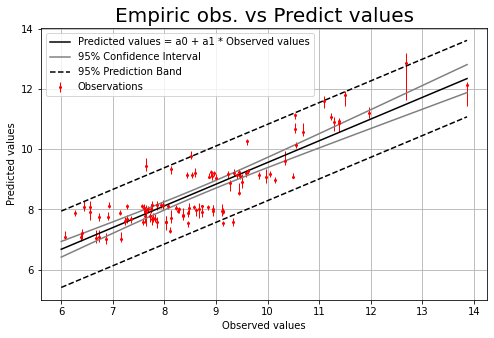

In [23]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(6, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [24]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [25]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: Sr_2021_kBq_m: mean - 0.989, median - 0.993, CI - [0.94-1.047]



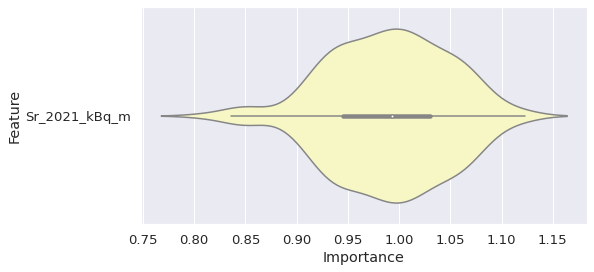

In [27]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['Sr_2021_kBq_m'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [28]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [29]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 59.16, median: 57.5,
 pred. interval (P(0.025)-P(0.975)): 30.0-89.0, 
 conf. interval (p-value=0.95): 42.599-79.625 
***
Aggregate bias statistic: 
 mean: -0.066, median: -0.064,
 pred. interval (P(0.025)-P(0.975)): -0.392-0.231, 
 conf. interval (p-value=0.95): -0.203-0.061 
***
Aggregate RMSE statistic: 
 mean: 0.759, median: 0.762, pred. interval (P(0.025)-P(0.975)): 0.556-1.001, 
 conf. interval (p-value=0.95): 0.666-0.84 
***
Aggregate MSE statistic: 
 mean: 0.586, median: 0.581, pred. interval (P(0.025)-P(0.975)): 0.31-1.002, 
 conf. interval (p-value=0.95): 0.445-0.707 
***
Aggregate R^2 statistic: 
 mean: 0.682, median: 0.712, pred. interval (P(0.025)-P(0.975)): 0.356-0.85, 
 conf. interval (p-value=0.95): 0.582-0.796 
***
Aggregate bias(%) statistic: 
 mean: -0.743, median: -0.719, pred. interval (P(0.025)-P(0.975)): -4.398-2.739, 
 conf. interval (p-value=0.95): -2.309-0.7

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

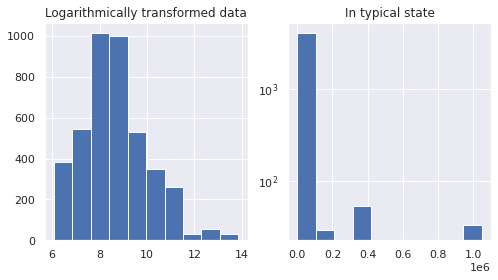

In [30]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [31]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [6, 7, 8, 9, 10, 11,14])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 500, 1000, 5000, 10000, 20000, 50000, 1000000])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

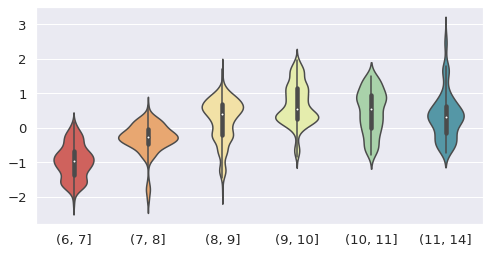

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

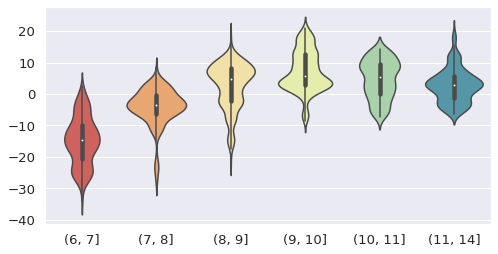

In [33]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

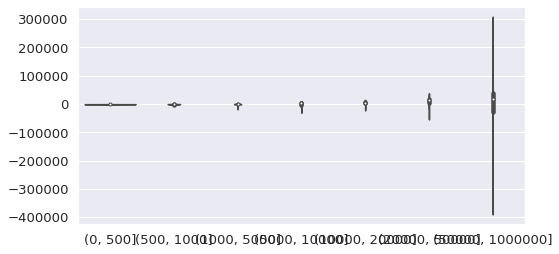

In [34]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

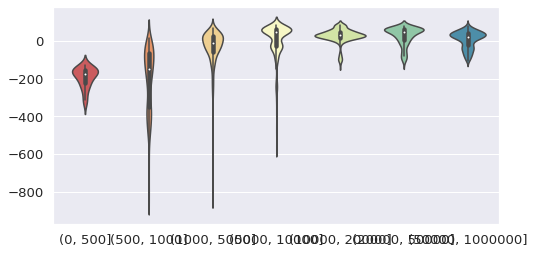

In [35]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [36]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [37]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [38]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:7.37483
[1]	validation_0-rmse:6.57132
[2]	validation_0-rmse:5.86739
[3]	validation_0-rmse:5.23793
[4]	validation_0-rmse:4.67479
[5]	validation_0-rmse:4.17402
[6]	validation_0-rmse:3.74099
[7]	validation_0-rmse:3.35082
[8]	validation_0-rmse:3.00130


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:2.70123
[10]	validation_0-rmse:2.43863
[11]	validation_0-rmse:2.20060
[12]	validation_0-rmse:1.99291
[13]	validation_0-rmse:1.81623
[14]	validation_0-rmse:1.66054
[15]	validation_0-rmse:1.51952
[16]	validation_0-rmse:1.39539
[17]	validation_0-rmse:1.29652
[18]	validation_0-rmse:1.20692
[19]	validation_0-rmse:1.12909
[20]	validation_0-rmse:1.06101
[21]	validation_0-rmse:1.00294
[22]	validation_0-rmse:0.94895
[23]	validation_0-rmse:0.90697
[24]	validation_0-rmse:0.87573
[25]	validation_0-rmse:0.84766
[26]	validation_0-rmse:0.82221
[27]	validation_0-rmse:0.80092
[28]	validation_0-rmse:0.78214
[29]	validation_0-rmse:0.76686
[30]	validation_0-rmse:0.75276
[31]	validation_0-rmse:0.73770
[32]	validation_0-rmse:0.72793
[33]	validation_0-rmse:0.71844
[34]	validation_0-rmse:0.70903
[35]	validation_0-rmse:0.70368
[36]	validation_0-rmse:0.69549
[37]	validation_0-rmse:0.68997
[38]	validation_0-rmse:0.68080
[39]	validation_0-rmse:0.67768
[40]	validation_0-rmse:0.66903
[41]	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [39]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 89


In [40]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

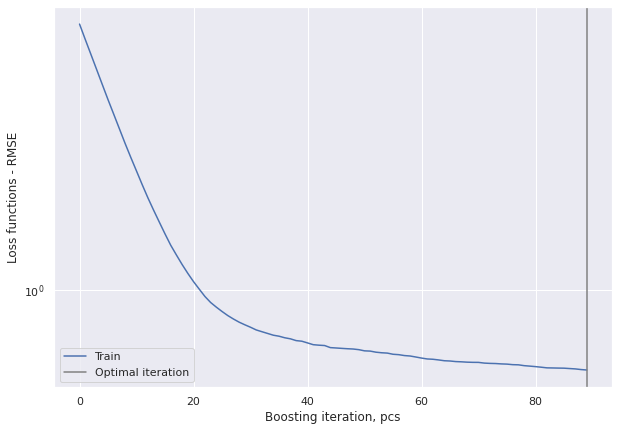

In [41]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [42]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.02
RMSE: 0.5
Relative RMSE(%):  6.303
MSE: 0.3
R square: 86.1%


In [43]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.864
Uncertainty
a0: 1.57+/-0.28
a1: 0.819+/-0.032


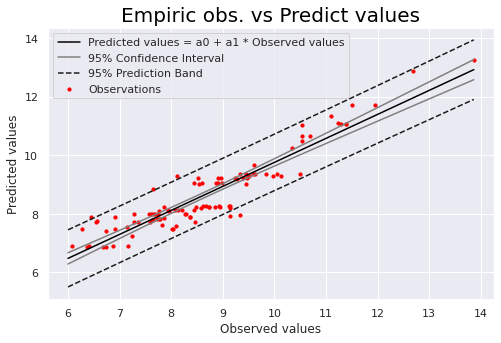

In [45]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(6, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

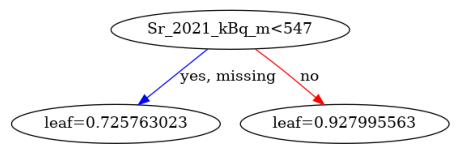

In [46]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

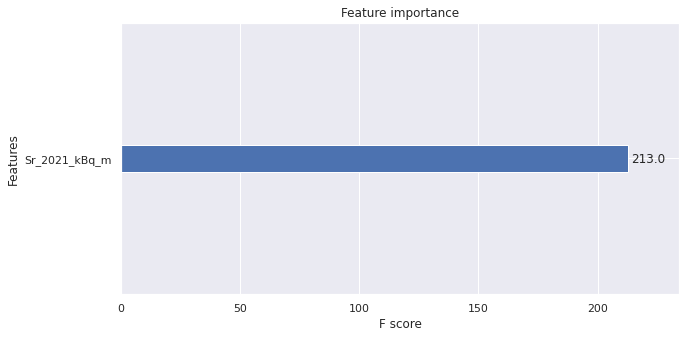

In [48]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

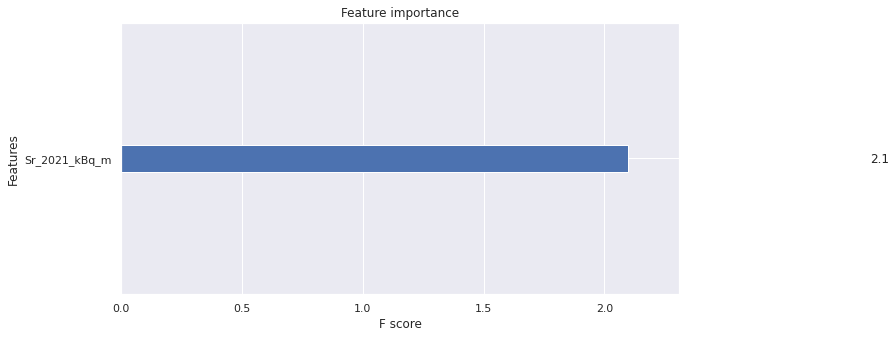

In [49]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

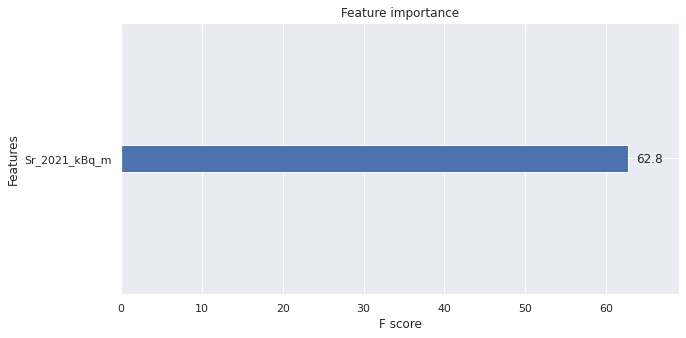

In [50]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [51]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


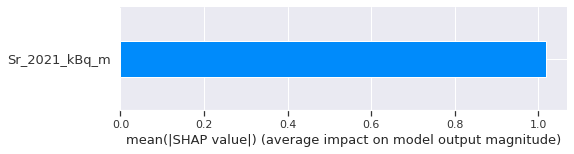

In [52]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

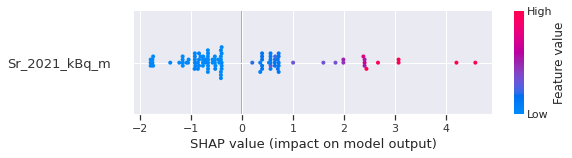

In [53]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

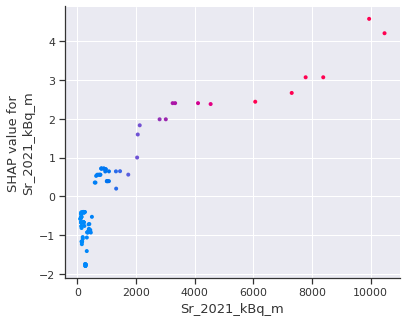

In [54]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [55]:
# Save to JSON
f_xgb_model.save_model("../03_output_data/XGBoost_models/08_LN_Sr_vs_Density_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../03_output_data/XGBoost_models/08_LN_Sr_vs_Density_XGB_model.txt")